In [403]:
import pandas as pd
import numpy as np
from ast import literal_eval
from pandas import json_normalize
from pprint import pprint
import ast
from sklearn.preprocessing import LabelEncoder
import re

# Kolkata Cars

In [6]:
df_1 = pd.read_csv('data1/kolkata_cars.csv')

In [7]:
df_1

new_car_detail  \
0     {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...   
1     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
2     {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
3     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
4     {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...   
...                                                 ...   
1376  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
1377  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
1378  {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...   
1379  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
1380  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...   

                                       new_car_overview  \
0     {'heading': 'Car overview', 'top': [{'key': 'R...   
1     {'heading': 'Car overview', 'top': [{'key': 'R...   
2     {'heading': 'Car overview', 'top': [{'key': 'R...   
3     {'heading': 'Car overview', 'top': [{'key': 'R...   
4     {'heading': 'Car overview', 'top': [{'key': 'R...   
...                                                 ...   
1376  {'heading': 'Car overview', 'top': [{'key': 'R...   
1377  {'heading': 'Car overview', 'top': [{'key': 'R...   
1378  {'heading': 'Car overview', 'top': [{'key': 'R...   
1379  {'heading': 'Car overview', 'top': [{'key': 'R...   
1380  {'heading': 'Car overview', 'top': [{'key': 'R...   

                                        new_car_feature  \
0     {'heading': 'Features', 'top': [{'value': 'Pow...   
1     {'heading': 'Features', 'top': [{'value': 'Pow...   
2     {'heading': 'Features', 'top': [{'value': 'Pow...   
3     {'heading': 'Features', 'top': [{'value': 'Pow...   
4     {'heading': 'Features', 'top': [{'value': 'Pow...   
...                                                 ...   
1376  {'heading': 'Features', 'top': [{'value': 'Pow...   
1377  {'heading': 'Features', 'top': [{'value': 'Pow...   
1378  {'heading': 'Features', 'top': [{'value': 'Pow...   
1379  {'heading': 'Features', 'top': [{'value': 'Pow...   
1380  {'heading': 'Features', 'top': [{'value': 'Pow...   

                                          new_car_specs  \
0     {'heading': 'Specifications', 'top': [{'key': ...   
1     {'heading': 'Specifications', 'top': [{'key': ...   
2     {'heading': 'Specifications', 'top': [{'key': ...   
3     {'heading': 'Specifications', 'top': [{'key': ...   
4     {'heading': 'Specifications', 'top': [{'key': ...   
...                                                 ...   
1376  {'heading': 'Specifications', 'top': [{'key': ...   
1377  {'heading': 'Specifications', 'top': [{'key': ...   
1378  {'heading': 'Specifications', 'top': [{'key': ...   
1379  {'heading': 'Specifications', 'top': [{'key': ...   
1380  {'heading': 'Specifications', 'top': [{'key': ...   

                                              car_links  
0     https://www.cardekho.com/used-car-details/used...  
1     https://www.cardekho.com/buy-used-car-details/...  
2     https://www.cardekho.com/used-car-details/used...  
3     https://www.cardekho.com/buy-used-car-details/...  
4     https://www.cardekho.com/used-car-details/used...  
...                                                 ...  
1376  https://www.cardekho.com/used-car-details/used...  
1377  https://www.cardekho.com/used-car-details/used...  
1378  https://www.cardekho.com/used-car-details/used...  
1379  https://www.cardekho.com/used-car-details/used...  
1380  https://www.cardekho.com/used-car-details/used...  

[1381 rows x 5 columns]

In [19]:
df_1['new_car_detail'].iloc[0]

"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km': '70,000', 'transmission': 'Automatic', 'ownerNo': 3, 'owner': '3rd Owner', 'oem': 'Toyota', 'model': 'Toyota Camry', 'modelYear': 2014, 'centralVariantId': 2123, 'variantName': 'Hybrid', 'price': '₹ 9.75 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}"

In [30]:
df_11 = pd.DataFrame(df_1['new_car_detail'])

In [31]:
df_11

new_car_detail
0     {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...
1     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
2     {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
3     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
4     {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
...                                                 ...
1376  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1377  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1378  {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...
1379  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1380  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...

[1381 rows x 1 columns]

In [42]:
df_11.iloc[0]

new_car_detail    {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...
Name: 0, dtype: object

In [40]:
df_11.iloc[0][0]

{'it': 0,
 'ft': 'Petrol',
 'bt': 'Sedan',
 'km': '70,000',
 'transmission': 'Automatic',
 'ownerNo': 3,
 'owner': '3rd Owner',
 'oem': 'Toyota',
 'model': 'Toyota Camry',
 'modelYear': 2014,
 'centralVariantId': 2123,
 'variantName': 'Hybrid',
 'price': '₹ 9.75 Lakh',
 'priceActual': '',
 'priceSaving': '',
 'priceFixedText': None,
 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg',
  'heading': 'Trending Car!',
  'desc': 'High chances of sale in next 6 days'}}

In [41]:
df_11.iloc[0][0]['it']

0

In [46]:
df_11['new_car_detail'][0]['it']

0

In [44]:
df_11['new_car_detail'][0]

{'it': 0,
 'ft': 'Petrol',
 'bt': 'Sedan',
 'km': '70,000',
 'transmission': 'Automatic',
 'ownerNo': 3,
 'owner': '3rd Owner',
 'oem': 'Toyota',
 'model': 'Toyota Camry',
 'modelYear': 2014,
 'centralVariantId': 2123,
 'variantName': 'Hybrid',
 'price': '₹ 9.75 Lakh',
 'priceActual': '',
 'priceSaving': '',
 'priceFixedText': None,
 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg',
  'heading': 'Trending Car!',
  'desc': 'High chances of sale in next 6 days'}}

In [51]:
for i in df_11['new_car_detail']:
    data = dict(Ignition_Type = i['it'],
                Fuel_Type = i['ft'],
               Body_type = i['bt'],
               Kilomerters_driven = i['km'],
               Transmission_Type = i['transmission'],
               No_Of_Owners = i['ownerNo'],
               Ownership_detail = i['owner'],
               OEM = i['oem'],
               Model = i['model'],
               Manufacture_Year = i['modelYear'],
               Central_Variant_Id = i['centralVariantId'],
               Variant_Name = i['variantName'],
               Price = i['price'],
               Actual_Price = i['priceActual'],
               Saving_Price = i['priceSaving'],
               Fixed_Price = i['priceFixedText'],
               Trending_Car = i['trendingText'])
    pprint(data)

{'Actual_Price': '',
 'Body_type': 'Sedan',
 'Central_Variant_Id': 2123,
 'Fixed_Price': None,
 'Fuel_Type': 'Petrol',
 'Ignition_Type': 0,
 'Kilomerters_driven': '70,000',
 'Manufacture_Year': 2014,
 'Model': 'Toyota Camry',
 'No_Of_Owners': 3,
 'OEM': 'Toyota',
 'Ownership_detail': '3rd Owner',
 'Price': '₹ 9.75 Lakh',
 'Saving_Price': '',
 'Transmission_Type': 'Automatic',
 'Trending_Car': {'desc': 'High chances of sale in next 6 days',
                  'heading': 'Trending Car!',
                  'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg'},
 'Variant_Name': 'Hybrid'}
{'Actual_Price': '',
 'Body_type': 'Hatchback',
 'Central_Variant_Id': 5236,
 'Fixed_Price': None,
 'Fuel_Type': 'Petrol',
 'Ignition_Type': 0,
 'Kilomerters_driven': '23,981',
 'Manufacture_Year': 2017,
 'Model': 'Datsun RediGO',
 'No_Of_Owners': 1,
 'OEM': 'Datsun',
 'Ownership_detail': '1st Owner',
 'Price': '₹ 2.66 Lakh',
 'Saving_Price': '',
 'Transmission_Type': 'Manual',
 'Trend

In [65]:
data_list = []
for i in df_11['new_car_detail']:
    data = dict(Ignition_Type = i['it'],
                Fuel_Type = i['ft'],
               Body_type = i['bt'],
               Kilomerters_driven = i['km'],
               Transmission_Type = i['transmission'],
               No_Of_Owners = i['ownerNo'],
               Ownership_detail = i['owner'],
               OEM = i['oem'],
               Model = i['model'],
               Manufacture_Year = i['modelYear'],
               Central_Variant_Id = i['centralVariantId'],
               Variant_Name = i['variantName'],
               Price = i['price'],
               Actual_Price = i['priceActual'],
               Saving_Price = i['priceSaving'],
               Fixed_Price = i['priceFixedText'],
               Trending_Car = i['trendingText'])
    data_list.append(data)

In [66]:
dd_1 = pd.DataFrame(data_list)

In [67]:
dd_1

Ignition_Type Fuel_Type  Body_type Kilomerters_driven Transmission_Type  \
0                 0    Petrol      Sedan             70,000         Automatic   
1                 0    Petrol  Hatchback             23,981            Manual   
2                 0    Petrol        SUV              7,100         Automatic   
3                 0    Petrol  Hatchback             71,574            Manual   
4                 0    Diesel        SUV             50,000         Automatic   
...             ...       ...        ...                ...               ...   
1376              0    Petrol  Hatchback             10,000            Manual   
1377              0    Petrol  Hatchback           1,20,000            Manual   
1378              0    Petrol      Sedan             50,000         Automatic   
1379              0    Petrol  Hatchback             40,000            Manual   
1380              0    Diesel        SUV           1,20,000            Manual   

      No_Of_Owners Ownership_detail            OEM                  Model  \
0                3        3rd Owner         Toyota           Toyota Camry   
1                1        1st Owner         Datsun          Datsun RediGO   
2                1        1st Owner        Renault          Renault Kiger   
3                2        2nd Owner        Hyundai            Hyundai i20   
4                2        2nd Owner           Audi                Audi Q3   
...            ...              ...            ...                    ...   
1376             1        1st Owner         Maruti         Maruti Celerio   
1377             1        1st Owner         Maruti        Maruti Alto 800   
1378             3        3rd Owner  Mercedes-Benz  Mercedes-Benz C-Class   
1379             1        1st Owner         Maruti            Maruti Ritz   
1380             2        2nd Owner        Renault         Renault Duster   

      Manufacture_Year  Central_Variant_Id            Variant_Name  \
0                 2014                2123                  Hybrid   
1                 2017                5236                T Option   
2                 2021                8352                 RXT AMT   
3                 2011                1642              1.2 Sportz   
4                 2014                  99  35 TDI Quattro Premium   
...                ...                 ...                     ...   
1376              2022                8682                ZXI BSVI   
1377              2014                3943                     LXI   
1378              2011                4672      C 200 CGI Elegance   
1379              2012                4144                     ZXi   
1380              2017                5048    110PS Diesel RxZ AWD   

            Price Actual_Price Saving_Price Fixed_Price  \
0     ₹ 9.75 Lakh                                  None   
1     ₹ 2.66 Lakh                                  None   
2     ₹ 5.95 Lakh                                  None   
3     ₹ 2.23 Lakh                                  None   
4       ₹ 12 Lakh                                  None   
...           ...          ...          ...         ...   
1376  ₹ 5.10 Lakh                                  None   
1377  ₹ 1.80 Lakh                                  None   
1378  ₹ 5.50 Lakh                                  None   
1379  ₹ 1.40 Lakh                                  None   
1380     ₹ 5 Lakh                                  None   

                                           Trending_Car  
0     {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1     {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
2     {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
3     {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
4     {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
...                                                 ...  
1376  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1377  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1378  {'imgUrl': 'https://stimg.card

In [68]:
dd_1['Actual_Price'].unique()

array(['', '₹ 6 Lakh', '₹ 6.56 Lakh', '₹ 3.21 Lakh', '₹ 5.62 Lakh',
       '₹ 6.25 Lakh', '₹ 5.48 Lakh', '₹ 7.33 Lakh', '₹ 7.62 Lakh',
       '₹ 3.78 Lakh', '₹ 3.97 Lakh', '₹ 4.20 Lakh', '₹ 3.83 Lakh',
       '₹ 4.85 Lakh', '₹ 4.30 Lakh', '₹ 5.59 Lakh', '₹ 6.62 Lakh',
       '₹ 3.40 Lakh', '₹ 3.66 Lakh', '₹ 4.89 Lakh', '₹ 3.34 Lakh',
       '₹ 2.81 Lakh', '₹ 3.52 Lakh', '₹ 4.15 Lakh', '₹ 4.84 Lakh',
       '₹ 4.16 Lakh', '₹ 23.01 Lakh', '₹ 3.39 Lakh', '₹ 5.33 Lakh',
       '₹ 4.31 Lakh', '₹ 3.55 Lakh', '₹ 3.81 Lakh', '₹ 3.02 Lakh',
       '₹ 2.67 Lakh', '₹ 19.68 Lakh', '₹ 6.26 Lakh', '₹ 7.89 Lakh',
       '₹ 8.42 Lakh', '₹ 5.06 Lakh', '₹ 3.64 Lakh', '₹ 5.53 Lakh',
       '₹ 1.44 Lakh', '₹ 7.18 Lakh', '₹ 2.69 Lakh', '₹ 8.55 Lakh',
       '₹ 2.68 Lakh', '₹ 7.85 Lakh', '₹ 4.80 Lakh', '₹ 3.72 Lakh',
       '₹ 4.69 Lakh', '₹ 7.65 Lakh', '₹ 12.38 Lakh', '₹ 11.01 Lakh',
       '₹ 6.38 Lakh', '₹ 3.79 Lakh', '₹ 2.83 Lakh', '₹ 7.93 Lakh',
       '₹ 2.84 Lakh', '₹ 10.57 Lakh', '₹ 4.97 Lakh', '₹ 5

In [70]:
df_1['new_car_overview'].iloc[0]

"{'heading': 'Car overview', 'top': [{'key': 'Registration Year', 'value': '2014', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/registrationYear.svg'}, {'key': 'Insurance Validity', 'value': 'Third Party insurance', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/insuranceValidity.svg'}, {'key': 'Fuel Type', 'value': 'Petrol', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/fuel.svg'}, {'key': 'Seats', 'value': '5 Seats', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/seats.svg'}, {'key': 'Kms Driven', 'value': '70,000 Kms', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/kmsDriven.svg'}, {'key': 'RTO', 'value': 'WB02', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/rto.svg'}, {'key': 'Ownership', 'value': 'Third Owner', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/ownership.svg'}, {'key': 'Engine Displacement', 'value': '2494 cc', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/engineDisplacement.svg'}, {'key': 'Transmission', 'v

In [71]:
df_12 =pd.DataFrame(df_1['new_car_overview'])

In [72]:
df_12

new_car_overview
0     {'heading': 'Car overview', 'top': [{'key': 'R...
1     {'heading': 'Car overview', 'top': [{'key': 'R...
2     {'heading': 'Car overview', 'top': [{'key': 'R...
3     {'heading': 'Car overview', 'top': [{'key': 'R...
4     {'heading': 'Car overview', 'top': [{'key': 'R...
...                                                 ...
1376  {'heading': 'Car overview', 'top': [{'key': 'R...
1377  {'heading': 'Car overview', 'top': [{'key': 'R...
1378  {'heading': 'Car overview', 'top': [{'key': 'R...
1379  {'heading': 'Car overview', 'top': [{'key': 'R...
1380  {'heading': 'Car overview', 'top': [{'key': 'R...

[1381 rows x 1 columns]

In [77]:
df_12['new_car_overview'][0]

"{'heading': 'Car overview', 'top': [{'key': 'Registration Year', 'value': '2014', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/registrationYear.svg'}, {'key': 'Insurance Validity', 'value': 'Third Party insurance', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/insuranceValidity.svg'}, {'key': 'Fuel Type', 'value': 'Petrol', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/fuel.svg'}, {'key': 'Seats', 'value': '5 Seats', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/seats.svg'}, {'key': 'Kms Driven', 'value': '70,000 Kms', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/kmsDriven.svg'}, {'key': 'RTO', 'value': 'WB02', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/rto.svg'}, {'key': 'Ownership', 'value': 'Third Owner', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/ownership.svg'}, {'key': 'Engine Displacement', 'value': '2494 cc', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/engineDisplacement.svg'}, {'key': 'Transmission', 'v

In [92]:

for i in df_12['new_car_overview']:
    overview_dict = literal_eval(i)
    
    data12 = {'Car_heading': overview_dict.get('heading', '')}

    # Iterate over the 'top' list
    for item in overview_dict.get('top', []):
        key = item.get('key', '')
        value = item.get('value', '')
        data12[key] = value

    pprint(data12)

{'Car_heading': 'Car overview',
 'Engine Displacement': '2494 cc',
 'Fuel Type': 'Petrol',
 'Insurance Validity': 'Third Party insurance',
 'Kms Driven': '70,000 Kms',
 'Ownership': 'Third Owner',
 'RTO': 'WB02',
 'Registration Year': '2014',
 'Seats': '5 Seats',
 'Transmission': 'Automatic',
 'Year of Manufacture': 2014}
{'Car_heading': 'Car overview',
 'Engine Displacement': '799 cc',
 'Fuel Type': 'Petrol',
 'Insurance Validity': 'Comprehensive',
 'Kms Driven': '23,981 Kms',
 'Ownership': 'First Owner',
 'RTO': 'WB24',
 'Registration Year': 'Jul 2017',
 'Seats': '5 Seats',
 'Transmission': 'Manual',
 'Year of Manufacture': 2017}
{'Car_heading': 'Car overview',
 'Engine Displacement': '999 cc',
 'Fuel Type': 'Petrol',
 'Insurance Validity': 'Comprehensive',
 'Kms Driven': '7,100 Kms',
 'Ownership': 'First Owner',
 'RTO': 'WB06',
 'Registration Year': 'Nov 2021',
 'Seats': '5 Seats',
 'Transmission': 'Automatic',
 'Year of Manufacture': 2021}
{'Car_heading': 'Car overview',
 'Engine D

In [93]:
data_list_12 = []
for i in df_12['new_car_overview']:
    overview_dict = literal_eval(i)
    
    data12 = {'Car_heading': overview_dict.get('heading', '')}

    # Iterate over the 'top' list
    for item in overview_dict.get('top', []):
        key = item.get('key', '')
        value = item.get('value', '')
        data12[key] = value

    data_list_12.append(data12)

In [94]:
dd_2 = pd.DataFrame(data_list_12)

In [95]:
dd_2

Car_heading Registration Year     Insurance Validity Fuel Type  \
0     Car overview              2014  Third Party insurance    Petrol   
1     Car overview          Jul 2017          Comprehensive    Petrol   
2     Car overview          Nov 2021          Comprehensive    Petrol   
3     Car overview          Feb 2012            Third Party    Petrol   
4     Car overview              2014  Third Party insurance    Diesel   
...            ...               ...                    ...       ...   
1376  Car overview              2022  Third Party insurance    Petrol   
1377  Car overview              2014  Third Party insurance    Petrol   
1378  Car overview              2011  Third Party insurance    Petrol   
1379  Car overview              2012  Third Party insurance    Petrol   
1380  Car overview              2017  Third Party insurance    Diesel   

        Seats    Kms Driven   RTO     Ownership Engine Displacement  \
0     5 Seats    70,000 Kms  WB02   Third Owner             2494 cc   
1     5 Seats    23,981 Kms  WB24   First Owner              799 cc   
2     5 Seats     7,100 Kms  WB06   First Owner              999 cc   
3     5 Seats    71,574 Kms  WB06  Second Owner             1197 cc   
4     5 Seats    50,000 Kms  WB02  Second Owner             1968 cc   
...       ...           ...   ...           ...                 ...   
1376  5 Seats    10,000 Kms   NaN   First Owner              998 cc   
1377  5 Seats  1,20,000 Kms   NaN   First Owner              796 cc   
1378  5 Seats    50,000 Kms  WB06   Third Owner             1796 cc   
1379  5 Seats    40,000 Kms   NaN   First Owner             1197 cc   
1380  5 Seats  1,20,000 Kms   NaN  Second Owner             1461 cc   

     Transmission  Year of Manufacture  
0       Automatic               2014.0  
1          Manual               2017.0  
2       Automatic               2021.0  
3          Manual               2011.0  
4       Automatic               2014.0  
...           ...                  ...  
1376       Manual               2022.0  
1377       Manual               2014.0  
1378    Automatic               2011.0  
1379       Manual               2012.0  
1380       Manual               2017.0  

[1381 rows x 11 columns]

In [96]:
df_13 = pd.DataFrame(df_1['new_car_feature'])

In [97]:
df_13

new_car_feature
0     {'heading': 'Features', 'top': [{'value': 'Pow...
1     {'heading': 'Features', 'top': [{'value': 'Pow...
2     {'heading': 'Features', 'top': [{'value': 'Pow...
3     {'heading': 'Features', 'top': [{'value': 'Pow...
4     {'heading': 'Features', 'top': [{'value': 'Pow...
...                                                 ...
1376  {'heading': 'Features', 'top': [{'value': 'Pow...
1377  {'heading': 'Features', 'top': [{'value': 'Pow...
1378  {'heading': 'Features', 'top': [{'value': 'Pow...
1379  {'heading': 'Features', 'top': [{'value': 'Pow...
1380  {'heading': 'Features', 'top': [{'value': 'Pow...

[1381 rows x 1 columns]

In [103]:
df_13['new_car_feature'][0]

"{'heading': 'Features', 'top': [{'value': 'Power Steering'}, {'value': 'Power Windows Front'}, {'value': 'Air Conditioner'}, {'value': 'Heater'}, {'value': 'Adjustable Head Lights'}, {'value': 'Fog Lights Front'}, {'value': 'Anti Lock Braking System'}, {'value': 'Brake Assist'}, {'value': 'Cd Player'}], 'data': [{'heading': 'Comfort & Convenience', 'subHeading': 'Comfort', 'list': [{'value': 'Power Steering'}, {'value': 'Power Windows Front'}, {'value': 'Power Windows Rear'}, {'value': 'Air Quality Control'}, {'value': 'Remote Trunk Opener'}, {'value': 'Low Fuel Warning Light'}, {'value': 'Accessory Power Outlet'}, {'value': 'Trunk Light'}, {'value': 'Vanity Mirror'}, {'value': 'Rear Seat Headrest'}, {'value': 'Rear Seat Centre Arm Rest'}, {'value': 'Cup Holders Front'}, {'value': 'Cup Holders Rear'}, {'value': 'Seat Lumbar Support'}, {'value': 'Multifunction Steering Wheel'}, {'value': 'Rear ACVents'}]}, {'heading': 'Interior', 'subHeading': 'Interior', 'list': [{'value': 'Air Condit

In [140]:
# Function to extract values from the 'new_car_feature' column
def extract_features(row):
    result_dict = {
        'Features': None,
        'Comfort': None,
        'Interior': None,
        'Exterior': None,
        'Safety': None,
        'Entertainment': None,
    }
    
    try:
        # Convert the string to a dictionary
        data = json.loads(row.replace("'", "\""))
        
        # Extract values under 'value' key for each section
        if 'top' in data:
            features_values = [item['value'] for item in data['top']]
            result_dict['Features'] = ', '.join(features_values)
            
        if 'data' in data and len(data['data']) >= 5:
            comfort_values = [item['value'] for item in data['data'][0]['list']]
            interior_values = [item['value'] for item in data['data'][1]['list']]
            exterior_values = [item['value'] for item in data['data'][2]['list']]
            safety_values = [item['value'] for item in data['data'][3]['list']]
            entertainment_values = [item['value'] for item in data['data'][4]['list']]
            
            result_dict['Comfort'] = ', '.join(comfort_values)
            result_dict['Interior'] = ', '.join(interior_values)
            result_dict['Exterior'] = ', '.join(exterior_values)
            result_dict['Safety'] = ', '.join(safety_values)
            result_dict['Entertainment'] = ', '.join(entertainment_values)
            
    except Exception as e:
        # Handle potential errors during extraction
        pass

    return pd.Series(result_dict)

# Apply the extraction function to the 'new_car_feature' column for all rows
dd_3 = df_13['new_car_feature'].apply(extract_features)



In [141]:
dd_3

Features  \
0     Power Steering, Power Windows Front, Air Condi...   
1     Power Steering, Power Windows Front, Air Condi...   
2     Power Steering, Power Windows Front, Air Condi...   
3     Power Steering, Power Windows Front, Air Condi...   
4     Power Steering, Power Windows Front, Air Condi...   
...                                                 ...   
1376  Power Steering, Power Windows Front, Air Condi...   
1377  Power Steering, Power Windows Front, Air Condi...   
1378  Power Steering, Power Windows Front, Air Condi...   
1379  Power Steering, Power Windows Front, Air Condi...   
1380  Power Steering, Power Windows Front, Air Condi...   

                                                Comfort  \
0     Power Steering, Power Windows Front, Power Win...   
1     Power Steering, Power Windows Front, Remote Tr...   
2     Power Steering, Power Windows Front, Power Win...   
3     Power Steering, Power Windows Front, Power Win...   
4     Power Steering, Power Windows Front, Power Win...   
...                                                 ...   
1376  Power Steering, Power Windows Front, Power Win...   
1377                                               None   
1378  Power Steering, Power Windows Front, Power Win...   
1379  Power Steering, Power Windows Front, Power Win...   
1380  Power Steering, Power Windows Front, Power Win...   

                                               Interior  \
0     Air Conditioner, Heater, Adjustable Steering, ...   
1     Air Conditioner, Heater, Tachometer, Electroni...   
2     Air Conditioner, Heater, Adjustable Steering, ...   
3     Air Conditioner, Heater, Adjustable Steering, ...   
4     Air Conditioner, Heater, Adjustable Steering, ...   
...                                                 ...   
1376  Air Conditioner, Heater, Adjustable Steering, ...   
1377                                               None   
1378  Air Conditioner, Heater, Adjustable Steering, ...   
1379  Air Conditioner, Heater, Adjustable Steering, ...   
1380  Air Conditioner, Heater, Adjustable Steering, ...   

                                               Exterior  \
0     Adjustable Head Lights, Fog Lights Front, Fog ...   
1     Adjustable Head Lights, Manually Adjustable Ex...   
2     Adjustable Head Lights, Power Adjustable Exter...   
3     Fog Lights Rear, Power Adjustable Exterior Rea...   
4     Adjustable Head Lights, Fog Lights Front, Fog ...   
...                                                 ...   
1376  Adjustable Head Lights, Power Adjustable Exter...   
1377                                               None   
1378  Adjustable Head Lights, Fog Lights Front, Fog ...   
1379  Adjustable Head Lights, Fog Lights Front, Fog ...   
1380  Adjustable Head Lights, Fog Lights Front, Powe...   

                                                 Safety  \
0     Anti Lock Braking System, Brake Assist, Center...   
1     Anti Lock Braking System, Centeral Locking, Ch...   
2     Anti Lock Braking System, Centeral Locking, Po...   
3     Centeral Locking, Power Door Locks, Child Safe...   
4     Anti Lock Braking System, Brake Assist, Center...   
...                                                 ...   
1376  Anti Lock Braking System, Centeral Locking, Po...   
1377                                               None   
1378  Anti Lock Braking System, Brake Assist, Center...   
1379  Anti Lock Braking System, Centeral Locking, Po...   
1380  Anti Lock Braking System, Brake Assist, Center...   

                                          Entertainment  
0     Cd Player, Dvd Player, Radio, Speakers Front, ...  
1     Radio, Speakers Front, Usb Auxiliary Input, Bl...  
2     Radio, Speakers Front, Speakers Rear, Integrat...  
3       Cd Player, Radio, Speakers Front, Speakers Rear  
4     Cd Player, Radio, Audio System Remote Control,...  
...                                                 ...  
1376  Radio, Speakers Front, Speakers Rear, Integrat...  
1377                                  

In [108]:
df_14 = pd.DataFrame(df_1['new_car_specs'])

In [109]:
df_14

new_car_specs
0     {'heading': 'Specifications', 'top': [{'key': ...
1     {'heading': 'Specifications', 'top': [{'key': ...
2     {'heading': 'Specifications', 'top': [{'key': ...
3     {'heading': 'Specifications', 'top': [{'key': ...
4     {'heading': 'Specifications', 'top': [{'key': ...
...                                                 ...
1376  {'heading': 'Specifications', 'top': [{'key': ...
1377  {'heading': 'Specifications', 'top': [{'key': ...
1378  {'heading': 'Specifications', 'top': [{'key': ...
1379  {'heading': 'Specifications', 'top': [{'key': ...
1380  {'heading': 'Specifications', 'top': [{'key': ...

[1381 rows x 1 columns]

In [110]:
df_14['new_car_specs'][0]

"{'heading': 'Specifications', 'top': [{'key': 'Mileage', 'value': '19.16 kmpl'}, {'key': 'Engine', 'value': '2494 CC'}, {'key': 'Max Power', 'value': '158.2bhp'}, {'key': 'Torque', 'value': '213Nm'}, {'key': 'Wheel Size', 'value': '17'}, {'key': 'Seats', 'value': '5'}], 'data': [{'heading': 'Engine and Transmission', 'subHeading': 'Engine', 'list': [{'key': 'Color', 'value': 'White'}, {'key': 'Engine Type', 'value': '2AR FXE Petrol Engine '}, {'key': 'Displacement', 'value': '2494'}, {'key': 'Max Power', 'value': '158.2bhp@5700rpm'}, {'key': 'Max Torque', 'value': '213Nm@4500rpm'}, {'key': 'No of Cylinder', 'value': 4}, {'key': 'Values per Cylinder', 'value': 4}, {'key': 'Value Configuration', 'value': 'DOHC'}, {'key': 'Fuel Suppy System', 'value': 'Electronic Fuel Injection(EFI)'}, {'key': 'BoreX Stroke', 'value': '90 X 98 mm'}, {'key': 'Turbo Charger', 'value': 'No'}, {'key': 'Super Charger', 'value': 'No'}]}, {'heading': 'Dimensions & Capacity', 'subHeading': 'Dimensions', 'list': 

In [112]:
data_list_14 = []

for i in df_14['new_car_specs']:
    overview_dict = literal_eval(i)
    
    data14 = {'Car_heading': overview_dict.get('heading', '')}

    # Iterate over the 'top' list
    for item in overview_dict.get('top', []):
        key = item.get('key', '')
        value = item.get('value', '')
        data14[key] = value  # Assuming you want to mark the presence of each feature with True

    # Iterate over 'data' list
    for section in overview_dict.get('data', []):
        for item in section.get('list', []):
            key = item.get('key', '')
            value = item.get('value', '')
            data14[key] = value  # Assuming you want to mark the presence of each feature with True

    data_list_14.append(data14)

# Convert the list of dictionaries to a DataFrame
dd_4 = pd.DataFrame(data_list_14)

# Display the DataFrame
dd_4

Car_heading     Mileage   Engine          Max Power  \
0     Specifications  19.16 kmpl  2494 CC   158.2bhp@5700rpm   
1     Specifications   22.7 kmpl   799 CC   53.64bhp@5678rpm   
2     Specifications  19.03 kmpl   999 CC   71.01bhp@6250rpm   
3     Specifications     17 kmpl  1197 CC  80 PS at 5200 rpm   
4     Specifications  15.73 kmpl  1968 CC  174.33bhp@4200rpm   
...              ...         ...      ...                ...   
1376  Specifications  25.24 kmpl   998 CC   65.71bhp@5500rpm   
1377  Specifications  22.74 kmpl   796 CC    47.3bhp@6000rpm   
1378  Specifications  11.74 kmpl  1796 CC     186bhp@5600rpm   
1379  Specifications   18.5 kmpl  1197 CC   85.80bhp@6000rpm   
1380  Specifications  19.72 kmpl  1461 CC  108.45bhp@4000rpm   

                     Torque Wheel Size Seats   Color             Engine Type  \
0                     213Nm         17     5   White  2AR FXE Petrol Engine    
1                      72Nm        NaN     5     Red      0.8L Petrol Engine   
2                      96Nm        NaN     5    Blue             1.0L energy   
3     11.4 kgm at 4,000 rpm         14     5     Red          In-Line Engine   
4                     380Nm         16     5   White       TDI Diesel Engine   
...                     ...        ...   ...     ...                     ...   
1376                   89Nm        NaN     5  Others                    K10C   
1377                   69Nm        NaN     5  Others       F8D Petrol Engine   
1378                  285Nm         17     5  Others  Blue Efficiency Engine   
1379                  114Nm         14     5  Others  K Series Petrol Engine   
1380                  245Nm         16     5  Others   dCi THP Diesel Engine   

     Displacement  ... Front Brake Type  Rear Brake Type         Tyre Type  \
0            2494  ...  Ventilated Disc       Solid Disc   Tubeless,Radial   
1             799  ...             Disc             Drum               NaN   
2             999  ...             Disc             Drum  Tubeless, Radial   
3            1197  ...             Disc             Drum   Tubeless,Radial   
4            1968  ...  Ventilated Disc             Drum   Tubeless,Radial   
...           ...  ...              ...              ...               ...   
1376          998  ...  Ventilated Disc             Drum  Tubeless, Radial   
1377          796  ...       Solid Disc             Drum    Tubeless Tyres   
1378         1796  ...  Ventilated Disc       Solid Disc   Tubeless,Radial   
1379         1197  ...  Ventilated Disc             Drum   Tubeless,Radial   
1380         1461  ...             Disc             Drum   Tubeless,Radial   

     Alloy Wheel Size No Door Numbers Ground Clearance Unladen Cargo Volumn  \
0                  17               4                      NaN          NaN   
1                 NaN               5                    185mm          222   
2                 NaN               5                      NaN          405   
3                  14               5                      NaN      295 Lit   
4                  16               5                      NaN   460-litres   
...               ...             ...                      ...          ...   
1376              NaN               5                      NaN          313   
1377              NaN               5                      NaN   177-litres   
1378               17               4                      NaN   475-litres   
1379               14               5                      NaN   236-liters   
1380               16               5                      NaN   410-litres   

     Compression Ratio   Acceleration Top Speed  
0                  NaN            NaN       NaN  
1                  NaN            NaN       NaN  
2                  NaN            NaN       NaN  
3                   :1      12.96 Sec       NaN  
4                  NaN    8.2 Seconds  212 Kmph  
...                ...            ...       ...  
1376               NaN            NaN      

In [113]:
dd_4.columns

Index(['Car_heading', 'Mileage', 'Engine', 'Max Power', 'Torque', 'Wheel Size',
       'Seats', 'Color', 'Engine Type', 'Displacement', 'Max Torque',
       'No of Cylinder', 'Values per Cylinder', 'Value Configuration',
       'Fuel Suppy System', 'BoreX Stroke', 'Turbo Charger', 'Super Charger',
       'Length', 'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type',
       'Seating Capacity', 'Steering Type', 'Turning Radius',
       'Front Brake Type', 'Rear Brake Type', 'Tyre Type', 'Alloy Wheel Size',
       'No Door Numbers', 'Ground Clearance Unladen', 'Cargo Volumn',
       'Compression Ratio', 'Acceleration', 'Top Speed'],
      dtype='object')

# Jaipur Cars

In [8]:
df_2 = pd.read_csv('data1/jaipur_cars.csv')

In [9]:
df_2

new_car_detail  \
0     {'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...   
1     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
2     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
3     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
4     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
...                                                 ...   
1115  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
1116  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
1117  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
1118  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
1119  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   

                                       new_car_overview  \
0     {'heading': 'Car overview', 'top': [{'key': 'R...   
1     {'heading': 'Car overview', 'top': [{'key': 'R...   
2     {'heading': 'Car overview', 'top': [{'key': 'R...   
3     {'heading': 'Car overview', 'top': [{'key': 'R...   
4     {'heading': 'Car overview', 'top': [{'key': 'R...   
...                                                 ...   
1115  {'heading': 'Car overview', 'top': [{'key': 'R...   
1116  {'heading': 'Car overview', 'top': [{'key': 'R...   
1117  {'heading': 'Car overview', 'top': [{'key': 'R...   
1118  {'heading': 'Car overview', 'top': [{'key': 'R...   
1119  {'heading': 'Car overview', 'top': [{'key': 'R...   

                                        new_car_feature  \
0     {'heading': 'Features', 'top': [{'value': 'Pow...   
1     {'heading': 'Features', 'top': [{'value': 'Pow...   
2     {'heading': 'Features', 'top': [{'value': 'Pow...   
3     {'heading': 'Features', 'top': [{'value': 'Pow...   
4     {'heading': 'Features', 'top': [{'value': 'Pow...   
...                                                 ...   
1115  {'heading': 'Features', 'top': [{'value': 'Pow...   
1116  {'heading': 'Features', 'top': [{'value': 'Low...   
1117  {'heading': 'Features', 'top': [{'value': 'Pow...   
1118  {'heading': 'Features', 'top': [{'value': 'Low...   
1119  {'heading': 'Features', 'top': [{'value': 'Pow...   

                                          new_car_specs  \
0     {'heading': 'Specifications', 'top': [{'key': ...   
1     {'heading': 'Specifications', 'top': [{'key': ...   
2     {'heading': 'Specifications', 'top': [{'key': ...   
3     {'heading': 'Specifications', 'top': [{'key': ...   
4     {'heading': 'Specifications', 'top': [{'key': ...   
...                                                 ...   
1115  {'heading': 'Specifications', 'top': [{'key': ...   
1116  {'heading': 'Specifications', 'top': [{'key': ...   
1117  {'heading': 'Specifications', 'top': [{'key': ...   
1118  {'heading': 'Specifications', 'top': [{'key': ...   
1119  {'heading': 'Specifications', 'top': [{'key': ...   

                                              car_links  
0     https://www.cardekho.com/used-car-details/used...  
1     https://www.cardekho.com/buy-used-car-details/...  
2     https://www.cardekho.com/used-car-details/used...  
3     https://www.cardekho.com/buy-used-car-details/...  
4     https://www.cardekho.com/used-car-details/used...  
...                                                 ...  
1115  https://www.cardekho.com/used-car-details/used...  
1116  https://www.cardekho.com/used-car-details/used...  
1117  https://www.cardekho.com/used-car-details/used...  
1118  https://www.cardekho.com/used-car-details/used...  
1119  https://www.cardekho.com/used-car-details/used...  

[1120 rows x 5 columns]

In [149]:
df_2['new_car_detail'].iloc[0]

"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', 'km': '1,20,000', 'transmission': 'Manual', 'ownerNo': 2, 'owner': '2nd Owner', 'oem': 'Hyundai', 'model': 'Hyundai i20', 'modelYear': 2015, 'centralVariantId': 1487, 'variantName': 'Asta 1.4 CRDi', 'price': '₹ 5.10 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}"

In [144]:
df_21 = pd.DataFrame(df_2['new_car_detail'])

In [145]:
df_21

new_car_detail
0     {'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...
1     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
2     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
3     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
4     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
...                                                 ...
1115  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1116  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1117  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
1118  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1119  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...

[1120 rows x 1 columns]

In [150]:
df_21.iloc[0]

new_car_detail    {'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...
Name: 0, dtype: object

In [151]:
df_21.iloc[0][0]

"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', 'km': '1,20,000', 'transmission': 'Manual', 'ownerNo': 2, 'owner': '2nd Owner', 'oem': 'Hyundai', 'model': 'Hyundai i20', 'modelYear': 2015, 'centralVariantId': 1487, 'variantName': 'Asta 1.4 CRDi', 'price': '₹ 5.10 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}"

In [146]:
df_21['new_car_detail'][0]

"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', 'km': '1,20,000', 'transmission': 'Manual', 'ownerNo': 2, 'owner': '2nd Owner', 'oem': 'Hyundai', 'model': 'Hyundai i20', 'modelYear': 2015, 'centralVariantId': 1487, 'variantName': 'Asta 1.4 CRDi', 'price': '₹ 5.10 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}"

In [159]:
df_21['new_car_detail'] = df_21['new_car_detail'].apply(lambda x: ast.literal_eval(x.strip('"')))

In [160]:
df_21['new_car_detail'][0]

{'it': 0,
 'ft': 'Diesel',
 'bt': 'Hatchback',
 'km': '1,20,000',
 'transmission': 'Manual',
 'ownerNo': 2,
 'owner': '2nd Owner',
 'oem': 'Hyundai',
 'model': 'Hyundai i20',
 'modelYear': 2015,
 'centralVariantId': 1487,
 'variantName': 'Asta 1.4 CRDi',
 'price': '₹ 5.10 Lakh',
 'priceActual': '',
 'priceSaving': '',
 'priceFixedText': None,
 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg',
  'heading': 'Trending Car!',
  'desc': 'High chances of sale in next 6 days'}}

In [161]:
for i in df_21['new_car_detail']:
    data = dict(Ignition_Type = i['it'],
                Fuel_Type = i['ft'],
               Body_type = i['bt'],
               Kilomerters_driven = i['km'],
               Transmission_Type = i['transmission'],
               No_Of_Owners = i['ownerNo'],
               Ownership_detail = i['owner'],
               OEM = i['oem'],
               Model = i['model'],
               Manufacture_Year = i['modelYear'],
               Central_Variant_Id = i['centralVariantId'],
               Variant_Name = i['variantName'],
               Price = i['price'],
               Actual_Price = i['priceActual'],
               Saving_Price = i['priceSaving'],
               Fixed_Price = i['priceFixedText'],
               Trending_Car = i['trendingText'])
    pprint(data)

{'Actual_Price': '',
 'Body_type': 'Hatchback',
 'Central_Variant_Id': 1487,
 'Fixed_Price': None,
 'Fuel_Type': 'Diesel',
 'Ignition_Type': 0,
 'Kilomerters_driven': '1,20,000',
 'Manufacture_Year': 2015,
 'Model': 'Hyundai i20',
 'No_Of_Owners': 2,
 'OEM': 'Hyundai',
 'Ownership_detail': '2nd Owner',
 'Price': '₹ 5.10 Lakh',
 'Saving_Price': '',
 'Transmission_Type': 'Manual',
 'Trending_Car': {'desc': 'High chances of sale in next 6 days',
                  'heading': 'Trending Car!',
                  'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg'},
 'Variant_Name': 'Asta 1.4 CRDi'}
{'Actual_Price': '',
 'Body_type': 'Hatchback',
 'Central_Variant_Id': 10403,
 'Fixed_Price': None,
 'Fuel_Type': 'Petrol',
 'Ignition_Type': 0,
 'Kilomerters_driven': '66,951',
 'Manufacture_Year': 2012,
 'Model': 'Maruti Swift',
 'No_Of_Owners': 1,
 'OEM': 'Maruti',
 'Ownership_detail': '1st Owner',
 'Price': '₹ 3.81 Lakh',
 'Saving_Price': '',
 'Transmission_Type': 'Manual

In [162]:
data_list_2 = []
for i in df_21['new_car_detail']:
    data2 = dict(Ignition_Type = i['it'],
                Fuel_Type = i['ft'],
               Body_type = i['bt'],
               Kilomerters_driven = i['km'],
               Transmission_Type = i['transmission'],
               No_Of_Owners = i['ownerNo'],
               Ownership_detail = i['owner'],
               OEM = i['oem'],
               Model = i['model'],
               Manufacture_Year = i['modelYear'],
               Central_Variant_Id = i['centralVariantId'],
               Variant_Name = i['variantName'],
               Price = i['price'],
               Actual_Price = i['priceActual'],
               Saving_Price = i['priceSaving'],
               Fixed_Price = i['priceFixedText'],
               Trending_Car = i['trendingText'])
    data_list_2.append(data)

In [163]:
dd_11 = pd.DataFrame(data_list_2)

In [164]:
dd_11

Ignition_Type Fuel_Type  Body_type Kilomerters_driven Transmission_Type  \
0                 0    Petrol  Hatchback             80,000            Manual   
1                 0    Petrol  Hatchback             80,000            Manual   
2                 0    Petrol  Hatchback             80,000            Manual   
3                 0    Petrol  Hatchback             80,000            Manual   
4                 0    Petrol  Hatchback             80,000            Manual   
...             ...       ...        ...                ...               ...   
1115              0    Petrol  Hatchback             80,000            Manual   
1116              0    Petrol  Hatchback             80,000            Manual   
1117              0    Petrol  Hatchback             80,000            Manual   
1118              0    Petrol  Hatchback             80,000            Manual   
1119              0    Petrol  Hatchback             80,000            Manual   

      No_Of_Owners Ownership_detail     OEM          Model  Manufacture_Year  \
0                1        1st Owner  Maruti  Maruti Baleno              2018   
1                1        1st Owner  Maruti  Maruti Baleno              2018   
2                1        1st Owner  Maruti  Maruti Baleno              2018   
3                1        1st Owner  Maruti  Maruti Baleno              2018   
4                1        1st Owner  Maruti  Maruti Baleno              2018   
...            ...              ...     ...            ...               ...   
1115             1        1st Owner  Maruti  Maruti Baleno              2018   
1116             1        1st Owner  Maruti  Maruti Baleno              2018   
1117             1        1st Owner  Maruti  Maruti Baleno              2018   
1118             1        1st Owner  Maruti  Maruti Baleno              2018   
1119             1        1st Owner  Maruti  Maruti Baleno              2018   

      Central_Variant_Id Variant_Name     Price Actual_Price Saving_Price  \
0                   3962    1.2 Delta  ₹ 5 Lakh                             
1                   3962    1.2 Delta  ₹ 5 Lakh                             
2                   3962    1.2 Delta  ₹ 5 Lakh                             
3                   3962    1.2 Delta  ₹ 5 Lakh                             
4                   3962    1.2 Delta  ₹ 5 Lakh                             
...                  ...          ...       ...          ...          ...   
1115                3962    1.2 Delta  ₹ 5 Lakh                             
1116                3962    1.2 Delta  ₹ 5 Lakh                             
1117                3962    1.2 Delta  ₹ 5 Lakh                             
1118                3962    1.2 Delta  ₹ 5 Lakh                             
1119                3962    1.2 Delta  ₹ 5 Lakh                             

     Fixed_Price                                       Trending_Car  
0           None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1           None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
2           None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
3           None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
4           None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
...          ...                                                ...  
1115        None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1116        None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1117        None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1118        None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1119        None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  

[1120 rows x 17 columns]

In [165]:
df_2['new_car_overview'].iloc[0]

"{'heading': 'Car overview', 'top': [{'key': 'Registration Year', 'value': '2015', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/registrationYear.svg'}, {'key': 'Insurance Validity', 'value': 'Third Party insurance', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/insuranceValidity.svg'}, {'key': 'Fuel Type', 'value': 'Diesel', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/fuel.svg'}, {'key': 'Seats', 'value': '5 Seats', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/seats.svg'}, {'key': 'Kms Driven', 'value': '1,20,000 Kms', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/kmsDriven.svg'}, {'key': 'RTO', 'value': 'RJ13', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/rto.svg'}, {'key': 'Ownership', 'value': 'Second Owner', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/ownership.svg'}, {'key': 'Engine Displacement', 'value': '1396 cc', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/engineDisplacement.svg'}, {'key': 'Transmission',

In [166]:
df_22 =pd.DataFrame(df_2['new_car_overview'])

In [167]:
df_22

new_car_overview
0     {'heading': 'Car overview', 'top': [{'key': 'R...
1     {'heading': 'Car overview', 'top': [{'key': 'R...
2     {'heading': 'Car overview', 'top': [{'key': 'R...
3     {'heading': 'Car overview', 'top': [{'key': 'R...
4     {'heading': 'Car overview', 'top': [{'key': 'R...
...                                                 ...
1115  {'heading': 'Car overview', 'top': [{'key': 'R...
1116  {'heading': 'Car overview', 'top': [{'key': 'R...
1117  {'heading': 'Car overview', 'top': [{'key': 'R...
1118  {'heading': 'Car overview', 'top': [{'key': 'R...
1119  {'heading': 'Car overview', 'top': [{'key': 'R...

[1120 rows x 1 columns]

In [169]:
df_22['new_car_overview'][0]

"{'heading': 'Car overview', 'top': [{'key': 'Registration Year', 'value': '2015', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/registrationYear.svg'}, {'key': 'Insurance Validity', 'value': 'Third Party insurance', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/insuranceValidity.svg'}, {'key': 'Fuel Type', 'value': 'Diesel', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/fuel.svg'}, {'key': 'Seats', 'value': '5 Seats', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/seats.svg'}, {'key': 'Kms Driven', 'value': '1,20,000 Kms', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/kmsDriven.svg'}, {'key': 'RTO', 'value': 'RJ13', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/rto.svg'}, {'key': 'Ownership', 'value': 'Second Owner', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/ownership.svg'}, {'key': 'Engine Displacement', 'value': '1396 cc', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/engineDisplacement.svg'}, {'key': 'Transmission',

In [174]:
for i in df_22['new_car_overview']:
    overview_dict = literal_eval(i)
    
    data22 = {'Car_heading': overview_dict.get('heading', '')}

    # Iterate over the 'top' list
    for item in overview_dict.get('top', []):
        key = item.get('key', '')
        value = item.get('value', '')
        data22[key] = value

    pprint(data22)

{'Car_heading': 'Car overview',
 'Engine Displacement': '1396 cc',
 'Fuel Type': 'Diesel',
 'Insurance Validity': 'Third Party insurance',
 'Kms Driven': '1,20,000 Kms',
 'Ownership': 'Second Owner',
 'RTO': 'RJ13',
 'Registration Year': '2015',
 'Seats': '5 Seats',
 'Transmission': 'Manual',
 'Year of Manufacture': 2015}
{'Car_heading': 'Car overview',
 'Engine Displacement': '1197 cc',
 'Fuel Type': 'Petrol',
 'Insurance Validity': 'Third Party',
 'Kms Driven': '66,951 Kms',
 'Ownership': 'First Owner',
 'RTO': 'RJ14',
 'Registration Year': 'Jan 2012',
 'Seats': '5 Seats',
 'Transmission': 'Manual',
 'Year of Manufacture': 2012}
{'Car_heading': 'Car overview',
 'Engine Displacement': '998 cc',
 'Fuel Type': 'Petrol',
 'Insurance Validity': 'Third Party insurance',
 'Kms Driven': '80,000 Kms',
 'Ownership': 'Second Owner',
 'RTO': 'RJ14',
 'Registration Year': '2016',
 'Seats': '5 Seats',
 'Transmission': 'Automatic',
 'Year of Manufacture': 2016}
{'Car_heading': 'Car overview',
 'Eng

In [175]:
data_list_22 = []
for i in df_22['new_car_overview']:
    overview_dict = literal_eval(i)
    
    data22 = {'Car_heading': overview_dict.get('heading', '')}

    # Iterate over the 'top' list
    for item in overview_dict.get('top', []):
        key = item.get('key', '')
        value = item.get('value', '')
        data22[key] = value

    data_list_22.append(data22)

In [176]:
dd_12 = pd.DataFrame(data_list_22)

In [177]:
dd_12

Car_heading Registration Year     Insurance Validity Fuel Type  \
0     Car overview              2015  Third Party insurance    Diesel   
1     Car overview          Jan 2012            Third Party    Petrol   
2     Car overview              2016  Third Party insurance    Petrol   
3     Car overview          Apr 2017  Third Party insurance    Petrol   
4     Car overview              2016  Third Party insurance    Petrol   
...            ...               ...                    ...       ...   
1115  Car overview              2011  Third Party insurance    Petrol   
1116  Car overview              2007  Third Party insurance    Petrol   
1117  Car overview              2022  Third Party insurance    Petrol   
1118  Car overview              2009  Third Party insurance    Petrol   
1119  Car overview              2018  Third Party insurance    Petrol   

        Seats    Kms Driven   RTO     Ownership Engine Displacement  \
0     5 Seats  1,20,000 Kms  RJ13  Second Owner             1396 cc   
1     5 Seats    66,951 Kms  RJ14   First Owner             1197 cc   
2     5 Seats    80,000 Kms  RJ14  Second Owner              998 cc   
3     5 Seats    44,392 Kms  RJ14   First Owner             1197 cc   
4     5 Seats    40,000 Kms  RJ14   First Owner              998 cc   
...       ...           ...   ...           ...                 ...   
1115  5 Seats  1,20,000 Kms  RJ14   First Owner             1199 cc   
1116  5 Seats    70,000 Kms  RJ30   First Owner              796 cc   
1117  5 Seats    20,000 Kms  RJ45   First Owner              999 cc   
1118  5 Seats    40,000 Kms   NaN   First Owner              796 cc   
1119  5 Seats    80,000 Kms  UP82   First Owner             1197 cc   

     Transmission  Year of Manufacture  
0          Manual               2015.0  
1          Manual               2012.0  
2       Automatic               2016.0  
3          Manual               2017.0  
4       Automatic               2016.0  
...           ...                  ...  
1115       Manual               2011.0  
1116       Manual               2007.0  
1117       Manual               2022.0  
1118       Manual               2009.0  
1119       Manual               2018.0  

[1120 rows x 11 columns]

In [178]:
df_23 = pd.DataFrame(df_2['new_car_feature'])

In [179]:
df_23

new_car_feature
0     {'heading': 'Features', 'top': [{'value': 'Pow...
1     {'heading': 'Features', 'top': [{'value': 'Pow...
2     {'heading': 'Features', 'top': [{'value': 'Pow...
3     {'heading': 'Features', 'top': [{'value': 'Pow...
4     {'heading': 'Features', 'top': [{'value': 'Pow...
...                                                 ...
1115  {'heading': 'Features', 'top': [{'value': 'Pow...
1116  {'heading': 'Features', 'top': [{'value': 'Low...
1117  {'heading': 'Features', 'top': [{'value': 'Pow...
1118  {'heading': 'Features', 'top': [{'value': 'Low...
1119  {'heading': 'Features', 'top': [{'value': 'Pow...

[1120 rows x 1 columns]

In [180]:
df_23['new_car_feature'][0]

"{'heading': 'Features', 'top': [{'value': 'Power Steering'}, {'value': 'Power Windows Front'}, {'value': 'Air Conditioner'}, {'value': 'Heater'}, {'value': 'Adjustable Head Lights'}, {'value': 'Fog Lights Front'}, {'value': 'Anti Lock Braking System'}, {'value': 'Centeral Locking'}, {'value': 'Cd Player'}], 'data': [{'heading': 'Comfort & Convenience', 'subHeading': 'Comfort', 'list': [{'value': 'Power Steering'}, {'value': 'Power Windows Front'}, {'value': 'Power Windows Rear'}, {'value': 'Air Quality Control'}, {'value': 'Remote Trunk Opener'}, {'value': 'Remote Fuel Lid Opener'}, {'value': 'Low Fuel Warning Light'}, {'value': 'Accessory Power Outlet'}, {'value': 'Trunk Light'}, {'value': 'Vanity Mirror'}, {'value': 'Rear Seat Headrest'}, {'value': 'Cup Holders Front'}, {'value': 'Multifunction Steering Wheel'}, {'value': 'Rear ACVents'}, {'value': 'Smart Access Card Entry'}, {'value': 'Engine Start Stop Button'}, {'value': 'Glove Box Cooling'}]}, {'heading': 'Interior', 'subHeading

In [181]:
# Function to extract values from the 'new_car_feature' column
def extract_features(row):
    result_dict = {
        'Features': None,
        'Comfort': None,
        'Interior': None,
        'Exterior': None,
        'Safety': None,
        'Entertainment': None,
    }
    
    try:
        # Convert the string to a dictionary
        data = json.loads(row.replace("'", "\""))
        
        # Extract values under 'value' key for each section
        if 'top' in data:
            features_values = [item['value'] for item in data['top']]
            result_dict['Features'] = ', '.join(features_values)
            
        if 'data' in data and len(data['data']) >= 5:
            comfort_values = [item['value'] for item in data['data'][0]['list']]
            interior_values = [item['value'] for item in data['data'][1]['list']]
            exterior_values = [item['value'] for item in data['data'][2]['list']]
            safety_values = [item['value'] for item in data['data'][3]['list']]
            entertainment_values = [item['value'] for item in data['data'][4]['list']]
            
            result_dict['Comfort'] = ', '.join(comfort_values)
            result_dict['Interior'] = ', '.join(interior_values)
            result_dict['Exterior'] = ', '.join(exterior_values)
            result_dict['Safety'] = ', '.join(safety_values)
            result_dict['Entertainment'] = ', '.join(entertainment_values)
            
    except Exception as e:
        # Handle potential errors during extraction
        pass

    return pd.Series(result_dict)

# Apply the extraction function to the 'new_car_feature' column for all rows
dd_13 = df_23['new_car_feature'].apply(extract_features)

In [182]:
dd_13

Features  \
0     Power Steering, Power Windows Front, Air Condi...   
1     Power Steering, Power Windows Front, Air Condi...   
2     Power Steering, Power Windows Front, Air Condi...   
3     Power Steering, Power Windows Front, Air Condi...   
4     Power Steering, Power Windows Front, Air Condi...   
...                                                 ...   
1115  Power Steering, Power Windows Front, Air Condi...   
1116  Low Fuel Warning Light, Electronic Multi Tripm...   
1117  Power Steering, Power Windows Front, Air Condi...   
1118  Low Fuel Warning Light, Electronic Multi Tripm...   
1119  Power Steering, Power Windows Front, Air Condi...   

                                                Comfort  \
0     Power Steering, Power Windows Front, Power Win...   
1     Power Steering, Power Windows Front, Power Win...   
2                                                  None   
3     Power Steering, Power Windows Front, Power Win...   
4     Power Steering, Power Windows Front, Power Win...   
...                                                 ...   
1115  Power Steering, Power Windows Front, Power Win...   
1116                                               None   
1117  Power Steering, Power Windows Front, Power Win...   
1118                             Low Fuel Warning Light   
1119  Power Steering, Power Windows Front, Power Win...   

                                               Interior  \
0     Air Conditioner, Heater, Adjustable Steering, ...   
1     Air Conditioner, Heater, Adjustable Steering, ...   
2                                                  None   
3     Air Conditioner, Heater, Digital Odometer, Tac...   
4     Air Conditioner, Heater, Adjustable Steering, ...   
...                                                 ...   
1115  Air Conditioner, Heater, Adjustable Steering, ...   
1116                                               None   
1117  Air Conditioner, Heater, Adjustable Steering, ...   
1118      Electronic Multi Tripmeter, Glove Compartment   
1119  Air Conditioner, Heater, Adjustable Steering, ...   

                                               Exterior  \
0     Adjustable Head Lights, Fog Lights Front, Powe...   
1     Adjustable Head Lights, Power Adjustable Exter...   
2                                                  None   
3     Adjustable Head Lights, Power Adjustable Exter...   
4     Adjustable Head Lights, Fog Lights Front, Powe...   
...                                                 ...   
1115  Fog Lights Front, Manually Adjustable Exterior...   
1116                                               None   
1117  Adjustable Head Lights, Power Adjustable Exter...   
1118      Manually Adjustable Exterior Rear View Mirror   
1119  Adjustable Head Lights, Power Adjustable Exter...   

                                                 Safety  \
0     Anti Lock Braking System, Centeral Locking, Po...   
1     Anti Lock Braking System, Brake Assist, Center...   
2                                                  None   
3     Anti Lock Braking System, Centeral Locking, Po...   
4     Centeral Locking, Power Door Locks, Child Safe...   
...                                                 ...   
1115  Centeral Locking, Day Night Rear View Mirror, ...   
1116                                               None   
1117  Anti Lock Braking System, Centeral Locking, Po...   
1118  Brake Assist, Halogen Headlamps, Rear Seat Bel...   
1119  Anti Lock Braking System, Centeral Locking, Po...   

                                          Entertainment  
0     Cd Player, Radio, Speakers Front, Speakers Rea...  
1     Radio, Speakers Front, Speakers Rear, Usb Auxi...  
2                                                  None  
3     Speakers Front, Speakers Rear, Integrated2Din ...  
4     Cd Player, Radio, Speakers Front, Speakers Rea...  
...                                                 ...  
1115    Cd Player, Radio, Speakers Front, Speakers Rear  
1116                                  

In [183]:
df_24 = pd.DataFrame(df_2['new_car_specs'])

In [184]:
df_24

new_car_specs
0     {'heading': 'Specifications', 'top': [{'key': ...
1     {'heading': 'Specifications', 'top': [{'key': ...
2     {'heading': 'Specifications', 'top': [{'key': ...
3     {'heading': 'Specifications', 'top': [{'key': ...
4     {'heading': 'Specifications', 'top': [{'key': ...
...                                                 ...
1115  {'heading': 'Specifications', 'top': [{'key': ...
1116  {'heading': 'Specifications', 'top': [{'key': ...
1117  {'heading': 'Specifications', 'top': [{'key': ...
1118  {'heading': 'Specifications', 'top': [{'key': ...
1119  {'heading': 'Specifications', 'top': [{'key': ...

[1120 rows x 1 columns]

In [185]:
df_24['new_car_specs'][0]

"{'heading': 'Specifications', 'top': [{'key': 'Mileage', 'value': '22.54 kmpl'}, {'key': 'Engine', 'value': '1396 CC'}, {'key': 'Max Power', 'value': '88.73bhp'}, {'key': 'Torque', 'value': '219.7Nm'}, {'key': 'Wheel Size', 'value': '16'}, {'key': 'Seats', 'value': '5'}], 'data': [{'heading': 'Engine and Transmission', 'subHeading': 'Engine', 'list': [{'key': 'Color', 'value': 'Others'}, {'key': 'Engine Type', 'value': 'U2 CRDI Diesel Engine'}, {'key': 'Displacement', 'value': '1396'}, {'key': 'Max Power', 'value': '88.73bhp@4000rpm'}, {'key': 'Max Torque', 'value': '219.7Nm@1500-2750rpm'}, {'key': 'No of Cylinder', 'value': 4}, {'key': 'Values per Cylinder', 'value': 4}, {'key': 'Value Configuration', 'value': 'DOHC'}, {'key': 'Fuel Suppy System', 'value': 'CRDI'}, {'key': 'Turbo Charger', 'value': 'Yes'}, {'key': 'Super Charger', 'value': 'No'}]}, {'heading': 'Dimensions & Capacity', 'subHeading': 'Dimensions', 'list': [{'key': 'Length', 'value': '3985mm'}, {'key': 'Width', 'value':

In [186]:
data_list_24 = []

for i in df_24['new_car_specs']:
    overview_dict = literal_eval(i)
    
    data24 = {'Car_heading': overview_dict.get('heading', '')}

    # Iterate over the 'top' list
    for item in overview_dict.get('top', []):
        key = item.get('key', '')
        value = item.get('value', '')
        data24[key] = value  # Assuming you want to mark the presence of each feature with True

    # Iterate over 'data' list
    for section in overview_dict.get('data', []):
        for item in section.get('list', []):
            key = item.get('key', '')
            value = item.get('value', '')
            data24[key] = value  # Assuming you want to mark the presence of each feature with True

    data_list_24.append(data24)

# Convert the list of dictionaries to a DataFrame
dd_14 = pd.DataFrame(data_list_24)

# Display the DataFrame
dd_14

Car_heading     Mileage   Engine         Max Power    Torque  \
0     Specifications  22.54 kmpl  1396 CC  88.73bhp@4000rpm   219.7Nm   
1     Specifications  22.38 kmpl  1197 CC  88.50bhp@6000rpm     113Nm   
2     Specifications   23.1 kmpl   998 CC  67.04bhp@6000rpm      90Nm   
3     Specifications   18.9 kmpl  1197 CC  81.86bhp@6000rpm  113.75nm   
4     Specifications  20.51 kmpl   998 CC     67bhp@6000rpm      90Nm   
...              ...         ...      ...               ...       ...   
1115  Specifications   18.6 kmpl  1199 CC   79.4bhp@6200rpm     108Nm   
1116  Specifications   19.7 kmpl   796 CC   46.3bhp@6200rpm      62Nm   
1117  Specifications  19.17 kmpl   999 CC  71.01bhp@6250rpm      96Nm   
1118  Specifications   19.7 kmpl   796 CC   46.3bhp@6200rpm      62Nm   
1119  Specifications   21.4 kmpl  1197 CC   83.1bhp@6000rpm     115Nm   

     Wheel Size Seats   Color               Engine Type Displacement  ...  \
0            16     5  Others     U2 CRDI Diesel Engine         1396  ...   
1           NaN     5   White         K Series Dual jet         1197  ...   
2           NaN     5  Others               K10B Engine          998  ...   
3           NaN     5  Silver  Kappa VTVT Petrol Engine         1197  ...   
4           NaN     5  Silver        K10B Petrol Engine          998  ...   
...         ...   ...     ...                       ...          ...  ...   
1115         14     5  Others           Smartech Engine         1199  ...   
1116         12     5  Others            In-Line Engine          796  ...   
1117         16     5  Others               1.0L energy          999  ...   
1118         12     5  Others            In-Line Engine          796  ...   
1119        NaN     5  Others         VVT Petrol Engine         1197  ...   

     Top Speed   Acceleration         Tyre Type Alloy Wheel Size  \
0     180 Kmph   11.9 Seconds          Tubeless               16   
1          NaN            NaN  Radial, Tubeless              NaN   
2     150 Kmph  15.05 Seconds  Tubeless, Radial              NaN   
3     165 Kmph   12.9 Seconds          Tubeless              NaN   
4     152 kmph   18.6 Seconds    Tubeless Tyres              NaN   
...        ...            ...               ...              ...   
1115       NaN            NaN   Tubeless,Radial               14   
1116  137km/hr   17.7 seconds   Tubeless,Radial               12   
1117       NaN            NaN  Tubeless, Radial               16   
1118  137km/hr   17.7 seconds   Tubeless,Radial               12   
1119  180 Kmph  12.36 seconds   Tubeless,Radial              NaN   

     No Door Numbers Cargo Volumn Gross Weight    BoreX Stroke  \
0                  5   295-litres          NaN             NaN   
1                  5          268         1335             NaN   
2                  5   235-litres       1250kg      73 X 82 mm   
3                  5          256          NaN             NaN   
4                  5   180-liters       1350kg      69 x 72 mm   
...              ...          ...          ...             ...   
1115               5   170-litres          NaN             NaN   
1116               5          NaN       1140kg  68.5 x 72.0 mm   
1117               5          405          NaN             NaN   
1118               5          NaN       1140kg  68.5 x 72.0 mm   
1119               5   339-litres       1340kg             NaN   

     Compression Ratio Ground Clearance Unladen  
0                  NaN                      NaN  
1                  NaN                      NaN  
2               11.0:1                      NaN  
3                  NaN                      NaN  
4                  NaN                      NaN  
...                ...                      ...  
1115               NaN                      NaN  
1116               NaN                      NaN  
1117               NaN                      NaN  
1118               NaN                      NaN  
1119               NaN                      NaN

# Hyderabad Cars

In [10]:
df_3 = pd.read_csv('data1/hyderabad_cars.csv')

In [11]:
df_3

new_car_detail  \
0     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
1     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
2     {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
3     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
4     {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
...                                                 ...   
1478  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...   
1479  {'it': 0, 'ft': 'Diesel', 'bt': 'Sedan', 'km':...   
1480  {'it': 0, 'ft': 'Diesel', 'bt': 'Sedan', 'km':...   
1481  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...   
1482  {'it': 0, 'ft': 'Diesel', 'bt': 'MUV', 'km': '...   

                                       new_car_overview  \
0     {'heading': 'Car overview', 'top': [{'key': 'R...   
1     {'heading': 'Car overview', 'top': [{'key': 'R...   
2     {'heading': 'Car overview', 'top': [{'key': 'R...   
3     {'heading': 'Car overview', 'top': [{'key': 'R...   
4     {'heading': 'Car overview', 'top': [{'key': 'R...   
...                                                 ...   
1478  {'heading': 'Car overview', 'top': [{'key': 'R...   
1479  {'heading': 'Car overview', 'top': [{'key': 'R...   
1480  {'heading': 'Car overview', 'top': [{'key': 'R...   
1481  {'heading': 'Car overview', 'top': [{'key': 'R...   
1482  {'heading': 'Car overview', 'top': [{'key': 'R...   

                                        new_car_feature  \
0     {'heading': 'Features', 'top': [{'value': 'Pow...   
1     {'heading': 'Features', 'top': [{'value': 'Pow...   
2     {'heading': 'Features', 'top': [{'value': 'Pow...   
3     {'heading': 'Features', 'top': [{'value': 'Pow...   
4     {'heading': 'Features', 'top': [{'value': 'Pow...   
...                                                 ...   
1478  {'heading': 'Features', 'top': [{'value': 'Pow...   
1479  {'heading': 'Features', 'top': [{'value': 'Pow...   
1480  {'heading': 'Features', 'top': [{'value': 'Pow...   
1481  {'heading': 'Features', 'top': [{'value': 'Pow...   
1482  {'heading': 'Features', 'top': [{'value': 'Pow...   

                                          new_car_specs  \
0     {'heading': 'Specifications', 'top': [{'key': ...   
1     {'heading': 'Specifications', 'top': [{'key': ...   
2     {'heading': 'Specifications', 'top': [{'key': ...   
3     {'heading': 'Specifications', 'top': [{'key': ...   
4     {'heading': 'Specifications', 'top': [{'key': ...   
...                                                 ...   
1478  {'heading': 'Specifications', 'top': [{'key': ...   
1479  {'heading': 'Specifications', 'top': [{'key': ...   
1480  {'heading': 'Specifications', 'top': [{'key': ...   
1481  {'heading': 'Specifications', 'top': [{'key': ...   
1482  {'heading': 'Specifications', 'top': [{'key': ...   

                                              car_links  
0     https://www.cardekho.com/used-car-details/used...  
1     https://www.cardekho.com/buy-used-car-details/...  
2     https://www.cardekho.com/used-car-details/used...  
3     https://www.cardekho.com/buy-used-car-details/...  
4     https://www.cardekho.com/used-car-details/used...  
...                                                 ...  
1478  https://www.cardekho.com/used-car-details/used...  
1479  https://www.cardekho.com/used-car-details/used...  
1480  https://www.cardekho.com/used-car-details/used...  
1481  https://www.cardekho.com/used-car-details/used...  
1482  https://www.cardekho.com/used-car-details/used...  

[1483 rows x 5 columns]

In [187]:
df_31 = pd.DataFrame(df_3['new_car_detail'])

In [188]:
df_31

new_car_detail
0     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
2     {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
3     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
4     {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
...                                                 ...
1478  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
1479  {'it': 0, 'ft': 'Diesel', 'bt': 'Sedan', 'km':...
1480  {'it': 0, 'ft': 'Diesel', 'bt': 'Sedan', 'km':...
1481  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
1482  {'it': 0, 'ft': 'Diesel', 'bt': 'MUV', 'km': '...

[1483 rows x 1 columns]

In [189]:
df_31['new_car_detail'][0]

"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', 'km': '20,000', 'transmission': 'Automatic', 'ownerNo': 1, 'owner': '1st Owner', 'oem': 'Volkswagen', 'model': 'Volkswagen Polo', 'modelYear': 2022, 'centralVariantId': 7746, 'variantName': '1.0 TSI Highline Plus AT', 'price': '₹ 10.44 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}"

In [190]:
df_31['new_car_detail'] = df_31['new_car_detail'].apply(lambda x: ast.literal_eval(x.strip('"')))

In [191]:
df_31['new_car_detail'][0]

{'it': 0,
 'ft': 'Petrol',
 'bt': 'Hatchback',
 'km': '20,000',
 'transmission': 'Automatic',
 'ownerNo': 1,
 'owner': '1st Owner',
 'oem': 'Volkswagen',
 'model': 'Volkswagen Polo',
 'modelYear': 2022,
 'centralVariantId': 7746,
 'variantName': '1.0 TSI Highline Plus AT',
 'price': '₹ 10.44 Lakh',
 'priceActual': '',
 'priceSaving': '',
 'priceFixedText': None,
 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg',
  'heading': 'Trending Car!',
  'desc': 'High chances of sale in next 6 days'}}

In [192]:
for i in df_31['new_car_detail']:
    data31 = dict(Ignition_Type = i['it'],
                Fuel_Type = i['ft'],
               Body_type = i['bt'],
               Kilomerters_driven = i['km'],
               Transmission_Type = i['transmission'],
               No_Of_Owners = i['ownerNo'],
               Ownership_detail = i['owner'],
               OEM = i['oem'],
               Model = i['model'],
               Manufacture_Year = i['modelYear'],
               Central_Variant_Id = i['centralVariantId'],
               Variant_Name = i['variantName'],
               Price = i['price'],
               Actual_Price = i['priceActual'],
               Saving_Price = i['priceSaving'],
               Fixed_Price = i['priceFixedText'],
               Trending_Car = i['trendingText'])
    pprint(data31)

{'Actual_Price': '',
 'Body_type': 'Hatchback',
 'Central_Variant_Id': 7746,
 'Fixed_Price': None,
 'Fuel_Type': 'Petrol',
 'Ignition_Type': 0,
 'Kilomerters_driven': '20,000',
 'Manufacture_Year': 2022,
 'Model': 'Volkswagen Polo',
 'No_Of_Owners': 1,
 'OEM': 'Volkswagen',
 'Ownership_detail': '1st Owner',
 'Price': '₹ 10.44 Lakh',
 'Saving_Price': '',
 'Transmission_Type': 'Automatic',
 'Trending_Car': {'desc': 'High chances of sale in next 6 days',
                  'heading': 'Trending Car!',
                  'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg'},
 'Variant_Name': '1.0 TSI Highline Plus AT'}
{'Actual_Price': '',
 'Body_type': 'Hatchback',
 'Central_Variant_Id': 1502,
 'Fixed_Price': None,
 'Fuel_Type': 'Petrol',
 'Ignition_Type': 0,
 'Kilomerters_driven': '85,582',
 'Manufacture_Year': 2014,
 'Model': 'Hyundai EON',
 'No_Of_Owners': 2,
 'OEM': 'Hyundai',
 'Ownership_detail': '2nd Owner',
 'Price': '₹ 2.60 Lakh',
 'Saving_Price': '',
 'Transmis

In [193]:
data_list_31 = []
for i in df_31['new_car_detail']:
    data31 = dict(Ignition_Type = i['it'],
                Fuel_Type = i['ft'],
               Body_type = i['bt'],
               Kilomerters_driven = i['km'],
               Transmission_Type = i['transmission'],
               No_Of_Owners = i['ownerNo'],
               Ownership_detail = i['owner'],
               OEM = i['oem'],
               Model = i['model'],
               Manufacture_Year = i['modelYear'],
               Central_Variant_Id = i['centralVariantId'],
               Variant_Name = i['variantName'],
               Price = i['price'],
               Actual_Price = i['priceActual'],
               Saving_Price = i['priceSaving'],
               Fixed_Price = i['priceFixedText'],
               Trending_Car = i['trendingText'])
    data_list_31.append(data)

In [194]:
dd_21 = pd.DataFrame(data_list_31)

In [195]:
dd_21

Ignition_Type Fuel_Type  Body_type Kilomerters_driven Transmission_Type  \
0                 0    Petrol  Hatchback             80,000            Manual   
1                 0    Petrol  Hatchback             80,000            Manual   
2                 0    Petrol  Hatchback             80,000            Manual   
3                 0    Petrol  Hatchback             80,000            Manual   
4                 0    Petrol  Hatchback             80,000            Manual   
...             ...       ...        ...                ...               ...   
1478              0    Petrol  Hatchback             80,000            Manual   
1479              0    Petrol  Hatchback             80,000            Manual   
1480              0    Petrol  Hatchback             80,000            Manual   
1481              0    Petrol  Hatchback             80,000            Manual   
1482              0    Petrol  Hatchback             80,000            Manual   

      No_Of_Owners Ownership_detail     OEM          Model  Manufacture_Year  \
0                1        1st Owner  Maruti  Maruti Baleno              2018   
1                1        1st Owner  Maruti  Maruti Baleno              2018   
2                1        1st Owner  Maruti  Maruti Baleno              2018   
3                1        1st Owner  Maruti  Maruti Baleno              2018   
4                1        1st Owner  Maruti  Maruti Baleno              2018   
...            ...              ...     ...            ...               ...   
1478             1        1st Owner  Maruti  Maruti Baleno              2018   
1479             1        1st Owner  Maruti  Maruti Baleno              2018   
1480             1        1st Owner  Maruti  Maruti Baleno              2018   
1481             1        1st Owner  Maruti  Maruti Baleno              2018   
1482             1        1st Owner  Maruti  Maruti Baleno              2018   

      Central_Variant_Id Variant_Name     Price Actual_Price Saving_Price  \
0                   3962    1.2 Delta  ₹ 5 Lakh                             
1                   3962    1.2 Delta  ₹ 5 Lakh                             
2                   3962    1.2 Delta  ₹ 5 Lakh                             
3                   3962    1.2 Delta  ₹ 5 Lakh                             
4                   3962    1.2 Delta  ₹ 5 Lakh                             
...                  ...          ...       ...          ...          ...   
1478                3962    1.2 Delta  ₹ 5 Lakh                             
1479                3962    1.2 Delta  ₹ 5 Lakh                             
1480                3962    1.2 Delta  ₹ 5 Lakh                             
1481                3962    1.2 Delta  ₹ 5 Lakh                             
1482                3962    1.2 Delta  ₹ 5 Lakh                             

     Fixed_Price                                       Trending_Car  
0           None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1           None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
2           None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
3           None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
4           None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
...          ...                                                ...  
1478        None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1479        None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1480        None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1481        None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1482        None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  

[1483 rows x 17 columns]

In [298]:
df_32 =pd.DataFrame(df_3['new_car_overview'])

In [299]:
df_32

new_car_overview
0     {'heading': 'Car overview', 'top': [{'key': 'R...
1     {'heading': 'Car overview', 'top': [{'key': 'R...
2     {'heading': 'Car overview', 'top': [{'key': 'R...
3     {'heading': 'Car overview', 'top': [{'key': 'R...
4     {'heading': 'Car overview', 'top': [{'key': 'R...
...                                                 ...
1478  {'heading': 'Car overview', 'top': [{'key': 'R...
1479  {'heading': 'Car overview', 'top': [{'key': 'R...
1480  {'heading': 'Car overview', 'top': [{'key': 'R...
1481  {'heading': 'Car overview', 'top': [{'key': 'R...
1482  {'heading': 'Car overview', 'top': [{'key': 'R...

[1483 rows x 1 columns]

In [300]:
df_32['new_car_overview'][0]

"{'heading': 'Car overview', 'top': [{'key': 'Registration Year', 'value': '2022', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/registrationYear.svg'}, {'key': 'Insurance Validity', 'value': 'Third Party insurance', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/insuranceValidity.svg'}, {'key': 'Fuel Type', 'value': 'Petrol', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/fuel.svg'}, {'key': 'Seats', 'value': '5 Seats', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/seats.svg'}, {'key': 'Kms Driven', 'value': '20,000 Kms', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/kmsDriven.svg'}, {'key': 'RTO', 'value': 'TS04', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/rto.svg'}, {'key': 'Ownership', 'value': 'First Owner', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/ownership.svg'}, {'key': 'Engine Displacement', 'value': '999 cc', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/engineDisplacement.svg'}, {'key': 'Transmission', 'va

In [301]:
for i in df_32['new_car_overview']:
    overview_dict = literal_eval(i)
    
    data32 = {'Car_heading': overview_dict.get('heading', '')}

    # Iterate over the 'top' list
    for item in overview_dict.get('top', []):
        key = item.get('key', '')
        value = item.get('value', '')
        data32[key] = value

    pprint(data32)

{'Car_heading': 'Car overview',
 'Engine Displacement': '999 cc',
 'Fuel Type': 'Petrol',
 'Insurance Validity': 'Third Party insurance',
 'Kms Driven': '20,000 Kms',
 'Ownership': 'First Owner',
 'RTO': 'TS04',
 'Registration Year': '2022',
 'Seats': '5 Seats',
 'Transmission': 'Automatic',
 'Year of Manufacture': 2022}
{'Car_heading': 'Car overview',
 'Engine Displacement': '814 cc',
 'Fuel Type': 'Petrol',
 'Insurance Validity': 'Third Party insurance',
 'Kms Driven': '85,582 Kms',
 'Ownership': 'Second Owner',
 'RTO': 'TS09',
 'Registration Year': 'Oct 2014',
 'Seats': '5 Seats',
 'Transmission': 'Manual',
 'Year of Manufacture': 2014}
{'Car_heading': 'Car overview',
 'Engine Displacement': '1197 cc',
 'Fuel Type': 'Petrol',
 'Insurance Validity': 'Third Party insurance',
 'Kms Driven': '10,000 Kms',
 'Ownership': 'First Owner',
 'Registration Year': '2023',
 'Seats': '5 Seats',
 'Transmission': 'Manual',
 'Year of Manufacture': 2023}
{'Car_heading': 'Car overview',
 'Engine Displa

In [302]:
data_list_32 = []
for i in df_32['new_car_overview']:
    overview_dict = literal_eval(i)
    
    data32 = {'Car_heading': overview_dict.get('heading', '')}

    # Iterate over the 'top' list
    for item in overview_dict.get('top', []):
        key = item.get('key', '')
        value = item.get('value', '')
        data32[key] = value

    data_list_32.append(data32)

In [303]:
dd_22 = pd.DataFrame(data_list_32)

In [304]:
dd_22

Car_heading Registration Year     Insurance Validity Fuel Type  \
0     Car overview              2022  Third Party insurance    Petrol   
1     Car overview          Oct 2014  Third Party insurance    Petrol   
2     Car overview              2023  Third Party insurance    Petrol   
3     Car overview          Mar 2017  Third Party insurance    Petrol   
4     Car overview              2022  Third Party insurance    Petrol   
...            ...               ...                    ...       ...   
1478  Car overview              2013  Third Party insurance    Diesel   
1479  Car overview              2014  Third Party insurance    Diesel   
1480  Car overview              2018  Third Party insurance    Diesel   
1481  Car overview              2019  Third Party insurance    Diesel   
1482  Car overview              2015  Third Party insurance    Diesel   

        Seats    Kms Driven   RTO     Ownership Engine Displacement  \
0     5 Seats    20,000 Kms  TS04   First Owner              999 cc   
1     5 Seats    85,582 Kms  TS09  Second Owner              814 cc   
2     5 Seats    10,000 Kms   NaN   First Owner             1197 cc   
3     5 Seats    50,750 Kms  TS07   First Owner             1197 cc   
4     4 Seats    10,000 Kms   NaN   First Owner             1997 cc   
...       ...           ...   ...           ...                 ...   
1478  7 Seats    60,000 Kms  TS09   First Owner             2179 cc   
1479  5 Seats    50,000 Kms   NaN   First Owner             2993 cc   
1480  5 Seats  1,20,000 Kms  TS09   Third Owner             1995 cc   
1481  5 Seats    50,000 Kms  TS08  Second Owner             1497 cc   
1482  7 Seats  1,00,000 Kms   NaN   First Owner             2494 cc   

     Transmission  Year of Manufacture  
0       Automatic               2022.0  
1          Manual               2014.0  
2          Manual               2023.0  
3          Manual               2017.0  
4       Automatic               2022.0  
...           ...                  ...  
1478       Manual               2013.0  
1479    Automatic               2014.0  
1480    Automatic               2018.0  
1481    Automatic               2019.0  
1482       Manual               2015.0  

[1483 rows x 11 columns]

In [203]:
df_33 = pd.DataFrame(df_3['new_car_feature'])

In [204]:
df_33

new_car_feature
0     {'heading': 'Features', 'top': [{'value': 'Pow...
1     {'heading': 'Features', 'top': [{'value': 'Pow...
2     {'heading': 'Features', 'top': [{'value': 'Pow...
3     {'heading': 'Features', 'top': [{'value': 'Pow...
4     {'heading': 'Features', 'top': [{'value': 'Pow...
...                                                 ...
1478  {'heading': 'Features', 'top': [{'value': 'Pow...
1479  {'heading': 'Features', 'top': [{'value': 'Pow...
1480  {'heading': 'Features', 'top': [{'value': 'Pow...
1481  {'heading': 'Features', 'top': [{'value': 'Pow...
1482  {'heading': 'Features', 'top': [{'value': 'Pow...

[1483 rows x 1 columns]

In [205]:
df_33['new_car_feature'][0]

"{'heading': 'Features', 'top': [{'value': 'Power Steering'}, {'value': 'Power Windows Front'}, {'value': 'Air Conditioner'}, {'value': 'Heater'}, {'value': 'Adjustable Head Lights'}, {'value': 'Fog Lights Front'}, {'value': 'Anti Lock Braking System'}, {'value': 'Centeral Locking'}, {'value': 'Radio'}], 'data': [{'heading': 'Comfort & Convenience', 'subHeading': 'Comfort', 'list': [{'value': 'Power Steering'}, {'value': 'Power Windows Front'}, {'value': 'Power Windows Rear'}, {'value': 'Remote Trunk Opener'}, {'value': 'Low Fuel Warning Light'}, {'value': 'Accessory Power Outlet'}, {'value': 'Vanity Mirror'}, {'value': 'Rear Seat Headrest'}, {'value': 'Cup Holders Front'}, {'value': 'Seat Lumbar Support'}, {'value': 'Multifunction Steering Wheel'}, {'value': 'Cruise Control'}, {'value': 'Rear ACVents'}, {'value': 'Glove Box Cooling'}, {'value': 'Voice Control'}, {'value': 'Gear Shift Indicator'}, {'value': 'Lane Change Indicator'}, {'value': 'Adjustable Headrest'}]}, {'heading': 'Inte

In [206]:
# Function to extract values from the 'new_car_feature' column
def extract_features(row):
    result_dict = {
        'Features': None,
        'Comfort': None,
        'Interior': None,
        'Exterior': None,
        'Safety': None,
        'Entertainment': None,
    }
    
    try:
        # Convert the string to a dictionary
        data = json.loads(row.replace("'", "\""))
        
        # Extract values under 'value' key for each section
        if 'top' in data:
            features_values = [item['value'] for item in data['top']]
            result_dict['Features'] = ', '.join(features_values)
            
        if 'data' in data and len(data['data']) >= 5:
            comfort_values = [item['value'] for item in data['data'][0]['list']]
            interior_values = [item['value'] for item in data['data'][1]['list']]
            exterior_values = [item['value'] for item in data['data'][2]['list']]
            safety_values = [item['value'] for item in data['data'][3]['list']]
            entertainment_values = [item['value'] for item in data['data'][4]['list']]
            
            result_dict['Comfort'] = ', '.join(comfort_values)
            result_dict['Interior'] = ', '.join(interior_values)
            result_dict['Exterior'] = ', '.join(exterior_values)
            result_dict['Safety'] = ', '.join(safety_values)
            result_dict['Entertainment'] = ', '.join(entertainment_values)
            
    except Exception as e:
        # Handle potential errors during extraction
        pass

    return pd.Series(result_dict)

# Apply the extraction function to the 'new_car_feature' column for all rows
dd_23 = df_33['new_car_feature'].apply(extract_features)

In [207]:
dd_23

Features  \
0     Power Steering, Power Windows Front, Air Condi...   
1     Power Steering, Power Windows Front, Air Condi...   
2     Power Steering, Power Windows Front, Air Condi...   
3     Power Steering, Power Windows Front, Air Condi...   
4     Power Steering, Power Windows Front, Air Condi...   
...                                                 ...   
1478  Power Steering, Power Windows Front, Air Condi...   
1479  Power Steering, Power Windows Front, Air Condi...   
1480  Power Steering, Power Windows Front, Air Condi...   
1481  Power Steering, Power Windows Front, Air Condi...   
1482  Power Steering, Power Windows Front, Air Condi...   

                                                Comfort  \
0     Power Steering, Power Windows Front, Power Win...   
1                                                  None   
2     Power Steering, Power Windows Front, Power Win...   
3     Power Steering, Power Windows Front, Power Win...   
4     Power Steering, Power Windows Front, Low Fuel ...   
...                                                 ...   
1478  Power Steering, Power Windows Front, Power Win...   
1479  Power Steering, Power Windows Front, Power Win...   
1480  Power Steering, Power Windows Front, Power Win...   
1481  Power Steering, Power Windows Front, Power Win...   
1482  Power Steering, Power Windows Front, Power Win...   

                                               Interior  \
0     Air Conditioner, Heater, Adjustable Steering, ...   
1                                                  None   
2     Air Conditioner, Heater, Adjustable Steering, ...   
3     Air Conditioner, Heater, Adjustable Steering, ...   
4     Air Conditioner, Heater, Adjustable Steering, ...   
...                                                 ...   
1478  Air Conditioner, Heater, Adjustable Steering, ...   
1479  Air Conditioner, Heater, Adjustable Steering, ...   
1480  Air Conditioner, Heater, Adjustable Steering, ...   
1481  Air Conditioner, Heater, Adjustable Steering, ...   
1482  Air Conditioner, Heater, Adjustable Steering, ...   

                                               Exterior  \
0     Adjustable Head Lights, Fog Lights Front, Fog ...   
1                                                  None   
2     Adjustable Head Lights, Power Adjustable Exter...   
3     Adjustable Head Lights, Fog Lights Front, Powe...   
4     Adjustable Head Lights, Fog Lights Front, Powe...   
...                                                 ...   
1478  Adjustable Head Lights, Fog Lights Front, Powe...   
1479  Adjustable Head Lights, Power Adjustable Exter...   
1480  Adjustable Head Lights, Fog Lights Front, Powe...   
1481  Adjustable Head Lights, Power Adjustable Exter...   
1482  Adjustable Head Lights, Fog Lights Front, Powe...   

                                                 Safety  \
0     Anti Lock Braking System, Centeral Locking, Po...   
1                                                  None   
2     Anti Lock Braking System, Brake Assist, Center...   
3     Anti Lock Braking System, Centeral Locking, Po...   
4     Anti Lock Braking System, Brake Assist, Center...   
...                                                 ...   
1478  Anti Lock Braking System, Centeral Locking, Ch...   
1479  Anti Lock Braking System, Brake Assist, Center...   
1480  Anti Lock Braking System, Brake Assist, Center...   
1481  Anti Lock Braking System, Centeral Locking, Po...   
1482  Anti Lock Braking System, Centeral Locking, Po...   

                                          Entertainment  
0     Radio, Speakers Front, Speakers Rear, Usb Auxi...  
1                                                  None  
2     Radio, Speakers Front, Speakers Rear, Integrat...  
3     Radio, Audio System Remote Control, Speakers F...  
4     Radio, Speakers Front, Speakers Rear, Integrat...  
...                                                 ...  
1478  Cd Player, Dvd Player, Radio, Audio System Rem...  
1479  Cd Player, Radio, Audio System R

In [208]:
df_34 = pd.DataFrame(df_3['new_car_specs'])

In [209]:
df_34

new_car_specs
0     {'heading': 'Specifications', 'top': [{'key': ...
1     {'heading': 'Specifications', 'top': [{'key': ...
2     {'heading': 'Specifications', 'top': [{'key': ...
3     {'heading': 'Specifications', 'top': [{'key': ...
4     {'heading': 'Specifications', 'top': [{'key': ...
...                                                 ...
1478  {'heading': 'Specifications', 'top': [{'key': ...
1479  {'heading': 'Specifications', 'top': [{'key': ...
1480  {'heading': 'Specifications', 'top': [{'key': ...
1481  {'heading': 'Specifications', 'top': [{'key': ...
1482  {'heading': 'Specifications', 'top': [{'key': ...

[1483 rows x 1 columns]

In [210]:
df_34['new_car_specs'][0]

"{'heading': 'Specifications', 'top': [{'key': 'Mileage', 'value': '16.47 kmpl'}, {'key': 'Engine', 'value': '999 CC'}, {'key': 'Max Power', 'value': '108.62bhp'}, {'key': 'Torque', 'value': '175nm'}, {'key': 'Wheel Size', 'value': 'R16'}, {'key': 'Seats', 'value': '5'}], 'data': [{'heading': 'Engine and Transmission', 'subHeading': 'Engine', 'list': [{'key': 'Color', 'value': 'Others'}, {'key': 'Engine Type', 'value': '1.0L TSI Petrol'}, {'key': 'Displacement', 'value': '999'}, {'key': 'Max Power', 'value': '108.62bhp@5000-5500rpm'}, {'key': 'Max Torque', 'value': '175nm@1750-4000rpm'}, {'key': 'No of Cylinder', 'value': 3}, {'key': 'Values per Cylinder', 'value': 4}, {'key': 'Value Configuration', 'value': 'DOHC'}, {'key': 'Fuel Suppy System', 'value': 'TSI'}, {'key': 'BoreX Stroke', 'value': '74.5x76.4 mm'}, {'key': 'Compression Ratio', 'value': '10.5:1'}, {'key': 'Turbo Charger', 'value': 'Yes'}, {'key': 'Super Charger', 'value': 'No'}]}, {'heading': 'Dimensions & Capacity', 'subHe

In [211]:
data_list_34 = []

for i in df_34['new_car_specs']:
    overview_dict = literal_eval(i)
    
    data34 = {'Car_heading': overview_dict.get('heading', '')}

    # Iterate over the 'top' list
    for item in overview_dict.get('top', []):
        key = item.get('key', '')
        value = item.get('value', '')
        data34[key] = value  # Assuming you want to mark the presence of each feature with True

    # Iterate over 'data' list
    for section in overview_dict.get('data', []):
        for item in section.get('list', []):
            key = item.get('key', '')
            value = item.get('value', '')
            data34[key] = value  # Assuming you want to mark the presence of each feature with True

    data_list_34.append(data34)

# Convert the list of dictionaries to a DataFrame
dd_24 = pd.DataFrame(data_list_34)

# Display the DataFrame
dd_24

Car_heading     Mileage   Engine               Max Power   Torque  \
0     Specifications  16.47 kmpl   999 CC  108.62bhp@5000-5500rpm    175nm   
1     Specifications   21.1 kmpl   814 CC         55.2bhp@5500rpm   74.5Nm   
2     Specifications         NaN  1197 CC        81.80bhp@6000rpm  113.8Nm   
3     Specifications   21.4 kmpl  1197 CC         83.1bhp@6000rpm    115Nm   
4     Specifications         NaN  1997 CC          150bhp@5000rpm    320Nm   
...              ...         ...      ...                     ...      ...   
1478  Specifications   15.1 kmpl  2179 CC          140bhp@3750rpm    330Nm   
1479  Specifications  14.74 kmpl  2993 CC        270.9bhp@4000rpm    600Nm   
1480  Specifications  20.37 kmpl  1995 CC       187.74bhp@4000rpm    400Nm   
1481  Specifications   21.5 kmpl  1497 CC        108.5bhp@3750rpm    260Nm   
1482  Specifications  12.99 kmpl  2494 CC        100.6bhp@3600rpm    200Nm   

     Wheel Size Seats   Color                               Engine Type  \
0           R16     5  Others                           1.0L TSI Petrol   
1           NaN     5     Red                             Petrol Engine   
2           NaN     5  Others                          1.2 Kappa Petrol   
3            16     5     Red                         VVT Petrol Engine   
4            18     4  Others                 mStallion 150 TGDi Engine   
...         ...   ...     ...                                       ...   
1478         17     7  Others                       mHawk Diesel Engine   
1479         20     5    Blue                           Diesel S Engine   
1480        R18     5    Blue  TwinPower Turbo Inline 4 Cylinder Engine   
1481        NaN     5  Others        Revotorq, 1.5L Turbocharged engine   
1482         15     7  Others                     2KD-FTV Diesel Engine   

     Displacement  ... Turning Radius     Front Brake Type  \
0             999  ...            4.9                 Disc   
1             814  ...     4.6 metres                 Disc   
2            1197  ...            NaN                 Disc   
3            1197  ...     4.9 meters                 Disc   
4            1997  ...            NaN                 Disc   
...           ...  ...            ...                  ...   
1478         2179  ...     5.6 metres  Disc & Caliper Type   
1479         2993  ...    5.75 metres                 Disc   
1480         1995  ...            5.6      Ventilated Disc   
1481         1497  ...           5.1m                 Disc   
1482         2494  ...     5.4 metres      Ventilated Disc   

          Rear Brake Type              Tyre Type Alloy Wheel Size  \
0                    Drum        Tubeless,Radial              R16   
1                    Drum               Tubeless              NaN   
2                    Drum       Tubeless, Radial              NaN   
3                    Drum        Tubeless,Radial               16   
4                    Drum       Radial, Tubeless               18   
...                   ...                    ...              ...   
1478  Disc & Caliper Type       Tubeless,Radial                17   
1479                 Disc        Tubeless,Radial               20   
1480      Ventilated Disc      Tubeless, Runflat              R18   
1481                 Drum  Tubeless Radial Tyres              NaN   
1482                 Drum        Tubeless,Radial               15   

     No Door Numbers Cargo Volumn    Top Speed   Acceleration  \
0                  5          280          NaN            NaN   
1                  5   215-litres     135 Kmph     19 Seconds   
2                  5          NaN          NaN            NaN   
3                  5   339-litres     180 Kmph  12.36 seconds   
4                  3          NaN          NaN            NaN   
...              ...          ...          ...            ...   
1478               5          NaN     175 kmph   12.5 Seconds   
1479               4   540-litres     250 Kmph    6.4 Seconds   
1480        

# Delhi Cars

In [12]:
df_4 = pd.read_csv('data1/delhi_cars.csv')

In [13]:
df_4

new_car_detail  \
0     {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...   
1     {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
2     {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
3     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
4     {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
...                                                 ...   
1480  {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...   
1481  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
1482  {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...   
1483  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...   
1484  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...   

                                       new_car_overview  \
0     {'heading': 'Car overview', 'top': [{'key': 'R...   
1     {'heading': 'Car overview', 'top': [{'key': 'R...   
2     {'heading': 'Car overview', 'top': [{'key': 'R...   
3     {'heading': 'Car overview', 'top': [{'key': 'R...   
4     {'heading': 'Car overview', 'top': [{'key': 'R...   
...                                                 ...   
1480  {'heading': 'Car overview', 'top': [{'key': 'R...   
1481  {'heading': 'Car overview', 'top': [{'key': 'R...   
1482  {'heading': 'Car overview', 'top': [{'key': 'R...   
1483  {'heading': 'Car overview', 'top': [{'key': 'R...   
1484  {'heading': 'Car overview', 'top': [{'key': 'I...   

                                        new_car_feature  \
0     {'heading': 'Features', 'top': [{'value': 'Pow...   
1     {'heading': 'Features', 'top': [{'value': 'Pow...   
2     {'heading': 'Features', 'top': [{'value': 'Pow...   
3     {'heading': 'Features', 'top': [{'value': 'Pow...   
4     {'heading': 'Features', 'top': [{'value': 'Pow...   
...                                                 ...   
1480  {'heading': 'Features', 'top': [{'value': 'Pow...   
1481  {'heading': 'Features', 'top': [{'value': 'Pow...   
1482  {'heading': 'Features', 'top': [{'value': 'Pow...   
1483  {'heading': 'Features', 'top': [{'value': 'Pow...   
1484  {'heading': 'Features', 'top': [{'value': 'Pow...   

                                          new_car_specs  \
0     {'heading': 'Specifications', 'top': [{'key': ...   
1     {'heading': 'Specifications', 'top': [{'key': ...   
2     {'heading': 'Specifications', 'top': [{'key': ...   
3     {'heading': 'Specifications', 'top': [{'key': ...   
4     {'heading': 'Specifications', 'top': [{'key': ...   
...                                                 ...   
1480  {'heading': 'Specifications', 'top': [{'key': ...   
1481  {'heading': 'Specifications', 'top': [{'key': ...   
1482  {'heading': 'Specifications', 'top': [{'key': ...   
1483  {'heading': 'Specifications', 'top': [{'key': ...   
1484  {'heading': 'Specifications', 'top': [{'key': ...   

                                              car_links  
0     https://www.cardekho.com/used-car-details/used...  
1     https://www.cardekho.com/buy-used-car-details/...  
2     https://www.cardekho.com/used-car-details/used...  
3     https://www.cardekho.com/buy-used-car-details/...  
4     https://www.cardekho.com/used-car-details/used...  
...                                                 ...  
1480  https://www.cardekho.com/used-car-details/used...  
1481  https://www.cardekho.com/used-car-details/used...  
1482  https://www.cardekho.com/used-car-details/used...  
1483  https://www.cardekho.com/used-car-details/used...  
1484  https://www.cardekho.com/used-car-details/used...  

[1485 rows x 5 columns]

In [212]:
df_41 = pd.DataFrame(df_4['new_car_detail'])

In [213]:
df_41

new_car_detail
0     {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
1     {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
2     {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
3     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
4     {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
...                                                 ...
1480  {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...
1481  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
1482  {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...
1483  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
1484  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...

[1485 rows x 1 columns]

In [214]:
df_41['new_car_detail'][0]

"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '10,000', 'transmission': 'Automatic', 'ownerNo': 1, 'owner': '1st Owner', 'oem': 'Kia', 'model': 'Kia Seltos', 'modelYear': 2022, 'centralVariantId': 7121, 'variantName': 'GTX Plus Diesel AT', 'price': '₹ 19 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}"

In [215]:
df_41['new_car_detail'] = df_41['new_car_detail'].apply(lambda x: ast.literal_eval(x.strip('"')))

In [216]:
df_41['new_car_detail'][0]

{'it': 0,
 'ft': 'Diesel',
 'bt': 'SUV',
 'km': '10,000',
 'transmission': 'Automatic',
 'ownerNo': 1,
 'owner': '1st Owner',
 'oem': 'Kia',
 'model': 'Kia Seltos',
 'modelYear': 2022,
 'centralVariantId': 7121,
 'variantName': 'GTX Plus Diesel AT',
 'price': '₹ 19 Lakh',
 'priceActual': '',
 'priceSaving': '',
 'priceFixedText': None,
 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg',
  'heading': 'Trending Car!',
  'desc': 'High chances of sale in next 6 days'}}

In [217]:
for i in df_41['new_car_detail']:
    data41 = dict(Ignition_Type = i['it'],
                Fuel_Type = i['ft'],
               Body_type = i['bt'],
               Kilomerters_driven = i['km'],
               Transmission_Type = i['transmission'],
               No_Of_Owners = i['ownerNo'],
               Ownership_detail = i['owner'],
               OEM = i['oem'],
               Model = i['model'],
               Manufacture_Year = i['modelYear'],
               Central_Variant_Id = i['centralVariantId'],
               Variant_Name = i['variantName'],
               Price = i['price'],
               Actual_Price = i['priceActual'],
               Saving_Price = i['priceSaving'],
               Fixed_Price = i['priceFixedText'],
               Trending_Car = i['trendingText'])
    pprint(data41)

{'Actual_Price': '',
 'Body_type': 'SUV',
 'Central_Variant_Id': 7121,
 'Fixed_Price': None,
 'Fuel_Type': 'Diesel',
 'Ignition_Type': 0,
 'Kilomerters_driven': '10,000',
 'Manufacture_Year': 2022,
 'Model': 'Kia Seltos',
 'No_Of_Owners': 1,
 'OEM': 'Kia',
 'Ownership_detail': '1st Owner',
 'Price': '₹ 19 Lakh',
 'Saving_Price': '',
 'Transmission_Type': 'Automatic',
 'Trending_Car': {'desc': 'High chances of sale in next 6 days',
                  'heading': 'Trending Car!',
                  'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg'},
 'Variant_Name': 'GTX Plus Diesel AT'}
{'Actual_Price': '',
 'Body_type': 'SUV',
 'Central_Variant_Id': 1449,
 'Fixed_Price': None,
 'Fuel_Type': 'Petrol',
 'Ignition_Type': 0,
 'Kilomerters_driven': '57,437',
 'Manufacture_Year': 2016,
 'Model': 'Hyundai Creta',
 'No_Of_Owners': 2,
 'OEM': 'Hyundai',
 'Ownership_detail': '2nd Owner',
 'Price': '₹ 7.62 Lakh',
 'Saving_Price': '',
 'Transmission_Type': 'Manual',
 'Trendin

In [218]:
data_list_41 = []
for i in df_41['new_car_detail']:
    data41 = dict(Ignition_Type = i['it'],
                Fuel_Type = i['ft'],
               Body_type = i['bt'],
               Kilomerters_driven = i['km'],
               Transmission_Type = i['transmission'],
               No_Of_Owners = i['ownerNo'],
               Ownership_detail = i['owner'],
               OEM = i['oem'],
               Model = i['model'],
               Manufacture_Year = i['modelYear'],
               Central_Variant_Id = i['centralVariantId'],
               Variant_Name = i['variantName'],
               Price = i['price'],
               Actual_Price = i['priceActual'],
               Saving_Price = i['priceSaving'],
               Fixed_Price = i['priceFixedText'],
               Trending_Car = i['trendingText'])
    data_list_41.append(data)

In [219]:
dd_31 = pd.DataFrame(data_list_41)

In [220]:
dd_31

Ignition_Type Fuel_Type  Body_type Kilomerters_driven Transmission_Type  \
0                 0    Petrol  Hatchback             80,000            Manual   
1                 0    Petrol  Hatchback             80,000            Manual   
2                 0    Petrol  Hatchback             80,000            Manual   
3                 0    Petrol  Hatchback             80,000            Manual   
4                 0    Petrol  Hatchback             80,000            Manual   
...             ...       ...        ...                ...               ...   
1480              0    Petrol  Hatchback             80,000            Manual   
1481              0    Petrol  Hatchback             80,000            Manual   
1482              0    Petrol  Hatchback             80,000            Manual   
1483              0    Petrol  Hatchback             80,000            Manual   
1484              0    Petrol  Hatchback             80,000            Manual   

      No_Of_Owners Ownership_detail     OEM          Model  Manufacture_Year  \
0                1        1st Owner  Maruti  Maruti Baleno              2018   
1                1        1st Owner  Maruti  Maruti Baleno              2018   
2                1        1st Owner  Maruti  Maruti Baleno              2018   
3                1        1st Owner  Maruti  Maruti Baleno              2018   
4                1        1st Owner  Maruti  Maruti Baleno              2018   
...            ...              ...     ...            ...               ...   
1480             1        1st Owner  Maruti  Maruti Baleno              2018   
1481             1        1st Owner  Maruti  Maruti Baleno              2018   
1482             1        1st Owner  Maruti  Maruti Baleno              2018   
1483             1        1st Owner  Maruti  Maruti Baleno              2018   
1484             1        1st Owner  Maruti  Maruti Baleno              2018   

      Central_Variant_Id Variant_Name     Price Actual_Price Saving_Price  \
0                   3962    1.2 Delta  ₹ 5 Lakh                             
1                   3962    1.2 Delta  ₹ 5 Lakh                             
2                   3962    1.2 Delta  ₹ 5 Lakh                             
3                   3962    1.2 Delta  ₹ 5 Lakh                             
4                   3962    1.2 Delta  ₹ 5 Lakh                             
...                  ...          ...       ...          ...          ...   
1480                3962    1.2 Delta  ₹ 5 Lakh                             
1481                3962    1.2 Delta  ₹ 5 Lakh                             
1482                3962    1.2 Delta  ₹ 5 Lakh                             
1483                3962    1.2 Delta  ₹ 5 Lakh                             
1484                3962    1.2 Delta  ₹ 5 Lakh                             

     Fixed_Price                                       Trending_Car  
0           None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1           None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
2           None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
3           None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
4           None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
...          ...                                                ...  
1480        None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1481        None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1482        None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1483        None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1484        None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  

[1485 rows x 17 columns]

In [221]:
df_42 =pd.DataFrame(df_4['new_car_overview'])

In [222]:
df_42

new_car_overview
0     {'heading': 'Car overview', 'top': [{'key': 'R...
1     {'heading': 'Car overview', 'top': [{'key': 'R...
2     {'heading': 'Car overview', 'top': [{'key': 'R...
3     {'heading': 'Car overview', 'top': [{'key': 'R...
4     {'heading': 'Car overview', 'top': [{'key': 'R...
...                                                 ...
1480  {'heading': 'Car overview', 'top': [{'key': 'R...
1481  {'heading': 'Car overview', 'top': [{'key': 'R...
1482  {'heading': 'Car overview', 'top': [{'key': 'R...
1483  {'heading': 'Car overview', 'top': [{'key': 'R...
1484  {'heading': 'Car overview', 'top': [{'key': 'I...

[1485 rows x 1 columns]

In [223]:
df_42['new_car_overview'][0]

"{'heading': 'Car overview', 'top': [{'key': 'Registration Year', 'value': '2022', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/registrationYear.svg'}, {'key': 'Insurance Validity', 'value': 'Third Party insurance', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/insuranceValidity.svg'}, {'key': 'Fuel Type', 'value': 'Diesel', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/fuel.svg'}, {'key': 'Seats', 'value': '5 Seats', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/seats.svg'}, {'key': 'Kms Driven', 'value': '10,000 Kms', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/kmsDriven.svg'}, {'key': 'Ownership', 'value': 'First Owner', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/ownership.svg'}, {'key': 'Engine Displacement', 'value': '1493 cc', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/engineDisplacement.svg'}, {'key': 'Transmission', 'value': 'Automatic', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/transmission.svg'}, {'k

In [224]:
for i in df_42['new_car_overview']:
    overview_dict = literal_eval(i)
    
    data42 = {'Car_heading': overview_dict.get('heading', '')}

    # Iterate over the 'top' list
    for item in overview_dict.get('top', []):
        key = item.get('key', '')
        value = item.get('value', '')
        data42[key] = value

    pprint(data42)

{'Car_heading': 'Car overview',
 'Engine Displacement': '1493 cc',
 'Fuel Type': 'Diesel',
 'Insurance Validity': 'Third Party insurance',
 'Kms Driven': '10,000 Kms',
 'Ownership': 'First Owner',
 'Registration Year': '2022',
 'Seats': '5 Seats',
 'Transmission': 'Automatic',
 'Year of Manufacture': 2022}
{'Car_heading': 'Car overview',
 'Engine Displacement': '1591 cc',
 'Fuel Type': 'Petrol',
 'Insurance Validity': 'Zero Dep',
 'Kms Driven': '57,437 Kms',
 'Ownership': 'Second Owner',
 'RTO': 'HR51',
 'Registration Year': 'May 2016',
 'Seats': '5 Seats',
 'Transmission': 'Manual',
 'Year of Manufacture': 2016}
{'Car_heading': 'Car overview',
 'Engine Displacement': '1991 cc',
 'Fuel Type': 'Petrol',
 'Insurance Validity': 'Comprehensive',
 'Kms Driven': '8,000 Kms',
 'Ownership': 'First Owner',
 'RTO': 'DL01',
 'Registration Year': 'Dec 2020',
 'Seats': '5 Seats',
 'Transmission': 'Automatic',
 'Year of Manufacture': 2020}
{'Car_heading': 'Car overview',
 'Engine Displacement': '119

In [225]:
data_list_42 = []
for i in df_42['new_car_overview']:
    overview_dict = literal_eval(i)
    
    data42 = {'Car_heading': overview_dict.get('heading', '')}

    # Iterate over the 'top' list
    for item in overview_dict.get('top', []):
        key = item.get('key', '')
        value = item.get('value', '')
        data42[key] = value

    data_list_42.append(data42)

In [226]:
dd_32 = pd.DataFrame(data_list_42)

In [227]:
dd_32

Car_heading Registration Year     Insurance Validity Fuel Type  \
0     Car overview              2022  Third Party insurance    Diesel   
1     Car overview          May 2016               Zero Dep    Petrol   
2     Car overview          Dec 2020          Comprehensive    Petrol   
3     Car overview          Jan 2019          Comprehensive    Petrol   
4     Car overview              2017  Third Party insurance    Petrol   
...            ...               ...                    ...       ...   
1480  Car overview              2019  Third Party insurance    Petrol   
1481  Car overview              2021  Third Party insurance    Petrol   
1482  Car overview              2011  Third Party insurance    Petrol   
1483  Car overview          Oct 2019  Third Party insurance    Diesel   
1484  Car overview               NaN  Third Party insurance    Diesel   

        Seats  Kms Driven     Ownership Engine Displacement Transmission  \
0     5 Seats  10,000 Kms   First Owner             1493 cc    Automatic   
1     5 Seats  57,437 Kms  Second Owner             1591 cc       Manual   
2     5 Seats   8,000 Kms   First Owner             1991 cc    Automatic   
3     5 Seats  28,151 Kms  Second Owner             1197 cc       Manual   
4     5 Seats  60,000 Kms   First Owner             1591 cc       Manual   
...       ...         ...           ...                 ...          ...   
1480  5 Seats  60,000 Kms   First Owner             1497 cc    Automatic   
1481  5 Seats  20,000 Kms   First Owner             1197 cc       Manual   
1482  5 Seats  60,000 Kms   First Owner             1591 cc       Manual   
1483  5 Seats  38,000 Kms   First Owner             1582 cc       Manual   
1484  6 Seats   7,000 Kms           NaN             1996 cc    Automatic   

      Year of Manufacture   RTO  
0                    2022   NaN  
1                    2016  HR51  
2                    2020  DL01  
3                    2018  DL4C  
4                    2017  DL8C  
...                   ...   ...  
1480                 2019  DL4C  
1481                 2021   NaN  
1482                 2011   NaN  
1483                 2019  HR26  
1484                 2023   NaN  

[1485 rows x 11 columns]

In [228]:
df_43 = pd.DataFrame(df_4['new_car_feature'])

In [229]:
df_43

new_car_feature
0     {'heading': 'Features', 'top': [{'value': 'Pow...
1     {'heading': 'Features', 'top': [{'value': 'Pow...
2     {'heading': 'Features', 'top': [{'value': 'Pow...
3     {'heading': 'Features', 'top': [{'value': 'Pow...
4     {'heading': 'Features', 'top': [{'value': 'Pow...
...                                                 ...
1480  {'heading': 'Features', 'top': [{'value': 'Pow...
1481  {'heading': 'Features', 'top': [{'value': 'Pow...
1482  {'heading': 'Features', 'top': [{'value': 'Pow...
1483  {'heading': 'Features', 'top': [{'value': 'Pow...
1484  {'heading': 'Features', 'top': [{'value': 'Pow...

[1485 rows x 1 columns]

In [230]:
df_43['new_car_feature'][0]

"{'heading': 'Features', 'top': [{'value': 'Power Steering'}, {'value': 'Power Windows Front'}, {'value': 'Air Conditioner'}, {'value': 'Heater'}, {'value': 'Adjustable Head Lights'}, {'value': 'Fog Lights Front'}, {'value': 'Anti Lock Braking System'}, {'value': 'Brake Assist'}, {'value': 'Radio'}], 'data': [{'heading': 'Comfort & Convenience', 'subHeading': 'Comfort', 'list': [{'value': 'Power Steering'}, {'value': 'Power Windows Front'}, {'value': 'Power Windows Rear'}, {'value': 'Air Quality Control'}, {'value': 'Low Fuel Warning Light'}, {'value': 'Accessory Power Outlet'}, {'value': 'Trunk Light'}, {'value': 'Rear Reading Lamp'}, {'value': 'Rear Seat Headrest'}, {'value': 'Rear Seat Centre Arm Rest'}, {'value': 'Height Adjustable Front Seat Belts'}, {'value': 'Cup Holders Rear'}, {'value': 'Seat Lumbar Support'}, {'value': 'Multifunction Steering Wheel'}, {'value': 'Cruise Control'}, {'value': 'Rear ACVents'}, {'value': 'Navigation System'}, {'value': 'Smart Access Card Entry'}, 

In [231]:
# Function to extract values from the 'new_car_feature' column
def extract_features(row):
    result_dict = {
        'Features': None,
        'Comfort': None,
        'Interior': None,
        'Exterior': None,
        'Safety': None,
        'Entertainment': None,
    }
    
    try:
        # Convert the string to a dictionary
        data = json.loads(row.replace("'", "\""))
        
        # Extract values under 'value' key for each section
        if 'top' in data:
            features_values = [item['value'] for item in data['top']]
            result_dict['Features'] = ', '.join(features_values)
            
        if 'data' in data and len(data['data']) >= 5:
            comfort_values = [item['value'] for item in data['data'][0]['list']]
            interior_values = [item['value'] for item in data['data'][1]['list']]
            exterior_values = [item['value'] for item in data['data'][2]['list']]
            safety_values = [item['value'] for item in data['data'][3]['list']]
            entertainment_values = [item['value'] for item in data['data'][4]['list']]
            
            result_dict['Comfort'] = ', '.join(comfort_values)
            result_dict['Interior'] = ', '.join(interior_values)
            result_dict['Exterior'] = ', '.join(exterior_values)
            result_dict['Safety'] = ', '.join(safety_values)
            result_dict['Entertainment'] = ', '.join(entertainment_values)
            
    except Exception as e:
        # Handle potential errors during extraction
        pass

    return pd.Series(result_dict)

# Apply the extraction function to the 'new_car_feature' column for all rows
dd_33 = df_43['new_car_feature'].apply(extract_features)

In [232]:
dd_33

Features  \
0     Power Steering, Power Windows Front, Air Condi...   
1     Power Steering, Power Windows Front, Air Condi...   
2     Power Steering, Power Windows Front, Air Condi...   
3     Power Steering, Power Windows Front, Air Condi...   
4     Power Steering, Power Windows Front, Air Condi...   
...                                                 ...   
1480  Power Steering, Power Windows Front, Air Condi...   
1481  Power Steering, Power Windows Front, Air Condi...   
1482  Power Steering, Power Windows Front, Air Condi...   
1483  Power Steering, Power Windows Front, Air Condi...   
1484  Power Steering, Power Windows Front, Air Condi...   

                                                Comfort  \
0     Power Steering, Power Windows Front, Power Win...   
1     Power Steering, Power Windows Front, Power Win...   
2     Power Steering, Power Windows Front, Power Win...   
3     Power Steering, Power Windows Front, Power Win...   
4     Power Steering, Power Windows Front, Power Win...   
...                                                 ...   
1480  Power Steering, Power Windows Front, Power Win...   
1481  Power Steering, Power Windows Front, Power Win...   
1482  Power Steering, Power Windows Front, Power Win...   
1483  Power Steering, Power Windows Front, Power Win...   
1484  Power Steering, Power Windows Front, Power Win...   

                                               Interior  \
0     Air Conditioner, Heater, Adjustable Steering, ...   
1     Air Conditioner, Heater, Adjustable Steering, ...   
2     Air Conditioner, Heater, Adjustable Steering, ...   
3     Air Conditioner, Heater, Adjustable Steering, ...   
4     Air Conditioner, Heater, Adjustable Steering, ...   
...                                                 ...   
1480  Air Conditioner, Heater, Adjustable Steering, ...   
1481  Air Conditioner, Heater, Adjustable Steering, ...   
1482  Air Conditioner, Heater, Adjustable Steering, ...   
1483  Air Conditioner, Heater, Adjustable Steering, ...   
1484  Air Conditioner, Heater, Adjustable Steering, ...   

                                               Exterior  \
0     Adjustable Head Lights, Fog Lights Front, Powe...   
1     Adjustable Head Lights, Fog Lights Front, Powe...   
2     Adjustable Head Lights, Fog Lights Front, Powe...   
3     Adjustable Head Lights, Power Adjustable Exter...   
4     Adjustable Head Lights, Power Adjustable Exter...   
...                                                 ...   
1480  Adjustable Head Lights, Fog Lights Front, Powe...   
1481  Adjustable Head Lights, Fog Lights Front, Powe...   
1482  Adjustable Head Lights, Fog Lights Front, Powe...   
1483  Adjustable Head Lights, Fog Lights Front, Powe...   
1484  Adjustable Head Lights, Fog Lights Front, Fog ...   

                                                 Safety  \
0     Anti Lock Braking System, Brake Assist, Center...   
1     Anti Lock Braking System, Centeral Locking, Po...   
2     Anti Lock Braking System, Brake Assist, Center...   
3     Anti Lock Braking System, Brake Assist, Center...   
4     Anti Lock Braking System, Centeral Locking, Po...   
...                                                 ...   
1480  Anti Lock Braking System, Centeral Locking, Po...   
1481  Anti Lock Braking System, Centeral Locking, Po...   
1482  Anti Lock Braking System, Centeral Locking, Po...   
1483  Anti Lock Braking System, Centeral Locking, Po...   
1484  Anti Lock Braking System, Brake Assist, Center...   

                                          Entertainment  
0     Radio, Speakers Front, Speakers Rear, Integrat...  
1     Cd Player, Radio, Speakers Front, Speakers Rea...  
2     Radio, Speakers Front, Speakers Rear, Integrat...  
3     Radio, Speakers Front, Speakers Rear, Usb Auxi...  
4     Cd Player, Radio, Speakers Front, Speakers Rea...  
...                                                 ...  
1480  Radio, Speakers Front, Speakers Rear, Integrat...  
1481  Radio, Speakers Front, Speakers 

In [233]:
df_44 = pd.DataFrame(df_4['new_car_specs'])

In [234]:
df_44

new_car_specs
0     {'heading': 'Specifications', 'top': [{'key': ...
1     {'heading': 'Specifications', 'top': [{'key': ...
2     {'heading': 'Specifications', 'top': [{'key': ...
3     {'heading': 'Specifications', 'top': [{'key': ...
4     {'heading': 'Specifications', 'top': [{'key': ...
...                                                 ...
1480  {'heading': 'Specifications', 'top': [{'key': ...
1481  {'heading': 'Specifications', 'top': [{'key': ...
1482  {'heading': 'Specifications', 'top': [{'key': ...
1483  {'heading': 'Specifications', 'top': [{'key': ...
1484  {'heading': 'Specifications', 'top': [{'key': ...

[1485 rows x 1 columns]

In [235]:
df_44['new_car_specs'][0]

"{'heading': 'Specifications', 'top': [{'key': 'Mileage', 'value': '18 kmpl'}, {'key': 'Engine', 'value': '1493 CC'}, {'key': 'Max Power', 'value': '113.43bhp'}, {'key': 'Torque', 'value': '250Nm'}, {'key': 'Wheel Size', 'value': '17'}, {'key': 'Seats', 'value': '5'}], 'data': [{'heading': 'Engine and Transmission', 'subHeading': 'Engine', 'list': [{'key': 'Color', 'value': 'Gray'}, {'key': 'Engine Type', 'value': '1.5 L CRDi VGT'}, {'key': 'Displacement', 'value': '1493'}, {'key': 'Max Power', 'value': '113.43bhp@4000rpm'}, {'key': 'Max Torque', 'value': '250Nm@1500-2750rpm'}, {'key': 'No of Cylinder', 'value': 4}, {'key': 'Values per Cylinder', 'value': 4}, {'key': 'Fuel Suppy System', 'value': 'CRDi'}, {'key': 'Turbo Charger', 'value': 'Yes'}]}, {'heading': 'Dimensions & Capacity', 'subHeading': 'Dimensions', 'list': [{'key': 'Length', 'value': '4315mm'}, {'key': 'Width', 'value': '1800mm'}, {'key': 'Height', 'value': '1645mm'}, {'key': 'Wheel Base', 'value': '2610mm'}, {'key': 'Ker

In [236]:
data_list_44 = []

for i in df_44['new_car_specs']:
    overview_dict = literal_eval(i)
    
    data44 = {'Car_heading': overview_dict.get('heading', '')}

    # Iterate over the 'top' list
    for item in overview_dict.get('top', []):
        key = item.get('key', '')
        value = item.get('value', '')
        data44[key] = value  # Assuming you want to mark the presence of each feature with True

    # Iterate over 'data' list
    for section in overview_dict.get('data', []):
        for item in section.get('list', []):
            key = item.get('key', '')
            value = item.get('value', '')
            data44[key] = value  # Assuming you want to mark the presence of each feature with True

    data_list_44.append(data44)

# Convert the list of dictionaries to a DataFrame
dd_34 = pd.DataFrame(data_list_44)

# Display the DataFrame
dd_34

Car_heading     Mileage   Engine            Max Power    Torque  \
0     Specifications     18 kmpl  1493 CC    113.43bhp@4000rpm     250Nm   
1     Specifications  15.29 kmpl  1591 CC     121.3bhp@6400rpm     151Nm   
2     Specifications  12.74 kmpl  1991 CC  197bhp@5500-6100rpm     320nm   
3     Specifications  22.38 kmpl  1197 CC     88.50bhp@6000rpm     113Nm   
4     Specifications  15.29 kmpl  1591 CC     121.3bhp@6400rpm     151Nm   
...              ...         ...      ...                  ...       ...   
1480  Specifications     18 kmpl  1497 CC     117.6bhp@6600rpm     145Nm   
1481  Specifications   18.4 kmpl  1197 CC     81.86bhp@6000rpm     115Nm   
1482  Specifications  17.01 kmpl  1591 CC     121.3bhp@6300rpm   154.9Nm   
1483  Specifications   20.5 kmpl  1582 CC     126.2bhp@4000rpm  259.87NM   
1484  Specifications  12.04 kmpl  1996 CC    212.55bhp@4000rpm   478.5Nm   

     Wheel Size Seats   Color             Engine Type Displacement  ...  \
0            17     5    Gray          1.5 L CRDi VGT         1493  ...   
1           NaN     5   White      VTVT Petrol Engine         1591  ...   
2            19     5    Grey     M 264 petrol engine         1991  ...   
3           NaN     5  Silver       K Series Dual jet         1197  ...   
4           NaN     5   White      VTVT Petrol Engine         1591  ...   
...         ...   ...     ...                     ...          ...  ...   
1480         15     5  Others           i VTEC Engine         1497  ...   
1481        NaN     5  Others        SMARTSTREAM G1.2         1197  ...   
1482         16     5  Others      VTVT Petrol Engine         1591  ...   
1483         17     5  Silver      U2 CRDI VGT Engine         1582  ...   
1484         19     6    Grey  DIESEL 2.0L TWIN TURBO         1996  ...   

     Super Charger  Turning Radius   Top Speed  Acceleration Gross Weight  \
0              NaN             NaN         NaN           NaN          NaN   
1               No      5.3 metres    165 Kmph  10.5 Seconds          NaN   
2              NaN             NaN    217 Kmph           NaN       2360kg   
3              NaN             4.8         NaN           NaN         1335   
4               No      5.3 metres    165 Kmph  10.5 Seconds          NaN   
...            ...             ...         ...           ...          ...   
1480            No      5.3 metres    195 Kmph    10 Seconds       1455kg   
1481           NaN             NaN         NaN           NaN          NaN   
1482            No      5.2 metres    196km/hr  10.5 Seconds          NaN   
1483            No      5.3 metres  160.58kmph       10.83 s          NaN   
1484           NaN             NaN         NaN           NaN          NaN   

     Front Tread Rear Tread      BoreX Stroke Compression Ratio  \
0            NaN        NaN               NaN               NaN   
1            NaN        NaN               NaN               NaN   
2            NaN        NaN               NaN               NaN   
3           1530       1530               NaN               NaN   
4            NaN        NaN               NaN               NaN   
...          ...        ...               ...               ...   
1480      1490mm     1480mm    73.0 X 89.4 mm            10.3:1   
1481         NaN        NaN               NaN               NaN   
1482         NaN        NaN  77.0mm X 85.44mm            10.5;1   
1483         NaN        NaN               NaN               NaN   
1484         NaN        NaN               NaN               NaN   

     Ground Clearance Unladen  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  
...                       ...  
1480                      NaN  
1481                      NaN  
1482                      NaN  
1483                    190mm  
1484                      NaN  

[1485 rows x 41 columns]

# Chennai Cars

In [14]:
df_5 = pd.read_csv('data1/chennai_cars.csv')

In [15]:
df_5

new_car_detail  \
0     {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
1     {'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...   
2     {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
3     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
4     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
...                                                 ...   
1414  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
1415  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...   
1416  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
1417  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...   
1418  {'it': 0, 'ft': 'Diesel', 'bt': 'Sedan', 'km':...   

                                       new_car_overview  \
0     {'heading': 'Car overview', 'top': [{'key': 'R...   
1     {'heading': 'Car overview', 'top': [{'key': 'R...   
2     {'heading': 'Car overview', 'top': [{'key': 'R...   
3     {'heading': 'Car overview', 'top': [{'key': 'R...   
4     {'heading': 'Car overview', 'top': [{'key': 'R...   
...                                                 ...   
1414  {'heading': 'Car overview', 'top': [{'key': 'R...   
1415  {'heading': 'Car overview', 'top': [{'key': 'R...   
1416  {'heading': 'Car overview', 'top': [{'key': 'R...   
1417  {'heading': 'Car overview', 'top': [{'key': 'R...   
1418  {'heading': 'Car overview', 'top': [{'key': 'R...   

                                        new_car_feature  \
0     {'heading': 'Features', 'top': [{'value': 'Pow...   
1     {'heading': 'Features', 'top': [{'value': 'Low...   
2     {'heading': 'Features', 'top': [{'value': 'Pow...   
3     {'heading': 'Features', 'top': [{'value': 'Pow...   
4     {'heading': 'Features', 'top': [{'value': 'Pow...   
...                                                 ...   
1414  {'heading': 'Features', 'top': [{'value': 'Pow...   
1415  {'heading': 'Features', 'top': [{'value': 'Pow...   
1416  {'heading': 'Features', 'top': [{'value': 'Pow...   
1417  {'heading': 'Features', 'top': [{'value': 'Pow...   
1418  {'heading': 'Features', 'top': [{'value': 'Pow...   

                                          new_car_specs  \
0     {'heading': 'Specifications', 'top': [{'key': ...   
1     {'heading': 'Specifications', 'top': [{'key': ...   
2     {'heading': 'Specifications', 'top': [{'key': ...   
3     {'heading': 'Specifications', 'top': [{'key': ...   
4     {'heading': 'Specifications', 'top': [{'key': ...   
...                                                 ...   
1414  {'heading': 'Specifications', 'top': [{'key': ...   
1415  {'heading': 'Specifications', 'top': [{'key': ...   
1416  {'heading': 'Specifications', 'top': [{'key': ...   
1417  {'heading': 'Specifications', 'top': [{'key': ...   
1418  {'heading': 'Specifications', 'top': [{'key': ...   

                                              car_links  
0     https://www.cardekho.com/used-car-details/used...  
1     https://www.cardekho.com/buy-used-car-details/...  
2     https://www.cardekho.com/used-car-details/used...  
3     https://www.cardekho.com/buy-used-car-details/...  
4     https://www.cardekho.com/used-car-details/used...  
...                                                 ...  
1414  https://www.cardekho.com/used-car-details/used...  
1415  https://www.cardekho.com/used-car-details/used...  
1416  https://www.cardekho.com/used-car-details/used...  
1417  https://www.cardekho.com/used-car-details/used...  
1418  https://www.cardekho.com/used-car-details/used...  

[1419 rows x 5 columns]

In [237]:
df_51 = pd.DataFrame(df_5['new_car_detail'])

In [238]:
df_51

new_car_detail
0     {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
1     {'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...
2     {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
3     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
4     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
...                                                 ...
1414  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1415  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
1416  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
1417  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
1418  {'it': 0, 'ft': 'Diesel', 'bt': 'Sedan', 'km':...

[1419 rows x 1 columns]

In [239]:
df_51['new_car_detail'][0]

"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '20,000', 'transmission': 'Automatic', 'ownerNo': 1, 'owner': '1st Owner', 'oem': 'Kia', 'model': 'Kia Sonet', 'modelYear': 2022, 'centralVariantId': 8654, 'variantName': 'Turbo DCT Anniversary Edition', 'price': '₹ 11.50 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}"

In [240]:
df_51['new_car_detail'] = df_51['new_car_detail'].apply(lambda x: ast.literal_eval(x.strip('"')))

In [241]:
data_list_51 = []
for i in df_51['new_car_detail']:
    data51 = dict(Ignition_Type = i['it'],
                Fuel_Type = i['ft'],
               Body_type = i['bt'],
               Kilomerters_driven = i['km'],
               Transmission_Type = i['transmission'],
               No_Of_Owners = i['ownerNo'],
               Ownership_detail = i['owner'],
               OEM = i['oem'],
               Model = i['model'],
               Manufacture_Year = i['modelYear'],
               Central_Variant_Id = i['centralVariantId'],
               Variant_Name = i['variantName'],
               Price = i['price'],
               Actual_Price = i['priceActual'],
               Saving_Price = i['priceSaving'],
               Fixed_Price = i['priceFixedText'],
               Trending_Car = i['trendingText'])
    data_list_51.append(data)

In [242]:
dd_41 = pd.DataFrame(data_list_51)

In [243]:
dd_41

Ignition_Type Fuel_Type  Body_type Kilomerters_driven Transmission_Type  \
0                 0    Petrol  Hatchback             80,000            Manual   
1                 0    Petrol  Hatchback             80,000            Manual   
2                 0    Petrol  Hatchback             80,000            Manual   
3                 0    Petrol  Hatchback             80,000            Manual   
4                 0    Petrol  Hatchback             80,000            Manual   
...             ...       ...        ...                ...               ...   
1414              0    Petrol  Hatchback             80,000            Manual   
1415              0    Petrol  Hatchback             80,000            Manual   
1416              0    Petrol  Hatchback             80,000            Manual   
1417              0    Petrol  Hatchback             80,000            Manual   
1418              0    Petrol  Hatchback             80,000            Manual   

      No_Of_Owners Ownership_detail     OEM          Model  Manufacture_Year  \
0                1        1st Owner  Maruti  Maruti Baleno              2018   
1                1        1st Owner  Maruti  Maruti Baleno              2018   
2                1        1st Owner  Maruti  Maruti Baleno              2018   
3                1        1st Owner  Maruti  Maruti Baleno              2018   
4                1        1st Owner  Maruti  Maruti Baleno              2018   
...            ...              ...     ...            ...               ...   
1414             1        1st Owner  Maruti  Maruti Baleno              2018   
1415             1        1st Owner  Maruti  Maruti Baleno              2018   
1416             1        1st Owner  Maruti  Maruti Baleno              2018   
1417             1        1st Owner  Maruti  Maruti Baleno              2018   
1418             1        1st Owner  Maruti  Maruti Baleno              2018   

      Central_Variant_Id Variant_Name     Price Actual_Price Saving_Price  \
0                   3962    1.2 Delta  ₹ 5 Lakh                             
1                   3962    1.2 Delta  ₹ 5 Lakh                             
2                   3962    1.2 Delta  ₹ 5 Lakh                             
3                   3962    1.2 Delta  ₹ 5 Lakh                             
4                   3962    1.2 Delta  ₹ 5 Lakh                             
...                  ...          ...       ...          ...          ...   
1414                3962    1.2 Delta  ₹ 5 Lakh                             
1415                3962    1.2 Delta  ₹ 5 Lakh                             
1416                3962    1.2 Delta  ₹ 5 Lakh                             
1417                3962    1.2 Delta  ₹ 5 Lakh                             
1418                3962    1.2 Delta  ₹ 5 Lakh                             

     Fixed_Price                                       Trending_Car  
0           None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1           None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
2           None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
3           None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
4           None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
...          ...                                                ...  
1414        None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1415        None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1416        None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1417        None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1418        None  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  

[1419 rows x 17 columns]

In [244]:
df_52 =pd.DataFrame(df_5['new_car_overview'])

In [245]:
df_52

new_car_overview
0     {'heading': 'Car overview', 'top': [{'key': 'R...
1     {'heading': 'Car overview', 'top': [{'key': 'R...
2     {'heading': 'Car overview', 'top': [{'key': 'R...
3     {'heading': 'Car overview', 'top': [{'key': 'R...
4     {'heading': 'Car overview', 'top': [{'key': 'R...
...                                                 ...
1414  {'heading': 'Car overview', 'top': [{'key': 'R...
1415  {'heading': 'Car overview', 'top': [{'key': 'R...
1416  {'heading': 'Car overview', 'top': [{'key': 'R...
1417  {'heading': 'Car overview', 'top': [{'key': 'R...
1418  {'heading': 'Car overview', 'top': [{'key': 'R...

[1419 rows x 1 columns]

In [246]:
df_52['new_car_overview'][0]

"{'heading': 'Car overview', 'top': [{'key': 'Registration Year', 'value': '2022', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/registrationYear.svg'}, {'key': 'Insurance Validity', 'value': 'Third Party insurance', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/insuranceValidity.svg'}, {'key': 'Fuel Type', 'value': 'Petrol', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/fuel.svg'}, {'key': 'Seats', 'value': '5 Seats', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/seats.svg'}, {'key': 'Kms Driven', 'value': '20,000 Kms', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/kmsDriven.svg'}, {'key': 'RTO', 'value': 'TN02', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/rto.svg'}, {'key': 'Ownership', 'value': 'First Owner', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/ownership.svg'}, {'key': 'Engine Displacement', 'value': '998 cc', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/engineDisplacement.svg'}, {'key': 'Transmission', 'va

In [247]:
data_list_52 = []
for i in df_52['new_car_overview']:
    overview_dict = literal_eval(i)
    
    data52 = {'Car_heading': overview_dict.get('heading', '')}

    # Iterate over the 'top' list
    for item in overview_dict.get('top', []):
        key = item.get('key', '')
        value = item.get('value', '')
        data52[key] = value

    data_list_52.append(data52)

In [248]:
dd_42 = pd.DataFrame(data_list_52)

In [249]:
dd_42

Car_heading Registration Year     Insurance Validity Fuel Type  \
0     Car overview              2022  Third Party insurance    Petrol   
1     Car overview          Feb 2015          Comprehensive    Petrol   
2     Car overview              2021  Third Party insurance    Petrol   
3     Car overview          May 2015          Comprehensive    Petrol   
4     Car overview              2015  Third Party insurance    Petrol   
...            ...               ...                    ...       ...   
1414  Car overview          Jun 2018  Third Party insurance    Petrol   
1415  Car overview          Feb 2019  Third Party insurance    Diesel   
1416  Car overview          Aug 2018          Not Available    Petrol   
1417  Car overview          Aug 2017          Comprehensive    Diesel   
1418  Car overview          Oct 2019          Comprehensive    Diesel   

        Seats  Kms Driven   RTO    Ownership Engine Displacement Transmission  \
0     5 Seats  20,000 Kms  TN02  First Owner              998 cc    Automatic   
1     7 Seats  20,687 Kms  TN04  First Owner             1196 cc       Manual   
2     5 Seats  30,000 Kms  TN22  First Owner              999 cc       Manual   
3     5 Seats  59,247 Kms  TN11  First Owner             1086 cc       Manual   
4     5 Seats  50,000 Kms  KA03  First Owner             1199 cc       Manual   
...       ...         ...   ...          ...                 ...          ...   
1414  5 Seats  42,891 Kms  TN09  First Owner             1197 cc    Automatic   
1415  5 Seats  59,100 Kms  TN11  First Owner             1461 cc       Manual   
1416  5 Seats  55,913 Kms  TN11  First Owner             1198 cc    Automatic   
1417  5 Seats  65,000 Kms  TN22  First Owner             1968 cc    Automatic   
1418  5 Seats  60,000 Kms  TN87  First Owner             1995 cc    Automatic   

      Year of Manufacture  
0                    2022  
1                    2015  
2                    2021  
3                    2015  
4                    2015  
...                   ...  
1414                 2018  
1415                 2018  
1416                 2018  
1417                 2017  
1418                 2019  

[1419 rows x 11 columns]

In [250]:
df_53 = pd.DataFrame(df_5['new_car_feature'])

In [251]:
df_53

new_car_feature
0     {'heading': 'Features', 'top': [{'value': 'Pow...
1     {'heading': 'Features', 'top': [{'value': 'Low...
2     {'heading': 'Features', 'top': [{'value': 'Pow...
3     {'heading': 'Features', 'top': [{'value': 'Pow...
4     {'heading': 'Features', 'top': [{'value': 'Pow...
...                                                 ...
1414  {'heading': 'Features', 'top': [{'value': 'Pow...
1415  {'heading': 'Features', 'top': [{'value': 'Pow...
1416  {'heading': 'Features', 'top': [{'value': 'Pow...
1417  {'heading': 'Features', 'top': [{'value': 'Pow...
1418  {'heading': 'Features', 'top': [{'value': 'Pow...

[1419 rows x 1 columns]

In [252]:
df_53['new_car_feature'][0]

"{'heading': 'Features', 'top': [{'value': 'Power Steering'}, {'value': 'Power Windows Front'}, {'value': 'Air Conditioner'}, {'value': 'Heater'}, {'value': 'Adjustable Head Lights'}, {'value': 'Fog Lights Front'}, {'value': 'Anti Lock Braking System'}, {'value': 'Brake Assist'}, {'value': 'Radio'}], 'data': [{'heading': 'Comfort & Convenience', 'subHeading': 'Comfort', 'list': [{'value': 'Power Steering'}, {'value': 'Power Windows Front'}, {'value': 'Power Windows Rear'}, {'value': 'Low Fuel Warning Light'}, {'value': 'Accessory Power Outlet'}, {'value': 'Trunk Light'}, {'value': 'Rear Reading Lamp'}, {'value': 'Rear Seat Headrest'}, {'value': 'Rear Seat Centre Arm Rest'}, {'value': 'Cup Holders Rear'}, {'value': 'Multifunction Steering Wheel'}, {'value': 'Cruise Control'}, {'value': 'Rear ACVents'}, {'value': 'Smart Access Card Entry'}, {'value': 'Engine Start Stop Button'}, {'value': 'Steering Wheel Gearshift Paddles'}, {'value': 'Battery Saver'}, {'value': 'Drive Modes'}, {'value':

In [253]:
# Function to extract values from the 'new_car_feature' column
def extract_features(row):
    result_dict = {
        'Features': None,
        'Comfort': None,
        'Interior': None,
        'Exterior': None,
        'Safety': None,
        'Entertainment': None,
    }
    
    try:
        # Convert the string to a dictionary
        data = json.loads(row.replace("'", "\""))
        
        # Extract values under 'value' key for each section
        if 'top' in data:
            features_values = [item['value'] for item in data['top']]
            result_dict['Features'] = ', '.join(features_values)
            
        if 'data' in data and len(data['data']) >= 5:
            comfort_values = [item['value'] for item in data['data'][0]['list']]
            interior_values = [item['value'] for item in data['data'][1]['list']]
            exterior_values = [item['value'] for item in data['data'][2]['list']]
            safety_values = [item['value'] for item in data['data'][3]['list']]
            entertainment_values = [item['value'] for item in data['data'][4]['list']]
            
            result_dict['Comfort'] = ', '.join(comfort_values)
            result_dict['Interior'] = ', '.join(interior_values)
            result_dict['Exterior'] = ', '.join(exterior_values)
            result_dict['Safety'] = ', '.join(safety_values)
            result_dict['Entertainment'] = ', '.join(entertainment_values)
            
    except Exception as e:
        # Handle potential errors during extraction
        pass

    return pd.Series(result_dict)

# Apply the extraction function to the 'new_car_feature' column for all rows
dd_43 = df_53['new_car_feature'].apply(extract_features)

In [254]:
dd_43

Features  \
0     Power Steering, Power Windows Front, Air Condi...   
1     Low Fuel Warning Light, Accessory Power Outlet...   
2     Power Steering, Power Windows Front, Air Condi...   
3     Power Steering, Power Windows Front, Air Condi...   
4     Power Steering, Power Windows Front, Air Condi...   
...                                                 ...   
1414  Power Steering, Power Windows Front, Air Condi...   
1415  Power Steering, Power Windows Front, Air Condi...   
1416  Power Steering, Power Windows Front, Air Condi...   
1417  Power Steering, Power Windows Front, Air Condi...   
1418  Power Steering, Power Windows Front, Air Condi...   

                                                Comfort  \
0     Power Steering, Power Windows Front, Power Win...   
1                                                  None   
2     Power Steering, Power Windows Front, Power Win...   
3     Power Steering, Power Windows Front, Power Win...   
4     Power Steering, Power Windows Front, Power Win...   
...                                                 ...   
1414  Power Steering, Power Windows Front, Power Win...   
1415  Power Steering, Power Windows Front, Power Win...   
1416  Power Steering, Power Windows Front, Power Win...   
1417  Power Steering, Power Windows Front, Power Win...   
1418  Power Steering, Power Windows Front, Power Win...   

                                               Interior  \
0     Air Conditioner, Heater, Adjustable Steering, ...   
1                                                  None   
2     Air Conditioner, Heater, Adjustable Steering, ...   
3     Air Conditioner, Heater, Adjustable Steering, ...   
4     Air Conditioner, Heater, Adjustable Steering, ...   
...                                                 ...   
1414  Air Conditioner, Heater, Adjustable Steering, ...   
1415  Air Conditioner, Heater, Adjustable Steering, ...   
1416  Air Conditioner, Heater, Adjustable Steering, ...   
1417  Air Conditioner, Heater, Adjustable Steering, ...   
1418  Air Conditioner, Heater, Adjustable Steering, ...   

                                               Exterior  \
0     Adjustable Head Lights, Fog Lights Front, Powe...   
1                                                  None   
2     Adjustable Head Lights, Fog Lights Front, Powe...   
3     Adjustable Head Lights, Fog Lights Front, Manu...   
4     Adjustable Head Lights, Fog Lights Front, Powe...   
...                                                 ...   
1414  Adjustable Head Lights, Power Adjustable Exter...   
1415  Adjustable Head Lights, Fog Lights Front, Powe...   
1416  Adjustable Head Lights, Fog Lights Front, Powe...   
1417  Adjustable Head Lights, Fog Lights Front, Fog ...   
1418  Adjustable Head Lights, Fog Lights Front, Powe...   

                                                 Safety  \
0     Anti Lock Braking System, Brake Assist, Center...   
1                                                  None   
2     Anti Lock Braking System, Brake Assist, Center...   
3     Centeral Locking, Power Door Locks, Child Safe...   
4     Anti Lock Braking System, Centeral Locking, Po...   
...                                                 ...   
1414  Anti Lock Braking System, Brake Assist, Center...   
1415  Anti Lock Braking System, Brake Assist, Center...   
1416  Anti Lock Braking System, Centeral Locking, Po...   
1417  Anti Lock Braking System, Brake Assist, Center...   
1418  Anti Lock Braking System, Brake Assist, Center...   

                                          Entertainment  
0     Radio, Speakers Front, Speakers Rear, Integrat...  
1                                                  None  
2     Radio, Speakers Front, Speakers Rear, Integrat...  
3     Cd Player, Radio, Speakers Front, Speakers Rea...  
4     Cd Player, Dvd Player, Radio, Speakers Front, ...  
...                                                 ...  
1414  Cd Player, Radio, Speakers Front, Speakers Rea...  
1415  Cd Player, Radio, Speakers Front

In [255]:
df_54 = pd.DataFrame(df_5['new_car_specs'])

In [256]:
df_54

new_car_specs
0     {'heading': 'Specifications', 'top': [{'key': ...
1     {'heading': 'Specifications', 'top': [{'key': ...
2     {'heading': 'Specifications', 'top': [{'key': ...
3     {'heading': 'Specifications', 'top': [{'key': ...
4     {'heading': 'Specifications', 'top': [{'key': ...
...                                                 ...
1414  {'heading': 'Specifications', 'top': [{'key': ...
1415  {'heading': 'Specifications', 'top': [{'key': ...
1416  {'heading': 'Specifications', 'top': [{'key': ...
1417  {'heading': 'Specifications', 'top': [{'key': ...
1418  {'heading': 'Specifications', 'top': [{'key': ...

[1419 rows x 1 columns]

In [257]:
df_54['new_car_specs'][0]

"{'heading': 'Specifications', 'top': [{'key': 'Engine', 'value': '998 CC'}, {'key': 'Max Power', 'value': '118.36bhp'}, {'key': 'Torque', 'value': '172nm'}, {'key': 'Wheel Size', 'value': '16'}, {'key': 'Seats', 'value': '5'}], 'data': [{'heading': 'Engine and Transmission', 'subHeading': 'Engine', 'list': [{'key': 'Color', 'value': 'Black'}, {'key': 'Engine Type', 'value': 'Smartstream G1.0 T - GDi'}, {'key': 'Displacement', 'value': '998'}, {'key': 'Max Power', 'value': '118.36bhp@6000rpm'}, {'key': 'Max Torque', 'value': '172nm@1500-4000rpm'}, {'key': 'No of Cylinder', 'value': 3}, {'key': 'Values per Cylinder', 'value': 4}, {'key': 'Fuel Suppy System', 'value': 'GDi'}, {'key': 'Turbo Charger', 'value': 'Yes'}]}, {'heading': 'Dimensions & Capacity', 'subHeading': 'Dimensions', 'list': [{'key': 'Length', 'value': '3995mm'}, {'key': 'Width', 'value': '1790'}, {'key': 'Height', 'value': '1642'}, {'key': 'Wheel Base', 'value': '2500'}, {'key': 'Kerb Weight', 'value': '1465'}]}, {'headi

In [259]:
data_list_54 = []

for i in df_54['new_car_specs']:
    overview_dict = literal_eval(i)
    
    data54 = {'Car_heading': overview_dict.get('heading', '')}

    # Iterate over the 'top' list
    for item in overview_dict.get('top', []):
        key = item.get('key', '')
        value = item.get('value', '')
        data54[key] = value  # Assuming you want to mark the presence of each feature with True

    # Iterate over 'data' list
    for section in overview_dict.get('data', []):
        for item in section.get('list', []):
            key = item.get('key', '')
            value = item.get('value', '')
            data54[key] = value  # Assuming you want to mark the presence of each feature with True

    data_list_54.append(data54)

# Convert the list of dictionaries to a DataFrame
dd_44 = pd.DataFrame(data_list_54)

# Display the DataFrame
dd_44

Car_heading   Engine          Max Power   Torque Wheel Size Seats  \
0     Specifications   998 CC  118.36bhp@6000rpm    172nm         16     5   
1     Specifications  1196 CC      73bhp@6000rpm    101Nm        NaN     7   
2     Specifications   999 CC   98.63bhp@5000rpm    160Nm         16     5   
3     Specifications  1086 CC   68.05bhp@5500rpm  99.04Nm        NaN     5   
4     Specifications  1199 CC    88.7bhp@6000rpm    110Nm         15     5   
...              ...      ...                ...      ...        ...   ...   
1414  Specifications  1197 CC   81.80bhp@6000rpm    113Nm        NaN     5   
1415  Specifications  1461 CC    83.8bhp@3750rpm    200Nm         16     5   
1416  Specifications  1198 CC   108.5bhp@5000rpm    170Nm         16     5   
1417  Specifications  1968 CC     141bhp@4000rpm    340Nm         18     5   
1418  Specifications  1995 CC     188bhp@4000rpm    400Nm         18     5   

       Color                               Engine Type Displacement  \
0      Black                  Smartstream G1.0 T - GDi          998   
1       Grey                            In-Line Engine         1196   
2     Others                     HRA0 1.0 TURBO PETROL          999   
3     Silver                              IRDE2 Engine         1086   
4     Others                      i-VTEC Petrol Engine         1199   
...      ...                                       ...          ...   
1414    Blue                               VTVT Engine         1197   
1415  Orange                     dCi THP Diesel Engine         1461   
1416   White         Revotron 1.2L Turbocharged engine         1198   
1417    Grey              Common Rail Direct Injection         1968   
1418   White  TwinPower Turbo 4-Cylinder Diesel Engine         1995   

              Max Torque  ...  Compression Ratio  Super Charger Front Tread  \
0     172nm@1500-4000rpm  ...                NaN            NaN         NaN   
1          101Nm@3000rpm  ...              9.9:1             No      1280mm   
2     160Nm@2800-3600rpm  ...                NaN             No         NaN   
3        99.04Nm@4500rpm  ...                NaN             No      1400mm   
4          110Nm@4800rpm  ...                NaN             No         NaN   
...                  ...  ...                ...            ...         ...   
1414       113Nm@4200rpm  ...                NaN             No      1530mm   
1415       200Nm@1750rpm  ...                NaN             No      1560mm   
1416  170Nm@1750-4000rpm  ...                NaN             No     1540 mm   
1417  340Nm@1750-2750rpm  ...                NaN             No      1578mm   
1418  400Nm@1750-2500rpm  ...                NaN             No     1541 mm   

     Rear Tread Gross Weight Turning Radius    Top Speed  Acceleration  \
0           NaN          NaN            NaN          NaN           NaN   
1        1290mm       1540kg     4.5 metres     145 Kmph  15.7 Seconds   
2           NaN          NaN            5.0          NaN          11.7   
3        1385mm          NaN     4.7 metres     165 Kmph  14.3 Seconds   
4           NaN          NaN     5.1 meters     172 Kmph  13.7 Seconds   
...         ...          ...            ...          ...           ...   
1414     1530mm       1315kg     4.8 Meters          NaN           NaN   
1415     1567mm       1777kg     5.2 metres     156 Kmph  13.9 Seconds   
1416    1530 mm          NaN           5.1m  154.19 kmph           NaN   
1417     1568mm       2250kg     5.75meters          NaN           NaN   
1418    1581 mm          NaN     5.5 metres     226 Kmph   7.7 Seconds   

      BoreX Stroke Ground Clearance Unladen  
0              NaN                      NaN  
1              NaN                      NaN  
2      72.2 x 81.3                      NaN  
3              NaN                      NaN  
4              NaN                      NaN  
...            ...                      ...  
1414           NaN                      NaN  
1415         

# Bangalore Cars

In [16]:
df_6 = pd.read_csv('data1/bangalore_cars.csv')

In [17]:
df_6

new_car_detail  \
0     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
1     {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
2     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
3     {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...   
4     {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...   
...                                                 ...   
1476  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...   
1477  {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...   
1478  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
1479  {'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...   
1480  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   

                                       new_car_overview  \
0     {'heading': 'Car overview', 'top': [{'key': 'R...   
1     {'heading': 'Car overview', 'top': [{'key': 'R...   
2     {'heading': 'Car overview', 'top': [{'key': 'R...   
3     {'heading': 'Car overview', 'top': [{'key': 'R...   
4     {'heading': 'Car overview', 'top': [{'key': 'R...   
...                                                 ...   
1476  {'heading': 'Car overview', 'top': [{'key': 'R...   
1477  {'heading': 'Car overview', 'top': [{'key': 'R...   
1478  {'heading': 'Car overview', 'top': [{'key': 'R...   
1479  {'heading': 'Car overview', 'top': [{'key': 'R...   
1480  {'heading': 'Car overview', 'top': [{'key': 'R...   

                                        new_car_feature  \
0     {'heading': 'Features', 'top': [{'value': 'Pow...   
1     {'heading': 'Features', 'top': [{'value': 'Pow...   
2     {'heading': 'Features', 'top': [{'value': 'Pow...   
3     {'heading': 'Features', 'top': [{'value': 'Pow...   
4     {'heading': 'Features', 'top': [{'value': 'Pow...   
...                                                 ...   
1476  {'heading': 'Features', 'top': [{'value': 'Pow...   
1477  {'heading': 'Features', 'top': [{'value': 'Pow...   
1478  {'heading': 'Features', 'top': [{'value': 'Pow...   
1479  {'heading': 'Features', 'top': [{'value': 'Pow...   
1480  {'heading': 'Features', 'top': [{'value': 'Pow...   

                                          new_car_specs  \
0     {'heading': 'Specifications', 'top': [{'key': ...   
1     {'heading': 'Specifications', 'top': [{'key': ...   
2     {'heading': 'Specifications', 'top': [{'key': ...   
3     {'heading': 'Specifications', 'top': [{'key': ...   
4     {'heading': 'Specifications', 'top': [{'key': ...   
...                                                 ...   
1476  {'heading': 'Specifications', 'top': [{'key': ...   
1477  {'heading': 'Specifications', 'top': [{'key': ...   
1478  {'heading': 'Specifications', 'top': [{'key': ...   
1479  {'heading': 'Specifications', 'top': [{'key': ...   
1480  {'heading': 'Specifications', 'top': [{'key': ...   

                                              car_links  
0     https://www.cardekho.com/used-car-details/used...  
1     https://www.cardekho.com/buy-used-car-details/...  
2     https://www.cardekho.com/used-car-details/used...  
3     https://www.cardekho.com/buy-used-car-details/...  
4     https://www.cardekho.com/used-car-details/used...  
...                                                 ...  
1476  https://www.cardekho.com/used-car-details/used...  
1477  https://www.cardekho.com/used-car-details/used...  
1478  https://www.cardekho.com/used-car-details/used...  
1479  https://www.cardekho.com/used-car-details/used...  
1480  https://www.cardekho.com/used-car-details/used...  

[1481 rows x 5 columns]

In [260]:
df_61 = pd.DataFrame(df_6['new_car_detail'])

In [261]:
df_61

new_car_detail
0     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1     {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
2     {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
3     {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...
4     {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
...                                                 ...
1476  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
1477  {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...
1478  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1479  {'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...
1480  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...

[1481 rows x 1 columns]

In [262]:
df_61['new_car_detail'][0]

"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', 'km': '1,20,000', 'transmission': 'Manual', 'ownerNo': 3, 'owner': '3rd Owner', 'oem': 'Maruti', 'model': 'Maruti Celerio', 'modelYear': 2015, 'centralVariantId': 3979, 'variantName': 'VXI', 'price': '₹ 4 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}"

In [264]:
df_61['new_car_detail'] = df_61['new_car_detail'].apply(lambda x: ast.literal_eval(x.strip('"')))

In [322]:
data_list_61 = []
for i in df_61['new_car_detail']:
    data61 = dict(Ignition_Type = i['it'],
                Fuel_Type = i['ft'],
               Body_type = i['bt'],
               Kilomerters_driven = i['km'],
               Transmission_Type = i['transmission'],
               No_Of_Owners = i['ownerNo'],
               Ownership_detail = i['owner'],
               OEM = i['oem'],
               Model = i['model'],
               Manufacture_Year = i['modelYear'],
               Central_Variant_Id = i['centralVariantId'],
               Variant_Name = i['variantName'],
               Price = i['price'],
               Actual_Price = i['priceActual'],
               Saving_Price = i['priceSaving'],
               Fixed_Price = i['priceFixedText'],
               Trending_Car = i['trendingText'])
    data_list_61.append(data61)

In [323]:
dd_51 = pd.DataFrame(data_list_61)

In [324]:
dd_51

Ignition_Type Fuel_Type  Body_type Kilomerters_driven Transmission_Type  \
0                 0    Petrol  Hatchback           1,20,000            Manual   
1                 0    Petrol        SUV             32,706            Manual   
2                 0    Petrol  Hatchback             11,949            Manual   
3                 0    Petrol      Sedan             17,794            Manual   
4                 0    Diesel        SUV             60,000            Manual   
...             ...       ...        ...                ...               ...   
1476              0    Diesel        SUV           1,56,039            Manual   
1477              0    Petrol      Sedan             56,000            Manual   
1478              0    Petrol  Hatchback             42,000            Manual   
1479              0    Diesel  Hatchback             93,003            Manual   
1480              0    Petrol  Hatchback             36,000         Automatic   

      No_Of_Owners Ownership_detail      OEM               Model  \
0                3        3rd Owner   Maruti      Maruti Celerio   
1                2        2nd Owner     Ford       Ford Ecosport   
2                1        1st Owner     Tata          Tata Tiago   
3                1        1st Owner  Hyundai       Hyundai Xcent   
4                1        1st Owner   Maruti  Maruti SX4 S Cross   
...            ...              ...      ...                 ...   
1476             2        2nd Owner   Toyota     Toyota Fortuner   
1477             2        2nd Owner   Maruti          Maruti SX4   
1478             2        2nd Owner    Honda          Honda Brio   
1479             1        1st Owner  Hyundai         Hyundai i20   
1480             2        2nd Owner  Hyundai   Hyundai Grand i10   

      Manufacture_Year  Central_Variant_Id              Variant_Name  \
0                 2015                3979                       VXI   
1                 2018                6087  1.5 Petrol Titanium BSIV   
2                 2018                2983           1.2 Revotron XZ   
3                 2014                1867        1.2 Kappa S Option   
4                 2015                4277             DDiS 200 Zeta   
...                ...                 ...                       ...   
1476              2012                2253                    4x4 MT   
1477              2008                4257                 Zxi BSIII   
1478              2014                1188                      S MT   
1479              2018                5695        1.4 Asta Dual Tone   
1480              2017                1523            Asta Option AT   

             Price Actual_Price Saving_Price Fixed_Price  \
0         ₹ 4 Lakh                                  None   
1      ₹ 8.11 Lakh                                  None   
2      ₹ 5.85 Lakh                                  None   
3      ₹ 4.62 Lakh                                  None   
4      ₹ 7.90 Lakh                                  None   
...            ...          ...          ...         ...   
1476  ₹ 16.49 Lakh                                  None   
1477   ₹ 3.30 Lakh                                  None   
1478   ₹ 4.25 Lakh                                  None   
1479   ₹ 7.50 Lakh                                  None   
1480   ₹ 6.75 Lakh                                  None   

                                           Trending_Car  
0     {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1     {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
2     {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
3     {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
4     {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
...                                                 ...  
1476  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1477  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1478  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1479  {'imgUrl': 'https://stimg.cardekho.com/used-

In [268]:
df_62 =pd.DataFrame(df_6['new_car_overview'])

In [269]:
df_62

new_car_overview
0     {'heading': 'Car overview', 'top': [{'key': 'R...
1     {'heading': 'Car overview', 'top': [{'key': 'R...
2     {'heading': 'Car overview', 'top': [{'key': 'R...
3     {'heading': 'Car overview', 'top': [{'key': 'R...
4     {'heading': 'Car overview', 'top': [{'key': 'R...
...                                                 ...
1476  {'heading': 'Car overview', 'top': [{'key': 'R...
1477  {'heading': 'Car overview', 'top': [{'key': 'R...
1478  {'heading': 'Car overview', 'top': [{'key': 'R...
1479  {'heading': 'Car overview', 'top': [{'key': 'R...
1480  {'heading': 'Car overview', 'top': [{'key': 'R...

[1481 rows x 1 columns]

In [270]:
df_62['new_car_overview'][0]

"{'heading': 'Car overview', 'top': [{'key': 'Registration Year', 'value': '2015', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/registrationYear.svg'}, {'key': 'Insurance Validity', 'value': 'Third Party insurance', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/insuranceValidity.svg'}, {'key': 'Fuel Type', 'value': 'Petrol', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/fuel.svg'}, {'key': 'Seats', 'value': '5 Seats', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/seats.svg'}, {'key': 'Kms Driven', 'value': '1,20,000 Kms', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/kmsDriven.svg'}, {'key': 'RTO', 'value': 'KA51', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/rto.svg'}, {'key': 'Ownership', 'value': 'Third Owner', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/ownership.svg'}, {'key': 'Engine Displacement', 'value': '998 cc', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/engineDisplacement.svg'}, {'key': 'Transmission', '

In [271]:
data_list_62 = []
for i in df_62['new_car_overview']:
    overview_dict = literal_eval(i)
    
    data62 = {'Car_heading': overview_dict.get('heading', '')}

    # Iterate over the 'top' list
    for item in overview_dict.get('top', []):
        key = item.get('key', '')
        value = item.get('value', '')
        data62[key] = value

    data_list_62.append(data62)

In [272]:
dd_52 = pd.DataFrame(data_list_62)

In [273]:
dd_52

Car_heading Registration Year     Insurance Validity Fuel Type  \
0     Car overview              2015  Third Party insurance    Petrol   
1     Car overview          Feb 2018          Comprehensive    Petrol   
2     Car overview         Sept 2018          Comprehensive    Petrol   
3     Car overview          Dec 2014          Comprehensive    Petrol   
4     Car overview              2015  Third Party insurance    Diesel   
...            ...               ...                    ...       ...   
1476  Car overview          May 2012          Comprehensive    Diesel   
1477  Car overview          Jun 2008  Third Party insurance    Petrol   
1478  Car overview         Sept 2014          Comprehensive    Petrol   
1479  Car overview          Dec 2018          Comprehensive    Diesel   
1480  Car overview          May 2017          Comprehensive    Petrol   

        Seats    Kms Driven   RTO     Ownership Engine Displacement  \
0     5 Seats  1,20,000 Kms  KA51   Third Owner              998 cc   
1     5 Seats    32,706 Kms  KA05  Second Owner             1497 cc   
2     5 Seats    11,949 Kms  KA03   First Owner             1199 cc   
3     5 Seats    17,794 Kms  KA53   First Owner             1197 cc   
4     5 Seats    60,000 Kms  KA04   First Owner             1248 cc   
...       ...           ...   ...           ...                 ...   
1476  7 Seats  1,56,039 Kms  KA01  Second Owner             2982 cc   
1477  5 Seats    56,000 Kms  KA02  Second Owner             1586 cc   
1478  5 Seats    42,000 Kms  KA03  Second Owner             1198 cc   
1479  5 Seats    93,003 Kms  KA03   First Owner             1396 cc   
1480  5 Seats    36,000 Kms  KA04  Second Owner             1197 cc   

     Transmission  Year of Manufacture  
0          Manual               2015.0  
1          Manual               2018.0  
2          Manual               2018.0  
3          Manual               2014.0  
4          Manual               2015.0  
...           ...                  ...  
1476       Manual               2012.0  
1477       Manual               2008.0  
1478       Manual               2014.0  
1479       Manual               2018.0  
1480    Automatic               2017.0  

[1481 rows x 11 columns]

In [274]:
df_63 = pd.DataFrame(df_6['new_car_feature'])

In [275]:
df_63

new_car_feature
0     {'heading': 'Features', 'top': [{'value': 'Pow...
1     {'heading': 'Features', 'top': [{'value': 'Pow...
2     {'heading': 'Features', 'top': [{'value': 'Pow...
3     {'heading': 'Features', 'top': [{'value': 'Pow...
4     {'heading': 'Features', 'top': [{'value': 'Pow...
...                                                 ...
1476  {'heading': 'Features', 'top': [{'value': 'Pow...
1477  {'heading': 'Features', 'top': [{'value': 'Pow...
1478  {'heading': 'Features', 'top': [{'value': 'Pow...
1479  {'heading': 'Features', 'top': [{'value': 'Pow...
1480  {'heading': 'Features', 'top': [{'value': 'Pow...

[1481 rows x 1 columns]

In [276]:
df_63['new_car_feature'][0]

"{'heading': 'Features', 'top': [{'value': 'Power Steering'}, {'value': 'Power Windows Front'}, {'value': 'Air Conditioner'}, {'value': 'Heater'}, {'value': 'Adjustable Head Lights'}, {'value': 'Manually Adjustable Exterior Rear View Mirror'}, {'value': 'Centeral Locking'}, {'value': 'Child Safety Locks'}], 'data': [{'heading': 'Comfort & Convenience', 'subHeading': 'Comfort', 'list': [{'value': 'Power Steering'}, {'value': 'Power Windows Front'}, {'value': 'Power Windows Rear'}, {'value': 'Remote Trunk Opener'}, {'value': 'Remote Fuel Lid Opener'}, {'value': 'Low Fuel Warning Light'}, {'value': 'Accessory Power Outlet'}, {'value': 'Vanity Mirror'}, {'value': 'Rear Seat Headrest'}, {'value': 'Cup Holders Front'}]}, {'heading': 'Interior', 'subHeading': 'Interior', 'list': [{'value': 'Air Conditioner'}, {'value': 'Heater'}, {'value': 'Digital Odometer'}, {'value': 'Electronic Multi Tripmeter'}, {'value': 'Fabric Upholstery'}, {'value': 'Glove Compartment'}, {'value': 'Digital Clock'}]},

In [277]:
# Function to extract values from the 'new_car_feature' column
def extract_features(row):
    result_dict = {
        'Features': None,
        'Comfort': None,
        'Interior': None,
        'Exterior': None,
        'Safety': None,
        'Entertainment': None,
    }
    
    try:
        # Convert the string to a dictionary
        data = json.loads(row.replace("'", "\""))
        
        # Extract values under 'value' key for each section
        if 'top' in data:
            features_values = [item['value'] for item in data['top']]
            result_dict['Features'] = ', '.join(features_values)
            
        if 'data' in data and len(data['data']) >= 5:
            comfort_values = [item['value'] for item in data['data'][0]['list']]
            interior_values = [item['value'] for item in data['data'][1]['list']]
            exterior_values = [item['value'] for item in data['data'][2]['list']]
            safety_values = [item['value'] for item in data['data'][3]['list']]
            entertainment_values = [item['value'] for item in data['data'][4]['list']]
            
            result_dict['Comfort'] = ', '.join(comfort_values)
            result_dict['Interior'] = ', '.join(interior_values)
            result_dict['Exterior'] = ', '.join(exterior_values)
            result_dict['Safety'] = ', '.join(safety_values)
            result_dict['Entertainment'] = ', '.join(entertainment_values)
            
    except Exception as e:
        # Handle potential errors during extraction
        pass

    return pd.Series(result_dict)

# Apply the extraction function to the 'new_car_feature' column for all rows
dd_53 = df_63['new_car_feature'].apply(extract_features)

In [278]:
dd_53

Features  \
0     Power Steering, Power Windows Front, Air Condi...   
1     Power Steering, Power Windows Front, Air Condi...   
2     Power Steering, Power Windows Front, Air Condi...   
3     Power Steering, Power Windows Front, Air Condi...   
4     Power Steering, Power Windows Front, Air Condi...   
...                                                 ...   
1476  Power Steering, Power Windows Front, Air Condi...   
1477  Power Steering, Power Windows Front, Air Condi...   
1478  Power Steering, Power Windows Front, Air Condi...   
1479  Power Steering, Power Windows Front, Air Condi...   
1480  Power Steering, Power Windows Front, Air Condi...   

                                                Comfort  \
0                                                  None   
1     Power Steering, Power Windows Front, Power Win...   
2     Power Steering, Power Windows Front, Power Win...   
3     Power Steering, Power Windows Front, Power Win...   
4     Power Steering, Power Windows Front, Power Win...   
...                                                 ...   
1476  Power Steering, Power Windows Front, Power Win...   
1477  Power Steering, Power Windows Front, Power Win...   
1478  Power Steering, Power Windows Front, Power Win...   
1479  Power Steering, Power Windows Front, Power Win...   
1480  Power Steering, Power Windows Front, Power Win...   

                                               Interior  \
0                                                  None   
1     Air Conditioner, Heater, Adjustable Steering, ...   
2     Air Conditioner, Heater, Adjustable Steering, ...   
3     Air Conditioner, Heater, Adjustable Steering, ...   
4     Air Conditioner, Heater, Adjustable Steering, ...   
...                                                 ...   
1476  Air Conditioner, Heater, Adjustable Steering, ...   
1477  Air Conditioner, Heater, Adjustable Steering, ...   
1478  Air Conditioner, Heater, Digital Odometer, Tac...   
1479  Air Conditioner, Heater, Adjustable Steering, ...   
1480  Air Conditioner, Heater, Adjustable Steering, ...   

                                               Exterior  \
0                                                  None   
1     Adjustable Head Lights, Fog Lights Front, Powe...   
2     Adjustable Head Lights, Fog Lights Front, Powe...   
3     Adjustable Head Lights, Fog Lights Front, Powe...   
4     Adjustable Head Lights, Fog Lights Front, Powe...   
...                                                 ...   
1476  Adjustable Head Lights, Fog Lights Front, Powe...   
1477  Fog Lights Front, Fog Lights Rear, Power Adjus...   
1478  Adjustable Head Lights, Power Adjustable Exter...   
1479  Adjustable Head Lights, Fog Lights Front, Powe...   
1480  Adjustable Head Lights, Fog Lights Front, Powe...   

                                                 Safety  \
0                                                  None   
1     Anti Lock Braking System, Centeral Locking, Po...   
2     Anti Lock Braking System, Centeral Locking, Po...   
3     Anti Lock Braking System, Centeral Locking, Po...   
4     Anti Lock Braking System, Centeral Locking, Po...   
...                                                 ...   
1476  Anti Lock Braking System, Brake Assist, Center...   
1477  Anti Lock Braking System, Brake Assist, Center...   
1478  Centeral Locking, Power Door Locks, Child Safe...   
1479  Anti Lock Braking System, Centeral Locking, Po...   
1480  Anti Lock Braking System, Centeral Locking, Po...   

                                          Entertainment  
0                                                  None  
1     Cd Player, Radio, Speakers Front, Speakers Rea...  
2     Cd Player, Radio, Speakers Front, Speakers Rea...  
3     Cd Player, Radio, Speakers Front, Speakers Rea...  
4     Radio, Audio System Remote Control, Speakers F...  
...                                                 ...  
1476  Cd Player, Dvd Player, Radio, Audio System Rem...  
1477  Cd Player, Radio, Audio System R

In [279]:
df_64 = pd.DataFrame(df_6['new_car_specs'])

In [280]:
df_64

new_car_specs
0     {'heading': 'Specifications', 'top': [{'key': ...
1     {'heading': 'Specifications', 'top': [{'key': ...
2     {'heading': 'Specifications', 'top': [{'key': ...
3     {'heading': 'Specifications', 'top': [{'key': ...
4     {'heading': 'Specifications', 'top': [{'key': ...
...                                                 ...
1476  {'heading': 'Specifications', 'top': [{'key': ...
1477  {'heading': 'Specifications', 'top': [{'key': ...
1478  {'heading': 'Specifications', 'top': [{'key': ...
1479  {'heading': 'Specifications', 'top': [{'key': ...
1480  {'heading': 'Specifications', 'top': [{'key': ...

[1481 rows x 1 columns]

In [281]:
df_64['new_car_specs'][0]

"{'heading': 'Specifications', 'top': [{'key': 'Mileage', 'value': '23.1 kmpl'}, {'key': 'Engine', 'value': '998 CC'}, {'key': 'Max Power', 'value': '67.04bhp'}, {'key': 'Torque', 'value': '90Nm'}, {'key': 'Seats', 'value': '5'}], 'data': [{'heading': 'Engine and Transmission', 'subHeading': 'Engine', 'list': [{'key': 'Color', 'value': 'White'}, {'key': 'Engine Type', 'value': 'K10B Engine'}, {'key': 'Displacement', 'value': '998'}, {'key': 'Max Power', 'value': '67.04bhp@6000rpm'}, {'key': 'Max Torque', 'value': '90Nm@3500rpm'}, {'key': 'No of Cylinder', 'value': 3}, {'key': 'Values per Cylinder', 'value': 4}, {'key': 'Value Configuration', 'value': 'DOHC'}, {'key': 'Fuel Suppy System', 'value': 'MPFi'}, {'key': 'BoreX Stroke', 'value': '73 X 82 mm'}, {'key': 'Compression Ratio', 'value': '11.0:1'}, {'key': 'Turbo Charger', 'value': 'No'}, {'key': 'Super Charger', 'value': 'No'}]}, {'heading': 'Dimensions & Capacity', 'subHeading': 'Dimensions', 'list': [{'key': 'Length', 'value': '37

In [282]:
data_list_64 = []

for i in df_64['new_car_specs']:
    overview_dict = literal_eval(i)
    
    data64 = {'Car_heading': overview_dict.get('heading', '')}

    # Iterate over the 'top' list
    for item in overview_dict.get('top', []):
        key = item.get('key', '')
        value = item.get('value', '')
        data64[key] = value  # Assuming you want to mark the presence of each feature with True

    # Iterate over 'data' list
    for section in overview_dict.get('data', []):
        for item in section.get('list', []):
            key = item.get('key', '')
            value = item.get('value', '')
            data64[key] = value  # Assuming you want to mark the presence of each feature with True

    data_list_64.append(data64)

# Convert the list of dictionaries to a DataFrame
dd_54 = pd.DataFrame(data_list_64)

# Display the DataFrame
dd_54

Car_heading     Mileage   Engine              Max Power    Torque  \
0     Specifications   23.1 kmpl   998 CC       67.04bhp@6000rpm      90Nm   
1     Specifications     17 kmpl  1497 CC      121.31bhp@6500rpm     150Nm   
2     Specifications  23.84 kmpl  1199 CC          84bhp@6000rpm     114Nm   
3     Specifications   19.1 kmpl  1197 CC       81.86bhp@6000rpm  113.75Nm   
4     Specifications  23.65 kmpl  1248 CC        88.5bhp@4000rpm     200Nm   
...              ...         ...      ...                    ...       ...   
1476  Specifications  12.55 kmpl  2982 CC       168.5bhp@3600rpm     343Nm   
1477  Specifications     15 kmpl  1586 CC  104.68@5,600 (PS@rpm)       145   
1478  Specifications   19.4 kmpl  1198 CC        86.8bhp@6000rpm     109Nm   
1479  Specifications  22.54 kmpl  1396 CC       88.73bhp@4000rpm   219.7Nm   
1480  Specifications   18.9 kmpl  1197 CC          82bhp@6000rpm     114Nm   

     Seats   Color               Engine Type Displacement  \
0        5   White               K10B Engine          998   
1        5   White      Ti-VCT Petrol Engine         1497   
2        5     Red           Revotron Engine         1199   
3        5  Others  Kappa VTVT Petrol Engine         1197   
4        5    Gray    DDiS 200 Diesel Engine         1248   
...    ...     ...                       ...          ...   
1476     7    Blue        D-4D Diesel Engine         2982   
1477     5     Red            In-Line Engine         1586   
1478     5   White             i-VTEC Engine         1198   
1479     5     Red     U2 CRDI Diesel Engine         1396   
1480     5   White  Kappa VTVT Petrol Engine         1197   

                Max Torque  ...  Front Brake Type  Rear Brake Type Top Speed  \
0             90Nm@3500rpm  ...   Ventilated Disc             Drum  150 Kmph   
1            150Nm@4500rpm  ...   Ventilated Disc             Drum       NaN   
2            114Nm@3500rpm  ...              Disc             Drum  150 kmph   
3         113.75Nm@4000rpm  ...             Disc              Drum  172km/hr   
4            200Nm@1750rpm  ...   Ventilated Disc       Solid Disc  190 Kmph   
...                    ...  ...               ...              ...       ...   
1476    343Nm@1400-3400rpm  ...   Ventilated Disc             Drum  176 Kmph   
1477   145@4,100 (kgm@rpm)  ...   Ventilated Disc             Drum  177 kmph   
1478         109Nm@4500rpm  ...              Disc             Drum  164 Kmph   
1479  219.7Nm@1500-2750rpm  ...              Disc             Drum  180 Kmph   
1480         114Nm@4000rpm  ...              Disc             Drum  165 Kmph   

       Acceleration         Tyre Type No Door Numbers Cargo Volumn Wheel Size  \
0     15.05 Seconds  Tubeless, Radial               5   235-litres        NaN   
1               NaN   Tubeless,Radial               4   352-litres         16   
2      14.3 Seconds          Tubeless               5   242-litres         14   
3      14.2 Seconds   Tubeless,Radial               4   407-litres         14   
4        12 Seconds   Tubeless,Radial               5   353-litres         16   
...             ...               ...             ...          ...        ...   
1476    9.6 Seconds   Tubeless,Radial               5   296-litres         17   
1477   12.1 seconds  Tubeless, Radial               4   505 litres         16   
1478   14.5 Seconds   Tubeless,Radial               5   175-litres        NaN   
1479   11.9 Seconds          Tubeless               5   295-litres         16   
1480   12.9 Seconds          Tubeless               5   256-liters         14   

     Alloy Wheel Size Ground Clearance Unladen  
0                 NaN                      NaN  
1                  16                      NaN  
2                  14                      NaN  
3                  14                      NaN  
4                  16                      NaN  
...               ...                      ...  
1476               17                      NaN  
1477         

# Concate Datas

## new_car_details

In [325]:
dfs_1 = [dd_1, dd_11, dd_21, dd_31, dd_41, dd_51]

In [326]:
d_f_1 = pd.concat(dfs_1, ignore_index=True)

In [327]:
d_f_1

Ignition_Type Fuel_Type  Body_type Kilomerters_driven Transmission_Type  \
0                 0    Petrol      Sedan             70,000         Automatic   
1                 0    Petrol  Hatchback             23,981            Manual   
2                 0    Petrol        SUV              7,100         Automatic   
3                 0    Petrol  Hatchback             71,574            Manual   
4                 0    Diesel        SUV             50,000         Automatic   
...             ...       ...        ...                ...               ...   
8364              0    Diesel        SUV           1,56,039            Manual   
8365              0    Petrol      Sedan             56,000            Manual   
8366              0    Petrol  Hatchback             42,000            Manual   
8367              0    Diesel  Hatchback             93,003            Manual   
8368              0    Petrol  Hatchback             36,000         Automatic   

      No_Of_Owners Ownership_detail      OEM              Model  \
0                3        3rd Owner   Toyota       Toyota Camry   
1                1        1st Owner   Datsun      Datsun RediGO   
2                1        1st Owner  Renault      Renault Kiger   
3                2        2nd Owner  Hyundai        Hyundai i20   
4                2        2nd Owner     Audi            Audi Q3   
...            ...              ...      ...                ...   
8364             2        2nd Owner   Toyota    Toyota Fortuner   
8365             2        2nd Owner   Maruti         Maruti SX4   
8366             2        2nd Owner    Honda         Honda Brio   
8367             1        1st Owner  Hyundai        Hyundai i20   
8368             2        2nd Owner  Hyundai  Hyundai Grand i10   

      Manufacture_Year  Central_Variant_Id            Variant_Name  \
0                 2014                2123                  Hybrid   
1                 2017                5236                T Option   
2                 2021                8352                 RXT AMT   
3                 2011                1642              1.2 Sportz   
4                 2014                  99  35 TDI Quattro Premium   
...                ...                 ...                     ...   
8364              2012                2253                  4x4 MT   
8365              2008                4257               Zxi BSIII   
8366              2014                1188                    S MT   
8367              2018                5695      1.4 Asta Dual Tone   
8368              2017                1523          Asta Option AT   

             Price Actual_Price Saving_Price Fixed_Price  \
0      ₹ 9.75 Lakh                                  None   
1      ₹ 2.66 Lakh                                  None   
2      ₹ 5.95 Lakh                                  None   
3      ₹ 2.23 Lakh                                  None   
4        ₹ 12 Lakh                                  None   
...            ...          ...          ...         ...   
8364  ₹ 16.49 Lakh                                  None   
8365   ₹ 3.30 Lakh                                  None   
8366   ₹ 4.25 Lakh                                  None   
8367   ₹ 7.50 Lakh                                  None   
8368   ₹ 6.75 Lakh                                  None   

                                           Trending_Car  
0     {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
1     {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
2     {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
3     {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
4     {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
...                                                 ...  
8364  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
8365  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
8366  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
8367  {'imgUrl': 'https://stimg.cardekho.com/used-ca...  
8368  {'imgUrl': 'https://st

## new_car_overview

In [305]:
dfs_2 = [dd_2, dd_12, dd_22, dd_32, dd_42, dd_52]

In [306]:
d_f_2 = pd.concat(dfs_2, ignore_index=True)

In [307]:
d_f_2

Car_heading Registration Year     Insurance Validity Fuel Type  \
0     Car overview              2014  Third Party insurance    Petrol   
1     Car overview          Jul 2017          Comprehensive    Petrol   
2     Car overview          Nov 2021          Comprehensive    Petrol   
3     Car overview          Feb 2012            Third Party    Petrol   
4     Car overview              2014  Third Party insurance    Diesel   
...            ...               ...                    ...       ...   
8364  Car overview          May 2012          Comprehensive    Diesel   
8365  Car overview          Jun 2008  Third Party insurance    Petrol   
8366  Car overview         Sept 2014          Comprehensive    Petrol   
8367  Car overview          Dec 2018          Comprehensive    Diesel   
8368  Car overview          May 2017          Comprehensive    Petrol   

        Seats    Kms Driven   RTO     Ownership Engine Displacement  \
0     5 Seats    70,000 Kms  WB02   Third Owner             2494 cc   
1     5 Seats    23,981 Kms  WB24   First Owner              799 cc   
2     5 Seats     7,100 Kms  WB06   First Owner              999 cc   
3     5 Seats    71,574 Kms  WB06  Second Owner             1197 cc   
4     5 Seats    50,000 Kms  WB02  Second Owner             1968 cc   
...       ...           ...   ...           ...                 ...   
8364  7 Seats  1,56,039 Kms  KA01  Second Owner             2982 cc   
8365  5 Seats    56,000 Kms  KA02  Second Owner             1586 cc   
8366  5 Seats    42,000 Kms  KA03  Second Owner             1198 cc   
8367  5 Seats    93,003 Kms  KA03   First Owner             1396 cc   
8368  5 Seats    36,000 Kms  KA04  Second Owner             1197 cc   

     Transmission  Year of Manufacture  
0       Automatic               2014.0  
1          Manual               2017.0  
2       Automatic               2021.0  
3          Manual               2011.0  
4       Automatic               2014.0  
...           ...                  ...  
8364       Manual               2012.0  
8365       Manual               2008.0  
8366       Manual               2014.0  
8367       Manual               2018.0  
8368    Automatic               2017.0  

[8369 rows x 11 columns]

## new_car_feature

In [292]:
dfs_3 = [dd_3, dd_13, dd_23, dd_33, dd_43, dd_53]

In [293]:
d_f_3 = pd.concat(dfs_3, ignore_index=True)

In [294]:
d_f_3

Features  \
0     Power Steering, Power Windows Front, Air Condi...   
1     Power Steering, Power Windows Front, Air Condi...   
2     Power Steering, Power Windows Front, Air Condi...   
3     Power Steering, Power Windows Front, Air Condi...   
4     Power Steering, Power Windows Front, Air Condi...   
...                                                 ...   
8364  Power Steering, Power Windows Front, Air Condi...   
8365  Power Steering, Power Windows Front, Air Condi...   
8366  Power Steering, Power Windows Front, Air Condi...   
8367  Power Steering, Power Windows Front, Air Condi...   
8368  Power Steering, Power Windows Front, Air Condi...   

                                                Comfort  \
0     Power Steering, Power Windows Front, Power Win...   
1     Power Steering, Power Windows Front, Remote Tr...   
2     Power Steering, Power Windows Front, Power Win...   
3     Power Steering, Power Windows Front, Power Win...   
4     Power Steering, Power Windows Front, Power Win...   
...                                                 ...   
8364  Power Steering, Power Windows Front, Power Win...   
8365  Power Steering, Power Windows Front, Power Win...   
8366  Power Steering, Power Windows Front, Power Win...   
8367  Power Steering, Power Windows Front, Power Win...   
8368  Power Steering, Power Windows Front, Power Win...   

                                               Interior  \
0     Air Conditioner, Heater, Adjustable Steering, ...   
1     Air Conditioner, Heater, Tachometer, Electroni...   
2     Air Conditioner, Heater, Adjustable Steering, ...   
3     Air Conditioner, Heater, Adjustable Steering, ...   
4     Air Conditioner, Heater, Adjustable Steering, ...   
...                                                 ...   
8364  Air Conditioner, Heater, Adjustable Steering, ...   
8365  Air Conditioner, Heater, Adjustable Steering, ...   
8366  Air Conditioner, Heater, Digital Odometer, Tac...   
8367  Air Conditioner, Heater, Adjustable Steering, ...   
8368  Air Conditioner, Heater, Adjustable Steering, ...   

                                               Exterior  \
0     Adjustable Head Lights, Fog Lights Front, Fog ...   
1     Adjustable Head Lights, Manually Adjustable Ex...   
2     Adjustable Head Lights, Power Adjustable Exter...   
3     Fog Lights Rear, Power Adjustable Exterior Rea...   
4     Adjustable Head Lights, Fog Lights Front, Fog ...   
...                                                 ...   
8364  Adjustable Head Lights, Fog Lights Front, Powe...   
8365  Fog Lights Front, Fog Lights Rear, Power Adjus...   
8366  Adjustable Head Lights, Power Adjustable Exter...   
8367  Adjustable Head Lights, Fog Lights Front, Powe...   
8368  Adjustable Head Lights, Fog Lights Front, Powe...   

                                                 Safety  \
0     Anti Lock Braking System, Brake Assist, Center...   
1     Anti Lock Braking System, Centeral Locking, Ch...   
2     Anti Lock Braking System, Centeral Locking, Po...   
3     Centeral Locking, Power Door Locks, Child Safe...   
4     Anti Lock Braking System, Brake Assist, Center...   
...                                                 ...   
8364  Anti Lock Braking System, Brake Assist, Center...   
8365  Anti Lock Braking System, Brake Assist, Center...   
8366  Centeral Locking, Power Door Locks, Child Safe...   
8367  Anti Lock Braking System, Centeral Locking, Po...   
8368  Anti Lock Braking System, Centeral Locking, Po...   

                                          Entertainment  
0     Cd Player, Dvd Player, Radio, Speakers Front, ...  
1     Radio, Speakers Front, Usb Auxiliary Input, Bl...  
2     Radio, Speakers Front, Speakers Rear, Integrat...  
3       Cd Player, Radio, Speakers Front, Speakers Rear  
4     Cd Player, Radio, Audio System Remote Control,...  
...                                                 ...  
8364  Cd Player, Dvd Player, Radio, Audio System Rem...  
8365  Cd Player, Radio, Audio System R

## new_car_specs

In [295]:
dfs_4 = [dd_4, dd_14, dd_24, dd_34, dd_44, dd_54]

In [296]:
d_f_4 = pd.concat(dfs_4, ignore_index=True)

In [297]:
d_f_4

Car_heading     Mileage   Engine              Max Power  \
0     Specifications  19.16 kmpl  2494 CC       158.2bhp@5700rpm   
1     Specifications   22.7 kmpl   799 CC       53.64bhp@5678rpm   
2     Specifications  19.03 kmpl   999 CC       71.01bhp@6250rpm   
3     Specifications     17 kmpl  1197 CC      80 PS at 5200 rpm   
4     Specifications  15.73 kmpl  1968 CC      174.33bhp@4200rpm   
...              ...         ...      ...                    ...   
8364  Specifications  12.55 kmpl  2982 CC       168.5bhp@3600rpm   
8365  Specifications     15 kmpl  1586 CC  104.68@5,600 (PS@rpm)   
8366  Specifications   19.4 kmpl  1198 CC        86.8bhp@6000rpm   
8367  Specifications  22.54 kmpl  1396 CC       88.73bhp@4000rpm   
8368  Specifications   18.9 kmpl  1197 CC          82bhp@6000rpm   

                     Torque Wheel Size Seats  Color               Engine Type  \
0                     213Nm         17     5  White    2AR FXE Petrol Engine    
1                      72Nm        NaN     5    Red        0.8L Petrol Engine   
2                      96Nm        NaN     5   Blue               1.0L energy   
3     11.4 kgm at 4,000 rpm         14     5    Red            In-Line Engine   
4                     380Nm         16     5  White         TDI Diesel Engine   
...                     ...        ...   ...    ...                       ...   
8364                  343Nm         17     7   Blue        D-4D Diesel Engine   
8365                    145         16     5    Red            In-Line Engine   
8366                  109Nm        NaN     5  White             i-VTEC Engine   
8367                219.7Nm         16     5    Red     U2 CRDI Diesel Engine   
8368                  114Nm         14     5  White  Kappa VTVT Petrol Engine   

     Displacement  ... Front Brake Type  Rear Brake Type         Tyre Type  \
0            2494  ...  Ventilated Disc       Solid Disc   Tubeless,Radial   
1             799  ...             Disc             Drum               NaN   
2             999  ...             Disc             Drum  Tubeless, Radial   
3            1197  ...             Disc             Drum   Tubeless,Radial   
4            1968  ...  Ventilated Disc             Drum   Tubeless,Radial   
...           ...  ...              ...              ...               ...   
8364         2982  ...  Ventilated Disc             Drum   Tubeless,Radial   
8365         1586  ...  Ventilated Disc             Drum  Tubeless, Radial   
8366         1198  ...             Disc             Drum   Tubeless,Radial   
8367         1396  ...             Disc             Drum          Tubeless   
8368         1197  ...             Disc             Drum          Tubeless   

     Alloy Wheel Size No Door Numbers Ground Clearance Unladen Cargo Volumn  \
0                  17               4                      NaN          NaN   
1                 NaN               5                    185mm          222   
2                 NaN               5                      NaN          405   
3                  14               5                      NaN      295 Lit   
4                  16               5                      NaN   460-litres   
...               ...             ...                      ...          ...   
8364               17               5                      NaN   296-litres   
8365               16               4                      NaN   505 litres   
8366              NaN               5                      NaN   175-litres   
8367               16               5                      NaN   295-litres   
8368               14               5                      NaN   256-liters   

     Compression Ratio  Acceleration Top Speed  
0                  NaN           NaN       NaN  
1                  NaN           NaN       NaN  
2                  NaN           NaN       NaN  
3                   :1     12.96 Sec       NaN  
4                  NaN   8.2 Seconds  212 Kmph  
...                ...           ...   

# Overall Dataframe

In [328]:
result = pd.concat([d_f_1, d_f_2, d_f_3, d_f_4], axis=1)

In [329]:
result

Ignition_Type Fuel_Type  Body_type Kilomerters_driven Transmission_Type  \
0                 0    Petrol      Sedan             70,000         Automatic   
1                 0    Petrol  Hatchback             23,981            Manual   
2                 0    Petrol        SUV              7,100         Automatic   
3                 0    Petrol  Hatchback             71,574            Manual   
4                 0    Diesel        SUV             50,000         Automatic   
...             ...       ...        ...                ...               ...   
8364              0    Diesel        SUV           1,56,039            Manual   
8365              0    Petrol      Sedan             56,000            Manual   
8366              0    Petrol  Hatchback             42,000            Manual   
8367              0    Diesel  Hatchback             93,003            Manual   
8368              0    Petrol  Hatchback             36,000         Automatic   

      No_Of_Owners Ownership_detail      OEM              Model  \
0                3        3rd Owner   Toyota       Toyota Camry   
1                1        1st Owner   Datsun      Datsun RediGO   
2                1        1st Owner  Renault      Renault Kiger   
3                2        2nd Owner  Hyundai        Hyundai i20   
4                2        2nd Owner     Audi            Audi Q3   
...            ...              ...      ...                ...   
8364             2        2nd Owner   Toyota    Toyota Fortuner   
8365             2        2nd Owner   Maruti         Maruti SX4   
8366             2        2nd Owner    Honda         Honda Brio   
8367             1        1st Owner  Hyundai        Hyundai i20   
8368             2        2nd Owner  Hyundai  Hyundai Grand i10   

      Manufacture_Year  ...  Front Brake Type Rear Brake Type  \
0                 2014  ...   Ventilated Disc      Solid Disc   
1                 2017  ...              Disc            Drum   
2                 2021  ...              Disc            Drum   
3                 2011  ...              Disc            Drum   
4                 2014  ...   Ventilated Disc            Drum   
...                ...  ...               ...             ...   
8364              2012  ...   Ventilated Disc            Drum   
8365              2008  ...   Ventilated Disc            Drum   
8366              2014  ...              Disc            Drum   
8367              2018  ...              Disc            Drum   
8368              2017  ...              Disc            Drum   

             Tyre Type Alloy Wheel Size No Door Numbers  \
0      Tubeless,Radial               17               4   
1                  NaN              NaN               5   
2     Tubeless, Radial              NaN               5   
3      Tubeless,Radial               14               5   
4      Tubeless,Radial               16               5   
...                ...              ...             ...   
8364   Tubeless,Radial               17               5   
8365  Tubeless, Radial               16               4   
8366   Tubeless,Radial              NaN               5   
8367          Tubeless               16               5   
8368          Tubeless               14               5   

     Ground Clearance Unladen Cargo Volumn Compression Ratio  Acceleration  \
0                         NaN          NaN               NaN           NaN   
1                       185mm          222               NaN           NaN   
2                         NaN          405               NaN           NaN   
3                         NaN      295 Lit                :1     12.96 Sec   
4                         NaN   460-litres               NaN   8.2 Seconds   
...                       ...          ...               ...           ...   
8364                      NaN   296-litres               NaN   9.6 Seconds   
8365                      NaN   505 litres              9:01  12.1 seconds   
8366                      NaN   175-

In [313]:
result.columns

Index(['Ignition_Type', 'Fuel_Type', 'Body_type', 'Kilomerters_driven',
       'Transmission_Type', 'No_Of_Owners', 'Ownership_detail', 'OEM', 'Model',
       'Manufacture_Year', 'Central_Variant_Id', 'Variant_Name', 'Price',
       'Actual_Price', 'Saving_Price', 'Fixed_Price', 'Trending_Car',
       'Car_heading', 'Registration Year', 'Insurance Validity', 'Fuel Type',
       'Seats', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement',
       'Transmission', 'Year of Manufacture', 'Features', 'Comfort',
       'Interior', 'Exterior', 'Safety', 'Entertainment', 'Car_heading',
       'Mileage', 'Engine', 'Max Power', 'Torque', 'Wheel Size', 'Seats',
       'Color', 'Engine Type', 'Displacement', 'Max Torque', 'No of Cylinder',
       'Values per Cylinder', 'Value Configuration', 'Fuel Suppy System',
       'BoreX Stroke', 'Turbo Charger', 'Super Charger', 'Length', 'Width',
       'Height', 'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight',
       'Gross Weight', 'Gear Box'

In [314]:
result.isnull().sum()

Ignition_Type                  0
Fuel_Type                      0
Body_type                      0
Kilomerters_driven             0
Transmission_Type              0
                            ... 
Ground Clearance Unladen    7854
Cargo Volumn                1593
Compression Ratio           6474
Acceleration                3512
Top Speed                   3762
Length: 75, dtype: int64

In [334]:
xx = result.to_excel('cardekho_1.xlsx', index=False)

In [330]:
result['Manufacture_Year']

0       2014
1       2017
2       2021
3       2011
4       2014
        ... 
8364    2012
8365    2008
8366    2014
8367    2018
8368    2017
Name: Manufacture_Year, Length: 8369, dtype: int64

In [331]:
result['Year of Manufacture']

0       2014.0
1       2017.0
2       2021.0
3       2011.0
4       2014.0
         ...  
8364    2012.0
8365    2008.0
8366    2014.0
8367    2018.0
8368    2017.0
Name: Year of Manufacture, Length: 8369, dtype: float64

In [332]:
result['Kilomerters_driven']

0         70,000
1         23,981
2          7,100
3         71,574
4         50,000
          ...   
8364    1,56,039
8365      56,000
8366      42,000
8367      93,003
8368      36,000
Name: Kilomerters_driven, Length: 8369, dtype: object

In [333]:
result['Kms Driven']

0         70,000 Kms
1         23,981 Kms
2          7,100 Kms
3         71,574 Kms
4         50,000 Kms
            ...     
8364    1,56,039 Kms
8365      56,000 Kms
8366      42,000 Kms
8367      93,003 Kms
8368      36,000 Kms
Name: Kms Driven, Length: 8369, dtype: object

In [335]:
current_year = 2024
result['car_age'] = current_year - result['Manufacture_Year']

In [336]:
result['car_age']

0       10
1        7
2        3
3       13
4       10
        ..
8364    12
8365    16
8366    10
8367     6
8368     7
Name: car_age, Length: 8369, dtype: int64

In [337]:
result

Ignition_Type Fuel_Type  Body_type Kilomerters_driven Transmission_Type  \
0                 0    Petrol      Sedan             70,000         Automatic   
1                 0    Petrol  Hatchback             23,981            Manual   
2                 0    Petrol        SUV              7,100         Automatic   
3                 0    Petrol  Hatchback             71,574            Manual   
4                 0    Diesel        SUV             50,000         Automatic   
...             ...       ...        ...                ...               ...   
8364              0    Diesel        SUV           1,56,039            Manual   
8365              0    Petrol      Sedan             56,000            Manual   
8366              0    Petrol  Hatchback             42,000            Manual   
8367              0    Diesel  Hatchback             93,003            Manual   
8368              0    Petrol  Hatchback             36,000         Automatic   

      No_Of_Owners Ownership_detail      OEM              Model  \
0                3        3rd Owner   Toyota       Toyota Camry   
1                1        1st Owner   Datsun      Datsun RediGO   
2                1        1st Owner  Renault      Renault Kiger   
3                2        2nd Owner  Hyundai        Hyundai i20   
4                2        2nd Owner     Audi            Audi Q3   
...            ...              ...      ...                ...   
8364             2        2nd Owner   Toyota    Toyota Fortuner   
8365             2        2nd Owner   Maruti         Maruti SX4   
8366             2        2nd Owner    Honda         Honda Brio   
8367             1        1st Owner  Hyundai        Hyundai i20   
8368             2        2nd Owner  Hyundai  Hyundai Grand i10   

      Manufacture_Year  ...  Rear Brake Type         Tyre Type  \
0                 2014  ...       Solid Disc   Tubeless,Radial   
1                 2017  ...             Drum               NaN   
2                 2021  ...             Drum  Tubeless, Radial   
3                 2011  ...             Drum   Tubeless,Radial   
4                 2014  ...             Drum   Tubeless,Radial   
...                ...  ...              ...               ...   
8364              2012  ...             Drum   Tubeless,Radial   
8365              2008  ...             Drum  Tubeless, Radial   
8366              2014  ...             Drum   Tubeless,Radial   
8367              2018  ...             Drum          Tubeless   
8368              2017  ...             Drum          Tubeless   

     Alloy Wheel Size No Door Numbers Ground Clearance Unladen Cargo Volumn  \
0                  17               4                      NaN          NaN   
1                 NaN               5                    185mm          222   
2                 NaN               5                      NaN          405   
3                  14               5                      NaN      295 Lit   
4                  16               5                      NaN   460-litres   
...               ...             ...                      ...          ...   
8364               17               5                      NaN   296-litres   
8365               16               4                      NaN   505 litres   
8366              NaN               5                      NaN   175-litres   
8367               16               5                      NaN   295-litres   
8368               14               5                      NaN   256-liters   

     Compression Ratio  Acceleration Top Speed car_age  
0                  NaN           NaN       NaN      10  
1                  NaN           NaN       NaN       7  
2                  NaN           NaN       NaN       3  
3                   :1     12.96 Sec       NaN      13  
4                  NaN   8.2 Seconds  212 Kmph      10  
...                ...           ...       ...     ...  
8364               NaN   9.6 Seconds  176 Kmph      12  
8365              9:01  12.1 s

In [338]:
result.columns

Index(['Ignition_Type', 'Fuel_Type', 'Body_type', 'Kilomerters_driven',
       'Transmission_Type', 'No_Of_Owners', 'Ownership_detail', 'OEM', 'Model',
       'Manufacture_Year', 'Central_Variant_Id', 'Variant_Name', 'Price',
       'Actual_Price', 'Saving_Price', 'Fixed_Price', 'Trending_Car',
       'Car_heading', 'Registration Year', 'Insurance Validity', 'Fuel Type',
       'Seats', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement',
       'Transmission', 'Year of Manufacture', 'Features', 'Comfort',
       'Interior', 'Exterior', 'Safety', 'Entertainment', 'Car_heading',
       'Mileage', 'Engine', 'Max Power', 'Torque', 'Wheel Size', 'Seats',
       'Color', 'Engine Type', 'Displacement', 'Max Torque', 'No of Cylinder',
       'Values per Cylinder', 'Value Configuration', 'Fuel Suppy System',
       'BoreX Stroke', 'Turbo Charger', 'Super Charger', 'Length', 'Width',
       'Height', 'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight',
       'Gross Weight', 'Gear Box'

In [339]:
result['RTO'].unique()

array(['WB02', 'WB24', 'WB06', 'WB18', 'WB22', 'WB08', 'WB20', nan,
       'WB12', 'WB10', 'WB96', 'WB92', 'WB26', 'TN01', 'UP33', 'AR01',
       'WB36', 'null', 'WB42', 'WB16', 'WB40', 'WB34', 'WB74', 'WB98',
       'UP81', 'OD33', 'WB44', 'WB52', 'AS05', 'Wb24', 'MP09', 'Wb10',
       'WB14', 'WB32', 'WB50', 'OD02', 'WB94', 'Wb14', 'Wb26', 'GJ05',
       'WB38', 'Wb08', 'Wb06', 'HP47', 'KA03', 'Wb02', 'Wb12', 'Wb52',
       'Wb16', 'wb02', 'Wb34', 'WB90', 'JH05', 'UP16', 'WB30', 'MH04',
       'wb52', 'MH14', 'JH01', 'WW06', 'CG04', 'AN01', 'KA04', 'WB68',
       'WB04', 'WB84', 'GJ15', 'WB60', 'HR26', 'WB66', 'JH10', 'WB05',
       'wb24', 'wB24', 'WB03', 'BR01', 'wb06', 'KA41', 'DL2C', 'WB58',
       'WB64', 'AS04', 'WB72', 'PB10', 'RJ13', 'RJ14', 'RJ32', 'DL02',
       'RJ45', 'HP38', 'DL12', 'RJ19', 'RJ01', 'RJ27', 'RJ02', 'RJ37',
       'HR30', '22BH', 'HR03', 'RJ05', 'RJ22', 'DL8C', 'RJ23', 'RJ18',
       'RJ42', 'RJ48', 'RJ10', 'RJ51', 'RJ40', 'HE26', 'RJ20', 'RJ16',
       'R

In [340]:
len(result['RTO'].unique())

466

In [341]:
rto_mapping = {
    'WB02': 'West Bengal - Kolkata',
    'WB24': 'West Bengal - Asansol',
    'WB06': 'West Bengal - Howrah',
    'WB18': 'West Bengal - Baharampur',
    'WB22': 'West Bengal - Jalpaiguri',
    'WB08': 'West Bengal - Siliguri',
    'WB20': 'West Bengal - Malda',
    'WB12': 'West Bengal - Kharagpur',
    'WB10': 'West Bengal - Burdwan',
    'WB96': 'West Bengal - RTO Barrackpore',
    'WB92': 'West Bengal - Alipore',
    'WB26': 'West Bengal - Haldia',
    'TN01': 'Tamil Nadu - Chennai Central',
    'UP33': 'Uttar Pradesh - Ghaziabad',
    'AR01': 'Arunachal Pradesh - Itanagar',
    'WB36': 'West Bengal - Krishnanagar',
    'WB42': 'West Bengal - Arambagh',
    'WB16': 'West Bengal - Raiganj',
    'WB40': 'West Bengal - Balurghat',
    'WB34': 'West Bengal - Cooch Behar',
    'WB74': 'West Bengal - Serampore',
    'WB98': 'West Bengal - RTO Diamond Harbour',
    'UP81': 'Uttar Pradesh - Noida',
    'OD33': 'Odisha - Cuttack',
    'WB44': 'West Bengal - Contai',
    'WB52': 'West Bengal - Rampurhat',
    'AS05': 'Assam - Tezpur',
    'Wb24': 'West Bengal - Raipur (Bankura)',
    'MP09': 'Madhya Pradesh - Rewa',
    'Wb10': 'West Bengal - Medinipur',
    'WB14': 'West Bengal - Berhampore',
    'WB32': 'West Bengal - Bankura',
    'WB50': 'West Bengal - Tamluk',
    'OD02': 'Odisha - Bhubaneswar',
    'WB94': 'West Bengal - Taki',
    'Wb14': 'West Bengal - Kalyani',
    'Wb26': 'West Bengal - RTO Ranaghat',
    'GJ05': 'Gujarat - Ahmedabad',
    'WB38': 'West Bengal - Bishnupur',
    'Wb08': 'West Bengal - Midnapore',
    'Wb06': 'West Bengal - RTO Burdwan',
    'HP47': 'Himachal Pradesh - Kangra',
    'KA03': 'Karnataka - Bangalore Central',
    'Wb02': 'West Bengal - Alipurduar',
    'Wb12': 'West Bengal - RTO Tamluk',
    'Wb52': 'West Bengal - RTO Alipurduar',
    'Wb16': 'West Bengal - RTO Durgapur',
    'Wb34': 'West Bengal - RTO Raghunathpur',
    'WB90': 'West Bengal - RTO Jhargram',
    'JH05': 'Jharkhand - Dhanbad',
    'UP16': 'Uttar Pradesh - Bareilly',
    'WB30': 'West Bengal - RTO Barasat',
    'MH04': 'Maharashtra - Mumbai West',
    'MH14': 'Maharashtra - Beed',
    'JH01': 'Jharkhand - Ranchi',
    'WW06': 'Unknown',
    'CG04': 'Chhattisgarh - Durg',
    'AN01': 'Andaman and Nicobar Islands - Port Blair',
    'KA04': 'Karnataka - Bangalore West',
    'WB68': 'West Bengal - RTO Salt Lake',
    'WB04': 'West Bengal - RTO Beldanga',
    'WB84': 'West Bengal - RTO Ghatal',
    'GJ15': 'Gujarat - Porbandar',
    'WB60': 'West Bengal - RTO Howrah',
    'HR26': 'Haryana - Gurgaon',
    'WB66': 'West Bengal - RTO Behala',
    'JH10': 'Jharkhand - Jamshedpur',
    'WB05': 'West Bengal - RTO Siliguri',
    'WB03': 'West Bengal - RTO Krishnagar',
    'BR01': 'Bihar - Patna',
    'KA41': 'Karnataka - Bangalore East',
    'DL2C': 'Delhi - New Delhi',
    'WB58': 'West Bengal - RTO Uluberia',
    'WB64': 'West Bengal - RTO Raniganj',
    'AS04': 'Assam - Golaghat',
    'WB72': 'West Bengal - RTO Tarakeswar',
    'PB10': 'Punjab - Amritsar',
    'RJ13': 'Rajasthan - Alwar',
    'RJ14': 'Rajasthan - Banswara',
    'RJ32': 'Rajasthan - Pratapgarh',
    'DL02': 'Delhi - New Delhi',
    'RJ45': 'Rajasthan - Dungarpur',
    'HP38': 'Himachal Pradesh - Mandi',
    'DL12': 'Delhi - New Delhi',
    'RJ19': 'Rajasthan - Dholpur',
    'RJ01': 'Rajasthan - Ajmer',
    'RJ27': 'Rajasthan - Jhunjhunu',
    'RJ02': 'Rajasthan - Bharatpur',
    'RJ37': 'Rajasthan - RTO Bikaner',
    'HR30': 'Haryana - Faridabad',
    '22BH': 'Unknown',
    'HR03': 'Haryana - Faridabad',
    'RJ05': 'Rajasthan - Baran',
    'RJ22': 'Rajasthan - Hanumangarh',
    'DL8C': 'Delhi - New Delhi',
    'RJ23': 'Rajasthan - Pali',
    'RJ18': 'Rajasthan - Chittorgarh',
    'RJ42': 'Rajasthan - RTO Churu',
    'RJ48': 'Rajasthan - RTO Dausa',
    'RJ10': 'Rajasthan - RTO Bharatpur',
    'RJ51': 'Rajasthan - RTO Ganganagar',
    'RJ40': 'Rajasthan - RTO Chittorgarh',
    'HE26': 'Haryana - Ambala',
    'RJ20': 'Rajasthan - RTO Kota',
    'RJ16': 'Rajasthan - Bundi',
    'RR23': 'Rajasthan - RTO Sirohi',
    'RJ07': 'Rajasthan - Bikaner',
    'RJ21': 'Rajasthan - Bhilwara',
    'UP14': 'Uttar Pradesh - Unnao',
    'MP17': 'Madhya Pradesh - Sehore',
    'UK06': 'Uttarakhand - Dehradun',
    'RJ29': 'Rajasthan - RTO Jalore',
    'RJ41': 'Rajasthan - RTO Jaipur South',
    'RJ36': 'Rajasthan - RTO Jhunjhunu',
    'TN07': 'Tamil Nadu - Chennai North West',
    'RJ11': 'Rajasthan - Bilara',
    'RJ44': 'Rajasthan - RTO Kishangarh',
    'RJ06': 'Rajasthan - RTO Barmer',
    'RJ26': 'Rajasthan - Bundi',
    'RH14': 'Unknown',
    'RJ25': 'Rajasthan - RTO Tonk',
    'PB22': 'Punjab - Patiala',
    'RJ31': 'Rajasthan - RTO Pali',
    'GJ10': 'Gujarat - Gandhinagar',
    'RJ34': 'Rajasthan - RTO Dungarpur',
    'RJ28': 'Rajasthan - RTO Jhalawar',
    'HR36': 'Haryana - Rewari',
    'MP04': 'Madhya Pradesh - Dhar',
    'RJ39': 'Rajasthan - RTO Udaipur',
    'DL3C': 'Delhi - New Delhi',
    'HR13': 'Haryana - Palwal',
    'MH02': 'Maharashtra - Mumbai',
    'RJ09': 'Rajasthan - RTO Ajmer',
    'HR51': 'Haryana - Ambala',
    'RJ04': 'Rajasthan - Banswara',
    'DL10': 'Delhi - New Delhi',
    'DL4C': 'Delhi - New Delhi',
    'KA53': 'Karnataka - Bangalore East',
    'RJ24': 'Rajasthan - RTO Chittorgarh',
    'RJ53': 'Rajasthan - RTO Chittorgarh',
    'PB65': 'Punjab - Tarn Taran',
    'RJ43': 'Rajasthan - RTO Jaipur North',
    'RJ12': 'Rajasthan - Barmer',
    'RJ47': 'Rajasthan - RTO Chittorgarh',
    'MP33': 'Madhya Pradesh - Ratlam',
    'DL9C': 'Delhi - New Delhi',
    'MH49': 'Maharashtra - Nashik',
    'UP32': 'Uttar Pradesh - Lucknow',
    'DL1C': 'Delhi - New Delhi',
    'HR27': 'Haryana - Jind',
    'RJ30': 'Rajasthan - RTO Bharatpur',
    'RJ52': 'Rajasthan - RTO Alwar',
    'UP85': 'Uttar Pradesh - Azamgarh',
    'GJ14': 'Gujarat - Mehsana',
    'R14C': 'Rajasthan - RTO Bikaner',
    'DL5C': 'Delhi - New Delhi',
    'RJ4G': 'Rajasthan - RTO Gangapur City',
    'UP72': 'Uttar Pradesh - Bijnor',
    'CH01': 'Chandigarh - Chandigarh',
    'HR43': 'Haryana - Jhajjar',
    'MP13': 'Madhya Pradesh - Khandwa',
    'BR3F': 'Bihar - Muzaffarpur',
    'RJ35': 'Rajasthan - RTO Baran',
    'MH18': 'Maharashtra - Solapur',
    'UP64': 'Uttar Pradesh - Saharanpur',
    'UP82': 'Uttar Pradesh - Kannauj',
    'TS04': 'Telangana - Hyderabad Central',
    'TS09': 'Telangana - Hyderabad North',
    'TS07': 'Telangana - Hyderabad South East',
    'TS08': 'Telangana - Hyderabad West',
    'TS32': 'Telangana - RTO Khairatabad',
    'AP10': 'Andhra Pradesh - Anantapur',
    'TS15': 'Telangana - RTO Bahadurpura',
    'TS22': 'Telangana - RTO Kukatpally',
    'TS13': 'Telangana - RTO Uppal',
    'AP39': 'Andhra Pradesh - Guntur',
    'TS11': 'Telangana - RTO Himayatnagar',
    'TS28': 'Telangana - RTO Kondapur',
    'TS30': 'Telangana - RTO Medchal',
    'TS10': 'Telangana - RTO Mehdipatnam',
    'TS27': 'Telangana - RTO Malakpet',
    'TS16': 'Telangana - RTO Vanasthalipuram',
    'TS17': 'Telangana - RTO L.B. Nagar',
    'TS05': 'Telangana - RTO Nampally',
    'TS23': 'Telangana - RTO Ranga Reddy',
    'TS06': 'Telangana - RTO Musheerabad',
    'AP11': 'Andhra Pradesh - Chittoor',
    'AP26': 'Andhra Pradesh - Nellore',
    'TS12': 'Telangana - RTO S.D. Road',
    'TS35': 'Telangana - RTO Shamshabad',
    'AP04': 'Andhra Pradesh - Kurnool',
    'TS33': 'Telangana - RTO Secunderabad',
    'TS03': 'Telangana - RTO Lakdikapul',
    'TS25': 'Telangana - RTO Mallepally',
    'AP13': 'Andhra Pradesh - Prakasam',
    'GJ06': 'Gujarat - Gandhinagar',
    'AP22': 'Andhra Pradesh - Guntakal',
    'AP28': 'Andhra Pradesh - Kadapa',
    'TS31': 'Telangana - RTO Nalgonda',
    'AP07': 'Andhra Pradesh - Eluru',
    'AP16': 'Andhra Pradesh - Nizamabad',
    'TS29': 'Telangana - RTO Rangareddy',
    'AP09': 'Andhra Pradesh - Anakapalle',
    'TS02': 'Telangana - RTO Hyderabad Central',
    'AP29': 'Andhra Pradesh - Kakinada',
    'TS19': 'Telangana - RTO Sircilla',
    'AP20': 'Andhra Pradesh - Vijayawada',
    'TS34': 'Telangana - RTO Wanaparthy',
    'AP36': 'Andhra Pradesh - Rajahmundry',
    'TS36': 'Telangana - RTO Vikarabad',
    'TS24': 'Telangana - RTO Nagarkurnool',
    'AP31': 'Andhra Pradesh - Ongole',
    'AP23': 'Andhra Pradesh - Visakhapatnam',
    'TS01': 'Telangana - RTO Adilabad',
    'AP21': 'Andhra Pradesh - Srikakulam',
    'AP05': 'Andhra Pradesh - Kakinada',
    'GA03': 'Goa - Panaji',
    'TA13': 'Tamil Nadu - Kumbakonam',
    'AP24': 'Andhra Pradesh - Vizianagaram',
    'AP12': 'Andhra Pradesh - Chirala',
    'AP27': 'Andhra Pradesh - Srikakulam',
    'TS21': 'Telangana - RTO Nizamabad',
    'TT07': 'Tiruchirappalli - Trichy',
    'KK04': 'Kerala - Kollam',
    'TA10': 'Tamil Nadu - Madurai South',
    'AP25': 'Andhra Pradesh - Rajahmundry',
    'TA07': 'Tamil Nadu - Erode',
    'AP02': 'Andhra Pradesh - Srikakulam',
    'PY05': 'Puducherry - Puducherry',
    'AP01': 'Andhra Pradesh - Srikakulam',
    'AA28': 'Arunachal Pradesh - Itanagar',
    'MH46': 'Maharashtra - Nagpur',
    'TN41': 'Tamil Nadu - Chennai West',
    'PB01': 'Punjab - Amritsar',
    'GJ04': 'Gujarat - Gandhinagar',
    'UP78': 'Uttar Pradesh - Varanasi',
    'TS26': 'Telangana - RTO Medak',
    'TT02': 'Tiruchirappalli - Trichy',
    'MH05': 'Maharashtra - Mumbai East',
    'TS18': 'Telangana - RTO Khammam',
    'TN39': 'Tamil Nadu - Chennai South East',
    'TD07': 'Telangana - RTO Adilabad',
    'AP37': 'Andhra Pradesh - Vijayawada',
    'DL01': 'Delhi - New Delhi',
    'DL9X': 'Delhi - New Delhi',
    'DL04': 'Delhi - New Delhi',
    'Up15': 'Uttar Pradesh - Aligarh',
    'DL03': 'Delhi - New Delhi',
    'UP21': 'Uttar Pradesh - Bareilly',
    'DL09': 'Delhi - New Delhi',
    'UK07': 'Uttarakhand - Dehradun',
    'UP80': 'Uttar Pradesh - Azamgarh',
    'HR72': 'Haryana - Ambala',
    'HR98': 'Haryana - Ambala',
    'DL26': 'Delhi - New Delhi',
    'PH65': 'Unknown',
    'Hr22': 'Haryana - Ambala',
    'UP15': 'Uttar Pradesh - Aligarh',
    'DD4L': 'Unknown',
    'DL14': 'Delhi - New Delhi',
    'GJ01': 'Gujarat - Ahmedabad',
    'DL6C': 'Delhi - New Delhi',
    'UP37': 'Uttar Pradesh - Ghaziabad',
    'DL7C': 'Delhi - New Delhi',
    'HR89': 'Haryana - Ambala',
    'HR29': 'Haryana - Ambala',
    'HR12': 'Haryana - Ambala',
    'UK14': 'Uttarakhand - Dehradun',
    'KA01': 'Karnataka - Bangalore Central',
    'HP01': 'Himachal Pradesh - Shimla',
    'UP01': 'Uttar Pradesh - Aligarh',
    'HR06': 'Haryana - Ambala',
    'HR01': 'Haryana - Ambala',
    'MH01': 'Maharashtra - Mumbai',
    'HR87': 'Haryana - Ambala',
    'DL07': 'Delhi - New Delhi',
    'DL13': 'Delhi - New Delhi',
    'DL05': 'Delhi - New Delhi',
    'UK18': 'Uttarakhand - Dehradun',
    'DL08': 'Delhi - New Delhi',
    'HP07': 'Himachal Pradesh - Kangra',
    'HR70': 'Haryana - Ambala',
    'UP10': 'Uttar Pradesh - Bareilly',
    'HR05': 'Haryana - Ambala',
    'UP12': 'Uttar Pradesh - Bareilly',
    'DL1Z': 'Delhi - New Delhi',
    'HR16': 'Haryana - Ambala',
    'DD8L': 'Unknown',
    'MP30': 'Madhya Pradesh - Dhar',
    'HP12': 'Himachal Pradesh - Kangra',
    'DL86': 'Delhi - New Delhi',
    'HP34': 'Himachal Pradesh - Solan',
    'HP52': 'Himachal Pradesh - Kangra',
    'UP13': 'Uttar Pradesh - Bareilly',
    'DL11': 'Delhi - New Delhi',
    'PB70': 'Punjab - Bathinda',
    'DL3F': 'Delhi - New Delhi',
    'HR90': 'Haryana - Ambala',
    'HR52': 'Haryana - Ambala',
    'HP17': 'Himachal Pradesh - Kangra',
    'HP62': 'Himachal Pradesh - Kangra',
    'UK17': 'Uttarakhand - Dehradun',
    'HR19': 'Haryana - Ambala',
    'PB08': 'Punjab - Batala',
    'HP05': 'Himachal Pradesh - Kangra',
    'HP93': 'Himachal Pradesh - Solan',
    'UP25': 'Uttar Pradesh - Ghaziabad',
    'AS01': 'Assam - Guwahati',
    'UP65': 'Uttar Pradesh - Rae Bareli',
    'DL1V': 'Delhi - New Delhi',
    'DL5P': 'Delhi - New Delhi',
    'Dl12': 'Delhi - New Delhi',
    'DL1U': 'Delhi - New Delhi',
    'HR08': 'Haryana - Ambala',
    'DL2B': 'Delhi - New Delhi',
    'DL9A': 'Delhi - New Delhi',
    'HP15': 'Himachal Pradesh - Kangra',
    'KA05': 'Karnataka - Bangalore South',
    'HR81': 'Haryana - Ambala',
    'UP53': 'Uttar Pradesh - Hapur',
    'MP07': 'Madhya Pradesh - Guna',
    'UK08': 'Uttarakhand - Dehradun',
    'HR10': 'Haryana - Ambala',
    'DL16': 'Delhi - New Delhi',
    'PB03': 'Punjab - Amritsar',
    'HR24': 'Haryana - Ambala',
    'HR78': 'Haryana - Ambala',
    'UK15': 'Uttarakhand - Dehradun',
    'HR35': 'Haryana - Ambala',
    'HR14': 'Haryana - Ambala',
    'HR42': 'Haryana - Ambala',
    'HP95': 'Himachal Pradesh - Kangra',
    'HR55': 'Haryana - Ambala',
    'UP11': 'Uttar Pradesh - Bareilly',
    'UP17': 'Uttar Pradesh - Bareilly',
    'DL8A': 'Delhi - New Delhi',
    'PB87': 'Punjab - Gurdaspur',
    'DD06': 'Unknown',
    'TN02': 'Tamil Nadu - Chennai Central',
    'TN04': 'Tamil Nadu - Chennai East',
    'TN22': 'Tamil Nadu - Salem',
    'TN11': 'Tamil Nadu - Chennai South',
    'TN06': 'Tamil Nadu - Chennai North',
    'TN09': 'Tamil Nadu - Trichy',
    'TN05': 'Tamil Nadu - Chennai South',
    'TN19': 'Tamil Nadu - Tiruvallur',
    'TN24': 'Tamil Nadu - Chennai West',
    'TN18': 'Tamil Nadu - Tirunelveli',
    'TN03': 'Tamil Nadu - Chennai North',
    'TN14': 'Tamil Nadu - Madurai North',
    'TN12': 'Tamil Nadu - Chennai East',
    'TN10': 'Tamil Nadu - Madurai South',
    'TN20': 'Tamil Nadu - Vellore',
    'TN23': 'Tamil Nadu - Krishnagiri',
    'TN08': 'Tamil Nadu - Chennai West',
    'TN16': 'Tamil Nadu - Karur',
    'TN15': 'Tamil Nadu - Namakkal',
    'TN13': 'Tamil Nadu - Madurai South',
    'TN01': 'Tamil Nadu - Chennai Central',
    'TN25': 'Tamil Nadu - Dharmapuri',
    'TN07': 'Tamil Nadu - Chennai North West',
    'TN17': 'Tamil Nadu - Tirupur',
    'TN21': 'Tamil Nadu - Vellore',
    'TN02': 'Tamil Nadu - Chennai North',
    'TN26': 'Tamil Nadu - Dindigul',
    'TN29': 'Tamil Nadu - Tuticorin',
    'TN28': 'Tamil Nadu - Nagercoil',
    'TN30': 'Tamil Nadu - Kancheepuram',
    'TN31': 'Tamil Nadu - Villupuram',
    'TN32': 'Tamil Nadu - Cuddalore',
    'TN34': 'Tamil Nadu - Pudukkottai',
    'TN33': 'Tamil Nadu - Thanjavur',
    'TN35': 'Tamil Nadu - Ramanathapuram',
    'TN36': 'Tamil Nadu - Sivaganga',
    'TN37': 'Tamil Nadu - Thoothukudi',
    'TN38': 'Tamil Nadu - Tenkasi',
    'TN39': 'Tamil Nadu - Chengalpattu',
    'TN40': 'Tamil Nadu - Ranipet',
    'TN41': 'Tamil Nadu - Tirupattur',
    'TN42': 'Tamil Nadu - Vaniyambadi',
    'TN43': 'Tamil Nadu - Viluppuram',
    'TN44': 'Tamil Nadu - Cuddalore',
    'TN45': 'Tamil Nadu - Nagapattinam',
    'TN46': 'Tamil Nadu - Tiruvarur',
    'TN47': 'Tamil Nadu - Perambalur',
    'TN48': 'Tamil Nadu - Ariyalur',
    'TN49': 'Tamil Nadu - Kallakurichi',
    'TN50': 'Tamil Nadu - Tiruvannamalai',
    'TN51': 'Tamil Nadu - Kanchipuram',
    'TN52': 'Tamil Nadu - Tirunelveli',
    'TN53': 'Tamil Nadu - Tenkasi',
    'TN54': 'Tamil Nadu - Tuticorin',
    'TN55': 'Tamil Nadu - Ramanathapuram',
    'TN56': 'Tamil Nadu - Sivaganga',
    'TN57': 'Tamil Nadu - Pudukkottai',
    'TN58': 'Tamil Nadu - Dindigul',
    'TN59': 'Tamil Nadu - Madurai',
    'TN60': 'Tamil Nadu - Theni',
    'TN61': 'Tamil Nadu - Virudhunagar',
    'TN62': 'Tamil Nadu - Ramanathapuram',
    'TN63': 'Tamil Nadu - Sivaganga',
    'TN64': 'Tamil Nadu - Madurai',
    'TN65': 'Tamil Nadu - Tirunelveli',
    'TN66': 'Tamil Nadu - Tenkasi',
    'TN67': 'Tamil Nadu - Thoothukudi',
    'TN68': 'Tamil Nadu - Kanyakumari',
    'TN69': 'Tamil Nadu - Theni',
    'TN70': 'Tamil Nadu - Dindigul',
    'TN71': 'Tamil Nadu - Virudhunagar',
    'TN72': 'Tamil Nadu - Ramanathapuram',
    'TN73': 'Tamil Nadu - Sivaganga',
    'TN74': 'Tamil Nadu - Madurai',
    'TN75': 'Tamil Nadu - Tirunelveli',
    'TN76': 'Tamil Nadu - Tenkasi',
    'TN77': 'Tamil Nadu - Thoothukudi',
    'TN78': 'Tamil Nadu - Kanyakumari',
    'TN79': 'Tamil Nadu - Theni',
    'TN80': 'Tamil Nadu - Dindigul',
    'TN81': 'Tamil Nadu - Virudhunagar',
    'TN82': 'Tamil Nadu - Ramanathapuram',
    'TN83': 'Tamil Nadu - Sivaganga',
    'TN84': 'Tamil Nadu - Madurai',
    'TN85': 'Tamil Nadu - Tirunelveli',
    'TN86': 'Tamil Nadu - Tenkasi',
    'TN87': 'Tamil Nadu - Thoothukudi',
    'TN88': 'Tamil Nadu - Kanyakumari',
    'TN89': 'Tamil Nadu - Theni',
    'TN90': 'Tamil Nadu - Dindigul',
    'TN91': 'Tamil Nadu - Virudhunagar',
    'TN92': 'Tamil Nadu - Ramanathapuram',
    'TN93': 'Tamil Nadu - Sivaganga',
    'TN94': 'Tamil Nadu - Madurai',
    'TN95': 'Tamil Nadu - Tirunelveli',
    'TN96': 'Tamil Nadu - Tenkasi',
    'TN97': 'Tamil Nadu - Thoothukudi',
    'TN98': 'Tamil Nadu - Kanyakumari',
    'TN99': 'Tamil Nadu - Theni',
}


In [342]:
len(rto_mapping)

432

In [343]:
# Assuming 'RTO' is a column with regional information
result['location'] = result['RTO'].map(rto_mapping)

# If there are NaN values after mapping, you can fill them with a default value
result['location'] = result['location'].fillna('Unknown')

In [344]:
result

Ignition_Type Fuel_Type  Body_type Kilomerters_driven Transmission_Type  \
0                 0    Petrol      Sedan             70,000         Automatic   
1                 0    Petrol  Hatchback             23,981            Manual   
2                 0    Petrol        SUV              7,100         Automatic   
3                 0    Petrol  Hatchback             71,574            Manual   
4                 0    Diesel        SUV             50,000         Automatic   
...             ...       ...        ...                ...               ...   
8364              0    Diesel        SUV           1,56,039            Manual   
8365              0    Petrol      Sedan             56,000            Manual   
8366              0    Petrol  Hatchback             42,000            Manual   
8367              0    Diesel  Hatchback             93,003            Manual   
8368              0    Petrol  Hatchback             36,000         Automatic   

      No_Of_Owners Ownership_detail      OEM              Model  \
0                3        3rd Owner   Toyota       Toyota Camry   
1                1        1st Owner   Datsun      Datsun RediGO   
2                1        1st Owner  Renault      Renault Kiger   
3                2        2nd Owner  Hyundai        Hyundai i20   
4                2        2nd Owner     Audi            Audi Q3   
...            ...              ...      ...                ...   
8364             2        2nd Owner   Toyota    Toyota Fortuner   
8365             2        2nd Owner   Maruti         Maruti SX4   
8366             2        2nd Owner    Honda         Honda Brio   
8367             1        1st Owner  Hyundai        Hyundai i20   
8368             2        2nd Owner  Hyundai  Hyundai Grand i10   

      Manufacture_Year  ...         Tyre Type Alloy Wheel Size  \
0                 2014  ...   Tubeless,Radial               17   
1                 2017  ...               NaN              NaN   
2                 2021  ...  Tubeless, Radial              NaN   
3                 2011  ...   Tubeless,Radial               14   
4                 2014  ...   Tubeless,Radial               16   
...                ...  ...               ...              ...   
8364              2012  ...   Tubeless,Radial               17   
8365              2008  ...  Tubeless, Radial               16   
8366              2014  ...   Tubeless,Radial              NaN   
8367              2018  ...          Tubeless               16   
8368              2017  ...          Tubeless               14   

     No Door Numbers Ground Clearance Unladen Cargo Volumn Compression Ratio  \
0                  4                      NaN          NaN               NaN   
1                  5                    185mm          222               NaN   
2                  5                      NaN          405               NaN   
3                  5                      NaN      295 Lit                :1   
4                  5                      NaN   460-litres               NaN   
...              ...                      ...          ...               ...   
8364               5                      NaN   296-litres               NaN   
8365               4                      NaN   505 litres              9:01   
8366               5                      NaN   175-litres               NaN   
8367               5                      NaN   295-litres               NaN   
8368               5                      NaN   256-liters               NaN   

      Acceleration Top Speed car_age                       location  
0              NaN       NaN      10          West Bengal - Kolkata  
1              NaN       NaN       7          West Bengal - Asansol  
2              NaN       NaN       3           West Bengal - Howrah  
3        12.96 Sec       NaN      13           West Bengal - Howrah  
4      8.2 Seconds  212 Kmph      10          West Bengal - Kolkata  
...            ...       ...     ...                  

In [345]:
result['location'].unique()

array(['West Bengal - Kolkata', 'West Bengal - Asansol',
       'West Bengal - Howrah', 'West Bengal - Baharampur',
       'West Bengal - Jalpaiguri', 'West Bengal - Siliguri',
       'West Bengal - Malda', 'Unknown', 'West Bengal - Kharagpur',
       'West Bengal - Burdwan', 'West Bengal - RTO Barrackpore',
       'West Bengal - Alipore', 'West Bengal - Haldia',
       'Tamil Nadu - Chennai Central', 'Uttar Pradesh - Ghaziabad',
       'Arunachal Pradesh - Itanagar', 'West Bengal - Krishnanagar',
       'West Bengal - Arambagh', 'West Bengal - Raiganj',
       'West Bengal - Balurghat', 'West Bengal - Cooch Behar',
       'West Bengal - Serampore', 'West Bengal - RTO Diamond Harbour',
       'Uttar Pradesh - Noida', 'Odisha - Cuttack',
       'West Bengal - Contai', 'West Bengal - Rampurhat',
       'Assam - Tezpur', 'West Bengal - Raipur (Bankura)',
       'Madhya Pradesh - Rewa', 'West Bengal - Medinipur',
       'West Bengal - Berhampore', 'West Bengal - Bankura',
       'West Beng

In [347]:
result.columns

Index(['Ignition_Type', 'Fuel_Type', 'Body_type', 'Kilomerters_driven',
       'Transmission_Type', 'No_Of_Owners', 'Ownership_detail', 'OEM', 'Model',
       'Manufacture_Year', 'Central_Variant_Id', 'Variant_Name', 'Price',
       'Actual_Price', 'Saving_Price', 'Fixed_Price', 'Trending_Car',
       'Car_heading', 'Registration Year', 'Insurance Validity', 'Fuel Type',
       'Seats', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement',
       'Transmission', 'Year of Manufacture', 'Features', 'Comfort',
       'Interior', 'Exterior', 'Safety', 'Entertainment', 'Car_heading',
       'Mileage', 'Engine', 'Max Power', 'Torque', 'Wheel Size', 'Seats',
       'Color', 'Engine Type', 'Displacement', 'Max Torque', 'No of Cylinder',
       'Values per Cylinder', 'Value Configuration', 'Fuel Suppy System',
       'BoreX Stroke', 'Turbo Charger', 'Super Charger', 'Length', 'Width',
       'Height', 'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight',
       'Gross Weight', 'Gear Box'

## car model, no. of owners, age, mileage, fuel type, kilometers driven, features and location.

In [514]:
selected_columns = ['Model', 'No_Of_Owners', 'car_age', 'Mileage', 'Fuel_Type', 'Kilomerters_driven', 'Features', 'location', 'Price']

In [515]:
new_df = result[selected_columns]

In [516]:
new_df

Model  No_Of_Owners  car_age     Mileage Fuel_Type  \
0          Toyota Camry             3       10  19.16 kmpl    Petrol   
1         Datsun RediGO             1        7   22.7 kmpl    Petrol   
2         Renault Kiger             1        3  19.03 kmpl    Petrol   
3           Hyundai i20             2       13     17 kmpl    Petrol   
4               Audi Q3             2       10  15.73 kmpl    Diesel   
...                 ...           ...      ...         ...       ...   
8364    Toyota Fortuner             2       12  12.55 kmpl    Diesel   
8365         Maruti SX4             2       16     15 kmpl    Petrol   
8366         Honda Brio             2       10   19.4 kmpl    Petrol   
8367        Hyundai i20             1        6  22.54 kmpl    Diesel   
8368  Hyundai Grand i10             2        7   18.9 kmpl    Petrol   

     Kilomerters_driven                                           Features  \
0                70,000  Power Steering, Power Windows Front, Air Condi...   
1                23,981  Power Steering, Power Windows Front, Air Condi...   
2                 7,100  Power Steering, Power Windows Front, Air Condi...   
3                71,574  Power Steering, Power Windows Front, Air Condi...   
4                50,000  Power Steering, Power Windows Front, Air Condi...   
...                 ...                                                ...   
8364           1,56,039  Power Steering, Power Windows Front, Air Condi...   
8365             56,000  Power Steering, Power Windows Front, Air Condi...   
8366             42,000  Power Steering, Power Windows Front, Air Condi...   
8367             93,003  Power Steering, Power Windows Front, Air Condi...   
8368             36,000  Power Steering, Power Windows Front, Air Condi...   

                           location         Price  
0             West Bengal - Kolkata   ₹ 9.75 Lakh  
1             West Bengal - Asansol   ₹ 2.66 Lakh  
2              West Bengal - Howrah   ₹ 5.95 Lakh  
3              West Bengal - Howrah   ₹ 2.23 Lakh  
4             West Bengal - Kolkata     ₹ 12 Lakh  
...                             ...           ...  
8364  Karnataka - Bangalore Central  ₹ 16.49 Lakh  
8365                        Unknown   ₹ 3.30 Lakh  
8366  Karnataka - Bangalore Central   ₹ 4.25 Lakh  
8367  Karnataka - Bangalore Central   ₹ 7.50 Lakh  
8368     Karnataka - Bangalore West   ₹ 6.75 Lakh  

[8369 rows x 9 columns]

In [517]:
new_df.isnull().sum()

Model                   0
No_Of_Owners            0
car_age                 0
Mileage               287
Fuel_Type               0
Kilomerters_driven      0
Features                0
location                0
Price                   0
dtype: int64

In [518]:
new_df.dtypes

Model                 object
No_Of_Owners           int64
car_age                int64
Mileage               object
Fuel_Type             object
Kilomerters_driven    object
Features              object
location              object
Price                 object
dtype: object

In [519]:
le = LabelEncoder()
new_df['Fuel_Type'] = le.fit_transform(new_df['Fuel_Type'])

/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_1597/1603557158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Fuel_Type'] = le.fit_transform(new_df['Fuel_Type'])


In [520]:
new_df['Fuel_Type'].unique()

array([4, 1, 0, 3, 2])

In [521]:
new_df

Model  No_Of_Owners  car_age     Mileage  Fuel_Type  \
0          Toyota Camry             3       10  19.16 kmpl          4   
1         Datsun RediGO             1        7   22.7 kmpl          4   
2         Renault Kiger             1        3  19.03 kmpl          4   
3           Hyundai i20             2       13     17 kmpl          4   
4               Audi Q3             2       10  15.73 kmpl          1   
...                 ...           ...      ...         ...        ...   
8364    Toyota Fortuner             2       12  12.55 kmpl          1   
8365         Maruti SX4             2       16     15 kmpl          4   
8366         Honda Brio             2       10   19.4 kmpl          4   
8367        Hyundai i20             1        6  22.54 kmpl          1   
8368  Hyundai Grand i10             2        7   18.9 kmpl          4   

     Kilomerters_driven                                           Features  \
0                70,000  Power Steering, Power Windows Front, Air Condi...   
1                23,981  Power Steering, Power Windows Front, Air Condi...   
2                 7,100  Power Steering, Power Windows Front, Air Condi...   
3                71,574  Power Steering, Power Windows Front, Air Condi...   
4                50,000  Power Steering, Power Windows Front, Air Condi...   
...                 ...                                                ...   
8364           1,56,039  Power Steering, Power Windows Front, Air Condi...   
8365             56,000  Power Steering, Power Windows Front, Air Condi...   
8366             42,000  Power Steering, Power Windows Front, Air Condi...   
8367             93,003  Power Steering, Power Windows Front, Air Condi...   
8368             36,000  Power Steering, Power Windows Front, Air Condi...   

                           location         Price  
0             West Bengal - Kolkata   ₹ 9.75 Lakh  
1             West Bengal - Asansol   ₹ 2.66 Lakh  
2              West Bengal - Howrah   ₹ 5.95 Lakh  
3              West Bengal - Howrah   ₹ 2.23 Lakh  
4             West Bengal - Kolkata     ₹ 12 Lakh  
...                             ...           ...  
8364  Karnataka - Bangalore Central  ₹ 16.49 Lakh  
8365                        Unknown   ₹ 3.30 Lakh  
8366  Karnataka - Bangalore Central   ₹ 4.25 Lakh  
8367  Karnataka - Bangalore Central   ₹ 7.50 Lakh  
8368     Karnataka - Bangalore West   ₹ 6.75 Lakh  

[8369 rows x 9 columns]

In [522]:
new_df['Mileage'].unique()

array(['19.16 kmpl', '22.7 kmpl', '19.03 kmpl', '17 kmpl', '15.73 kmpl',
       '20.52 kmpl', '20.3 kmpl', '25.17 kmpl', '17.5 kmpl', '18.9 kmpl',
       '18.6 kmpl', '22.3 kmpl', '19.81 kmpl', '14.6 kmpl', '21.4 kmpl',
       '15.04 kmpl', '24.35 kmpl', '21 kmpl', '17.1 kmpl', nan,
       '23.95 kmpl', '17.33 kmpl', '20.73 kmpl', '18 kmpl', '20.7 kmpl',
       '14.8 kmpl', '22.38 kmpl', '13 kmpl', '17.7 kmpl', '23.1 kmpl',
       '21.79 kmpl', '16.1 kmpl', '21.9 kmpl', '17.4 kmpl', '17.3 kmpl',
       '19 kmpl', '21.01 kmpl', '13.1 kmpl', '27.28 kmpl', '20.5 kmpl',
       '22.5 kmpl', '16.07 kmpl', '20.37 kmpl', '12.1 kmpl', '15.4 kmpl',
       '15.85 kmpl', '18.7 kmpl', '25.1 kmpl', '21.74 kmpl', '35.6 km/kg',
       '16.5 kmpl', '17.68 kmpl', '20.36 kmpl', '12.8 kmpl', '16.3 kmpl',
       '14.59 kmpl', '22.41 kmpl', '14.84 kmpl', '20.51 kmpl',
       '20.77 kmpl', '19.7 kmpl', '18.15 kmpl', '19.33 kmpl', '20 kmpl',
       '19.67 kmpl', '14.16 kmpl', '12.99 kmpl', '12.65 kmpl',
     

In [523]:
new_df['Mileage'] = pd.to_numeric(new_df['Mileage'].str.extract('(\d+\.\d+)', expand=False))

/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_1597/3941981865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Mileage'] = pd.to_numeric(new_df['Mileage'].str.extract('(\d+\.\d+)', expand=False))


In [524]:
new_df

Model  No_Of_Owners  car_age  Mileage  Fuel_Type  \
0          Toyota Camry             3       10    19.16          4   
1         Datsun RediGO             1        7    22.70          4   
2         Renault Kiger             1        3    19.03          4   
3           Hyundai i20             2       13      NaN          4   
4               Audi Q3             2       10    15.73          1   
...                 ...           ...      ...      ...        ...   
8364    Toyota Fortuner             2       12    12.55          1   
8365         Maruti SX4             2       16      NaN          4   
8366         Honda Brio             2       10    19.40          4   
8367        Hyundai i20             1        6    22.54          1   
8368  Hyundai Grand i10             2        7    18.90          4   

     Kilomerters_driven                                           Features  \
0                70,000  Power Steering, Power Windows Front, Air Condi...   
1                23,981  Power Steering, Power Windows Front, Air Condi...   
2                 7,100  Power Steering, Power Windows Front, Air Condi...   
3                71,574  Power Steering, Power Windows Front, Air Condi...   
4                50,000  Power Steering, Power Windows Front, Air Condi...   
...                 ...                                                ...   
8364           1,56,039  Power Steering, Power Windows Front, Air Condi...   
8365             56,000  Power Steering, Power Windows Front, Air Condi...   
8366             42,000  Power Steering, Power Windows Front, Air Condi...   
8367             93,003  Power Steering, Power Windows Front, Air Condi...   
8368             36,000  Power Steering, Power Windows Front, Air Condi...   

                           location         Price  
0             West Bengal - Kolkata   ₹ 9.75 Lakh  
1             West Bengal - Asansol   ₹ 2.66 Lakh  
2              West Bengal - Howrah   ₹ 5.95 Lakh  
3              West Bengal - Howrah   ₹ 2.23 Lakh  
4             West Bengal - Kolkata     ₹ 12 Lakh  
...                             ...           ...  
8364  Karnataka - Bangalore Central  ₹ 16.49 Lakh  
8365                        Unknown   ₹ 3.30 Lakh  
8366  Karnataka - Bangalore Central   ₹ 4.25 Lakh  
8367  Karnataka - Bangalore Central   ₹ 7.50 Lakh  
8368     Karnataka - Bangalore West   ₹ 6.75 Lakh  

[8369 rows x 9 columns]

In [525]:
def extract_numeric(mileage):
    if isinstance(mileage, str):
        try:
            return float(re.search(r'(\d+\.\d+|\d+)', mileage).group())
        except AttributeError:
            return mileage
    else:
        return mileage

# Apply the custom function to the 'Mileage' column
new_df['Mileage'] = new_df['Mileage'].apply(extract_numeric)

# Display the DataFrame
new_df

/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_1597/1172706236.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Mileage'] = new_df['Mileage'].apply(extract_numeric)


Model  No_Of_Owners  car_age  Mileage  Fuel_Type  \
0          Toyota Camry             3       10    19.16          4   
1         Datsun RediGO             1        7    22.70          4   
2         Renault Kiger             1        3    19.03          4   
3           Hyundai i20             2       13      NaN          4   
4               Audi Q3             2       10    15.73          1   
...                 ...           ...      ...      ...        ...   
8364    Toyota Fortuner             2       12    12.55          1   
8365         Maruti SX4             2       16      NaN          4   
8366         Honda Brio             2       10    19.40          4   
8367        Hyundai i20             1        6    22.54          1   
8368  Hyundai Grand i10             2        7    18.90          4   

     Kilomerters_driven                                           Features  \
0                70,000  Power Steering, Power Windows Front, Air Condi...   
1                23,981  Power Steering, Power Windows Front, Air Condi...   
2                 7,100  Power Steering, Power Windows Front, Air Condi...   
3                71,574  Power Steering, Power Windows Front, Air Condi...   
4                50,000  Power Steering, Power Windows Front, Air Condi...   
...                 ...                                                ...   
8364           1,56,039  Power Steering, Power Windows Front, Air Condi...   
8365             56,000  Power Steering, Power Windows Front, Air Condi...   
8366             42,000  Power Steering, Power Windows Front, Air Condi...   
8367             93,003  Power Steering, Power Windows Front, Air Condi...   
8368             36,000  Power Steering, Power Windows Front, Air Condi...   

                           location         Price  
0             West Bengal - Kolkata   ₹ 9.75 Lakh  
1             West Bengal - Asansol   ₹ 2.66 Lakh  
2              West Bengal - Howrah   ₹ 5.95 Lakh  
3              West Bengal - Howrah   ₹ 2.23 Lakh  
4             West Bengal - Kolkata     ₹ 12 Lakh  
...                             ...           ...  
8364  Karnataka - Bangalore Central  ₹ 16.49 Lakh  
8365                        Unknown   ₹ 3.30 Lakh  
8366  Karnataka - Bangalore Central   ₹ 4.25 Lakh  
8367  Karnataka - Bangalore Central   ₹ 7.50 Lakh  
8368     Karnataka - Bangalore West   ₹ 6.75 Lakh  

[8369 rows x 9 columns]

In [526]:
new_df.isnull().sum()

Model                    0
No_Of_Owners             0
car_age                  0
Mileage               1244
Fuel_Type                0
Kilomerters_driven       0
Features                 0
location                 0
Price                    0
dtype: int64

In [527]:
new_df['Kilomerters_driven'].unique()

array(['70,000', '23,981', '7,100', ..., '37,950', '1,56,039', '93,003'],
      dtype=object)

In [528]:
new_df['Kilomerters_driven'] = new_df['Kilomerters_driven'].astype(str).str.replace(',', '').astype(float)

# Display the DataFrame
new_df

/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_1597/3525188135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Kilomerters_driven'] = new_df['Kilomerters_driven'].astype(str).str.replace(',', '').astype(float)


Model  No_Of_Owners  car_age  Mileage  Fuel_Type  \
0          Toyota Camry             3       10    19.16          4   
1         Datsun RediGO             1        7    22.70          4   
2         Renault Kiger             1        3    19.03          4   
3           Hyundai i20             2       13      NaN          4   
4               Audi Q3             2       10    15.73          1   
...                 ...           ...      ...      ...        ...   
8364    Toyota Fortuner             2       12    12.55          1   
8365         Maruti SX4             2       16      NaN          4   
8366         Honda Brio             2       10    19.40          4   
8367        Hyundai i20             1        6    22.54          1   
8368  Hyundai Grand i10             2        7    18.90          4   

      Kilomerters_driven                                           Features  \
0                70000.0  Power Steering, Power Windows Front, Air Condi...   
1                23981.0  Power Steering, Power Windows Front, Air Condi...   
2                 7100.0  Power Steering, Power Windows Front, Air Condi...   
3                71574.0  Power Steering, Power Windows Front, Air Condi...   
4                50000.0  Power Steering, Power Windows Front, Air Condi...   
...                  ...                                                ...   
8364            156039.0  Power Steering, Power Windows Front, Air Condi...   
8365             56000.0  Power Steering, Power Windows Front, Air Condi...   
8366             42000.0  Power Steering, Power Windows Front, Air Condi...   
8367             93003.0  Power Steering, Power Windows Front, Air Condi...   
8368             36000.0  Power Steering, Power Windows Front, Air Condi...   

                           location         Price  
0             West Bengal - Kolkata   ₹ 9.75 Lakh  
1             West Bengal - Asansol   ₹ 2.66 Lakh  
2              West Bengal - Howrah   ₹ 5.95 Lakh  
3              West Bengal - Howrah   ₹ 2.23 Lakh  
4             West Bengal - Kolkata     ₹ 12 Lakh  
...                             ...           ...  
8364  Karnataka - Bangalore Central  ₹ 16.49 Lakh  
8365                        Unknown   ₹ 3.30 Lakh  
8366  Karnataka - Bangalore Central   ₹ 4.25 Lakh  
8367  Karnataka - Bangalore Central   ₹ 7.50 Lakh  
8368     Karnataka - Bangalore West   ₹ 6.75 Lakh  

[8369 rows x 9 columns]

In [529]:
new_df['Price'].unique()

array(['₹ 9.75 Lakh', '₹ 2.66 Lakh', '₹ 5.95 Lakh', '₹ 2.23 Lakh',
       '₹ 12 Lakh', '₹ 4.25 Lakh', '₹ 5.96 Lakh', '₹ 2.50 Lakh',
       '₹ 2.21 Lakh', '₹ 2.08 Lakh', '₹ 3.11 Lakh', '₹ 4.64 Lakh',
       '₹ 2.05 Lakh', '₹ 21.75 Lakh', '₹ 6.43 Lakh', '₹ 37.50 Lakh',
       '₹ 5.45 Lakh', '₹ 7.50 Lakh', '₹ 16.50 Lakh', '₹ 2.25 Lakh',
       '₹ 59.90 Lakh', '₹ 3.15 Lakh', '₹ 7.99 Lakh', '₹ 5.26 Lakh',
       '₹ 6.75 Lakh', '₹ 6.12 Lakh', '₹ 1.89 Lakh', '₹ 9.90 Lakh',
       '₹ 5.34 Lakh', '₹ 8 Lakh', '₹ 9.83 Lakh', '₹ 2.81 Lakh',
       '₹ 5.35 Lakh', '₹ 4.75 Lakh', '₹ 53 Lakh', '₹ 6.95 Lakh',
       '₹ 3.95 Lakh', '₹ 2 Lakh', '₹ 4.80 Lakh', '₹ 2.45 Lakh',
       '₹ 7.19 Lakh', '₹ 3.75 Lakh', '₹ 12.14 Lakh', '₹ 4.39 Lakh',
       '₹ 7.53 Lakh', '₹ 3.62 Lakh', '₹ 3 Lakh', '₹ 3.89 Lakh',
       '₹ 1.15 Lakh', '₹ 8.65 Lakh', '₹ 1.85 Lakh', '₹ 39.50 Lakh',
       '₹ 62.50 Lakh', '₹ 6.20 Lakh', '₹ 3.50 Lakh', '₹ 4.12 Lakh',
       '₹ 6.21 Lakh', '₹ 4.43 Lakh', '₹ 4.22 Lakh', '₹ 5.50 Lakh',
 

In [530]:
def extract_numeric_price(price):
    if isinstance(price, str):
        try:
            # Remove currency symbols, commas, and other characters
            cleaned_price = re.sub(r'[^\d.]', '', price)
            return float(cleaned_price)
        except ValueError:
            return price
    else:
        return price

# Apply the custom function to the 'Price' column
new_df['Price'] = new_df['Price'].apply(extract_numeric_price)

# Display the DataFrame
new_df


/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_1597/1215756143.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Price'] = new_df['Price'].apply(extract_numeric_price)


Model  No_Of_Owners  car_age  Mileage  Fuel_Type  \
0          Toyota Camry             3       10    19.16          4   
1         Datsun RediGO             1        7    22.70          4   
2         Renault Kiger             1        3    19.03          4   
3           Hyundai i20             2       13      NaN          4   
4               Audi Q3             2       10    15.73          1   
...                 ...           ...      ...      ...        ...   
8364    Toyota Fortuner             2       12    12.55          1   
8365         Maruti SX4             2       16      NaN          4   
8366         Honda Brio             2       10    19.40          4   
8367        Hyundai i20             1        6    22.54          1   
8368  Hyundai Grand i10             2        7    18.90          4   

      Kilomerters_driven                                           Features  \
0                70000.0  Power Steering, Power Windows Front, Air Condi...   
1                23981.0  Power Steering, Power Windows Front, Air Condi...   
2                 7100.0  Power Steering, Power Windows Front, Air Condi...   
3                71574.0  Power Steering, Power Windows Front, Air Condi...   
4                50000.0  Power Steering, Power Windows Front, Air Condi...   
...                  ...                                                ...   
8364            156039.0  Power Steering, Power Windows Front, Air Condi...   
8365             56000.0  Power Steering, Power Windows Front, Air Condi...   
8366             42000.0  Power Steering, Power Windows Front, Air Condi...   
8367             93003.0  Power Steering, Power Windows Front, Air Condi...   
8368             36000.0  Power Steering, Power Windows Front, Air Condi...   

                           location  Price  
0             West Bengal - Kolkata   9.75  
1             West Bengal - Asansol   2.66  
2              West Bengal - Howrah   5.95  
3              West Bengal - Howrah   2.23  
4             West Bengal - Kolkata  12.00  
...                             ...    ...  
8364  Karnataka - Bangalore Central  16.49  
8365                        Unknown   3.30  
8366  Karnataka - Bangalore Central   4.25  
8367  Karnataka - Bangalore Central   7.50  
8368     Karnataka - Bangalore West   6.75  

[8369 rows x 9 columns]

In [531]:
new_df.isnull().sum()

Model                    0
No_Of_Owners             0
car_age                  0
Mileage               1244
Fuel_Type                0
Kilomerters_driven       0
Features                 0
location                 0
Price                    0
dtype: int64

In [532]:
new_df.dtypes

Model                  object
No_Of_Owners            int64
car_age                 int64
Mileage               float64
Fuel_Type               int64
Kilomerters_driven    float64
Features               object
location               object
Price                 float64
dtype: object

In [533]:
mean_mileage = new_df['Mileage'].mean()

# Fill missing values in 'Mileage' with the mean
new_df['Mileage'].fillna(mean_mileage, inplace=True)

/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_1597/778419821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Mileage'].fillna(mean_mileage, inplace=True)


In [534]:
new_df.isnull().sum()

Model                 0
No_Of_Owners          0
car_age               0
Mileage               0
Fuel_Type             0
Kilomerters_driven    0
Features              0
location              0
Price                 0
dtype: int64

# EDA Analysis

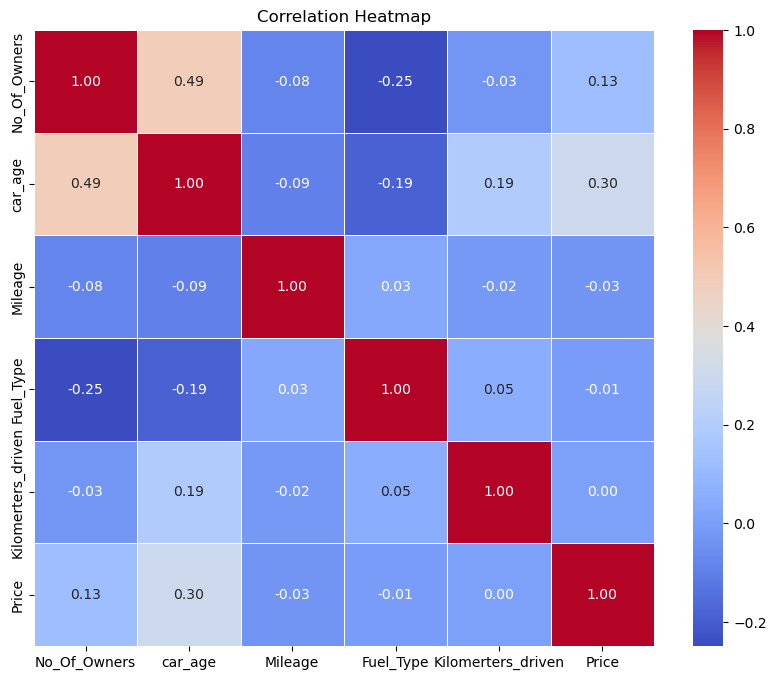

In [535]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df_corr = new_df[['No_Of_Owners', 'car_age', 'Mileage', 'Fuel_Type', 'Kilomerters_driven', 'Price']]

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Plot the heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

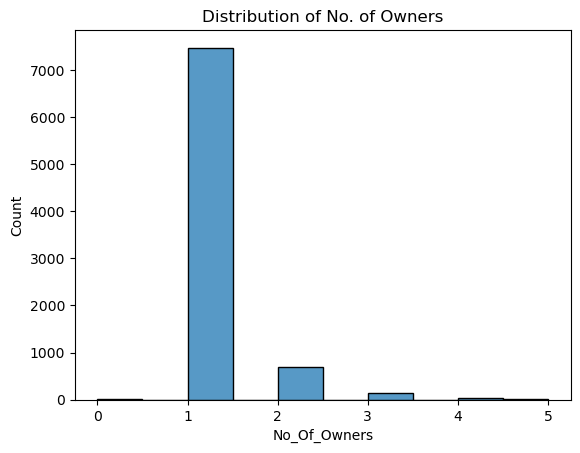

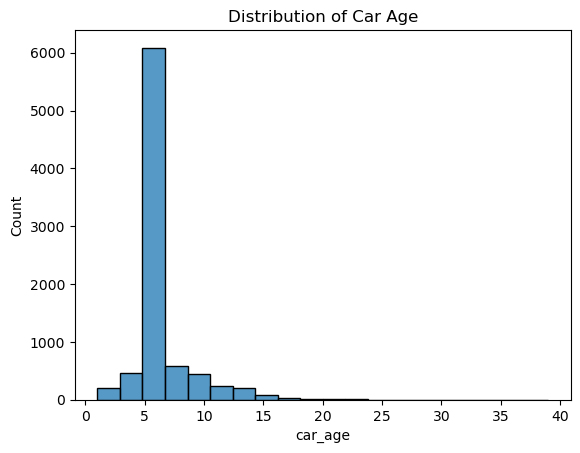

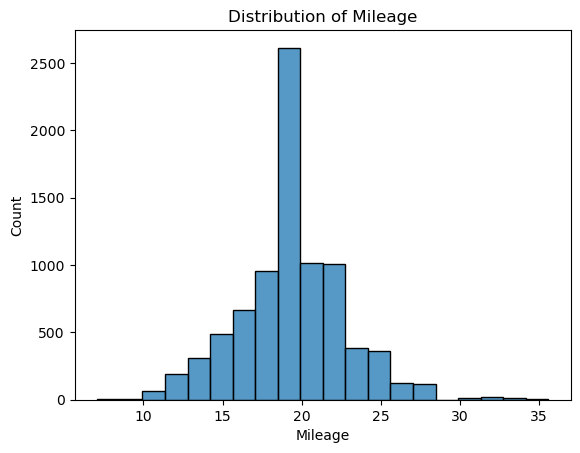

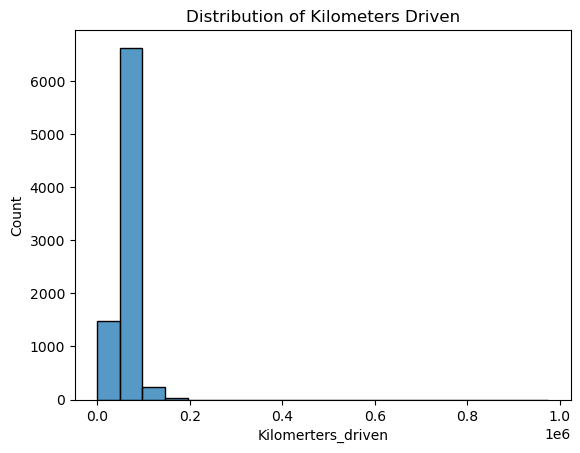

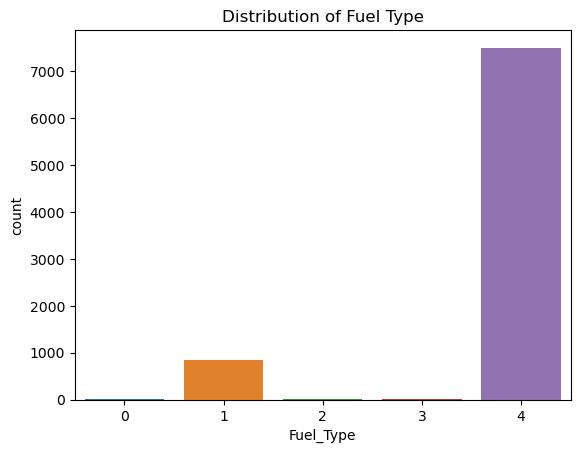

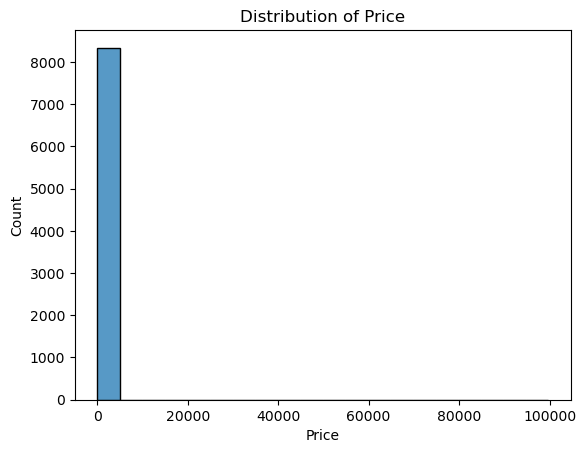

In [536]:
# Univariate Analysis
sns.histplot(data=new_df, x='No_Of_Owners', bins=10)
plt.title('Distribution of No. of Owners')
plt.show()

sns.histplot(data=new_df, x='car_age', bins=20)
plt.title('Distribution of Car Age')
plt.show()

sns.histplot(data=new_df, x='Mileage', bins=20)
plt.title('Distribution of Mileage')
plt.show()

sns.histplot(data=new_df, x='Kilomerters_driven', bins=20)
plt.title('Distribution of Kilometers Driven')
plt.show()

sns.countplot(data=new_df, x='Fuel_Type')
plt.title('Distribution of Fuel Type')
plt.show()

sns.histplot(data=new_df, x='Price', bins=20)
plt.title('Distribution of Price')
plt.show()


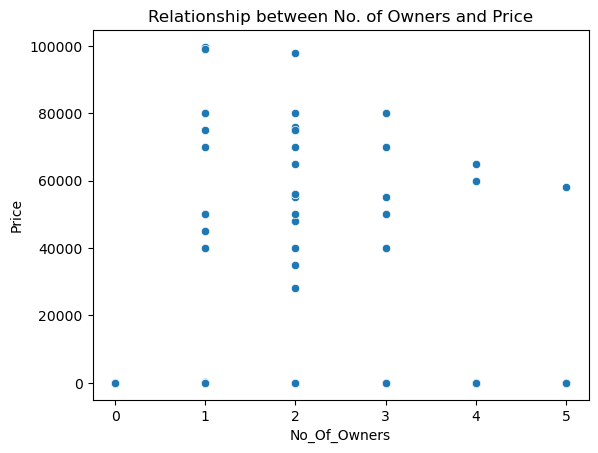

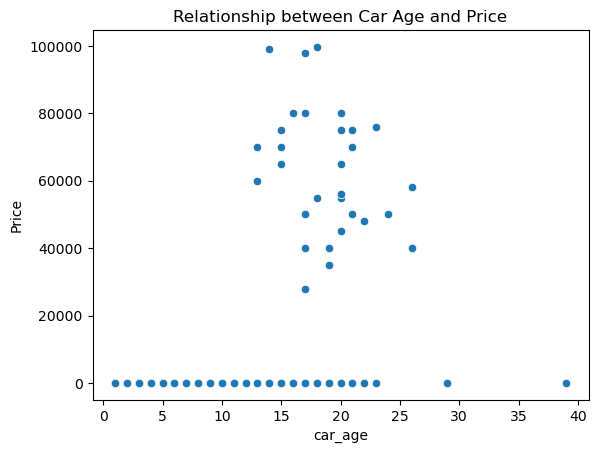

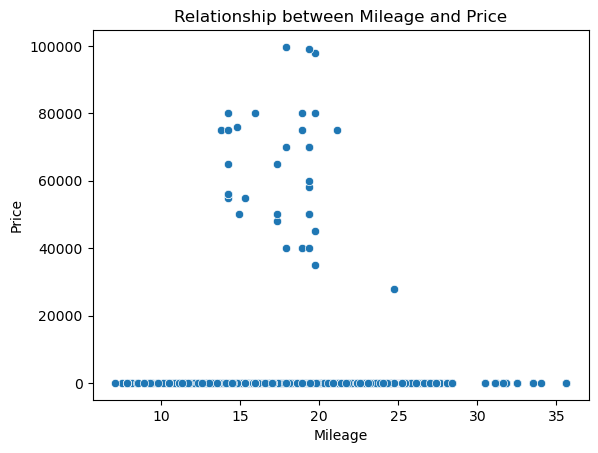

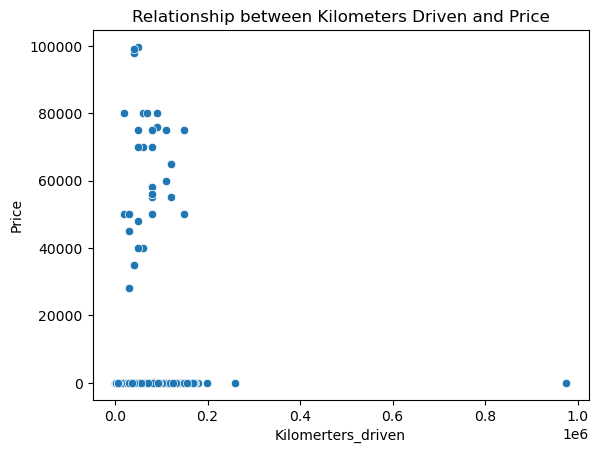

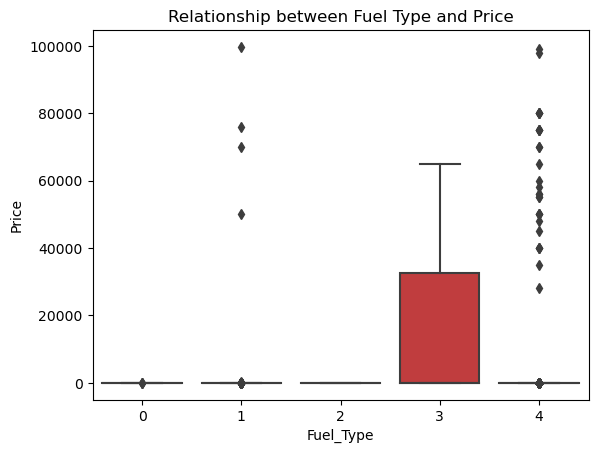

In [537]:

# Bivariate Analysis
sns.scatterplot(data=new_df, x='No_Of_Owners', y='Price')
plt.title('Relationship between No. of Owners and Price')
plt.show()

sns.scatterplot(data=new_df, x='car_age', y='Price')
plt.title('Relationship between Car Age and Price')
plt.show()

sns.scatterplot(data=new_df, x='Mileage', y='Price')
plt.title('Relationship between Mileage and Price')
plt.show()

sns.scatterplot(data=new_df, x='Kilomerters_driven', y='Price')
plt.title('Relationship between Kilometers Driven and Price')
plt.show()

sns.boxplot(data=new_df, x='Fuel_Type', y='Price')
plt.title('Relationship between Fuel Type and Price')
plt.show()



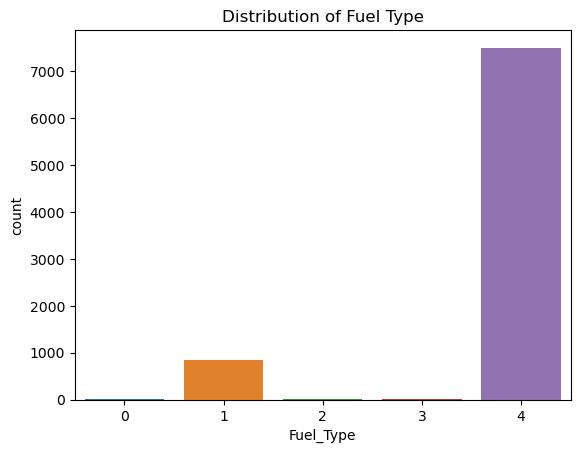

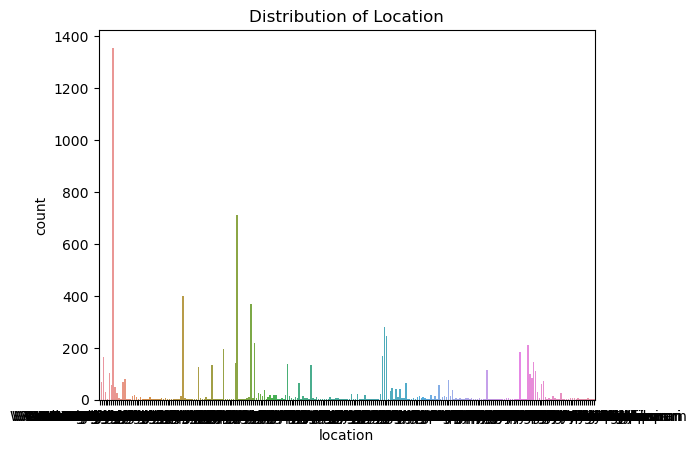

In [538]:
# Categorical Variables Analysis
sns.countplot(data=new_df, x='Fuel_Type')
plt.title('Distribution of Fuel Type')
plt.show()

sns.countplot(data=new_df, x='location')
plt.title('Distribution of Location')
plt.show()


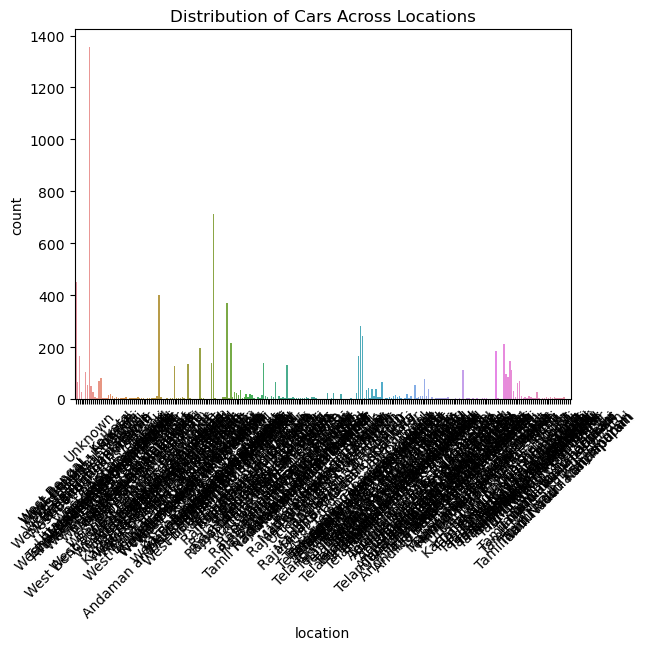

In [539]:
# Location Analysis
sns.countplot(data=new_df, x='location')
plt.title('Distribution of Cars Across Locations')
plt.xticks(rotation=45)
plt.show()


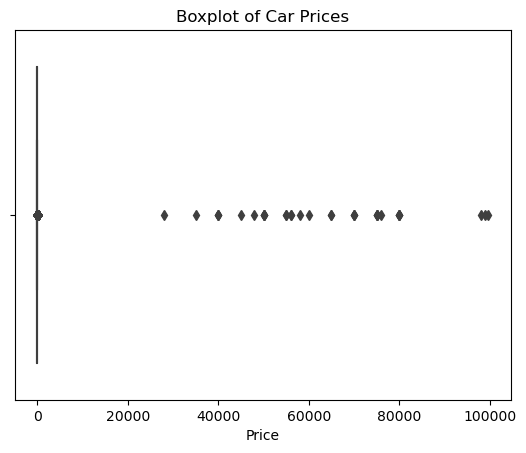

In [540]:
# Outlier Detection
sns.boxplot(data=new_df, x='Price')
plt.title('Boxplot of Car Prices')
plt.show()


In [541]:
# Feature Engineering (Example: Creating a new feature 'Mileage per Year')
new_df['Mileage_Per_Year'] = new_df['Mileage'] / new_df['car_age']


/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_1597/3494322422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Mileage_Per_Year'] = new_df['Mileage'] / new_df['car_age']


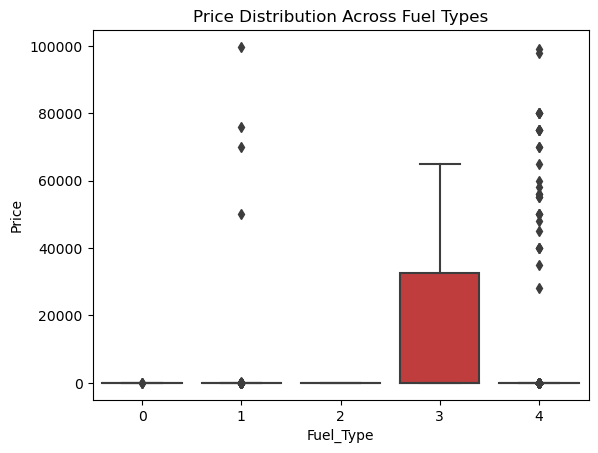

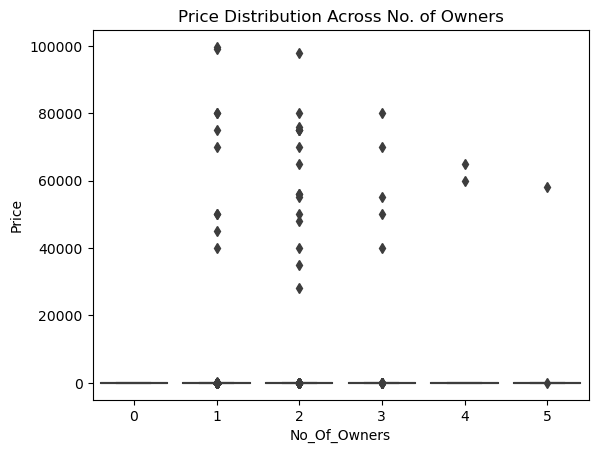

In [542]:
# Price Distribution Across Different Categories
sns.boxplot(data=new_df, x='Fuel_Type', y='Price')
plt.title('Price Distribution Across Fuel Types')
plt.show()

sns.boxplot(data=new_df, x='No_Of_Owners', y='Price')
plt.title('Price Distribution Across No. of Owners')
plt.show()


/Users/arul/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


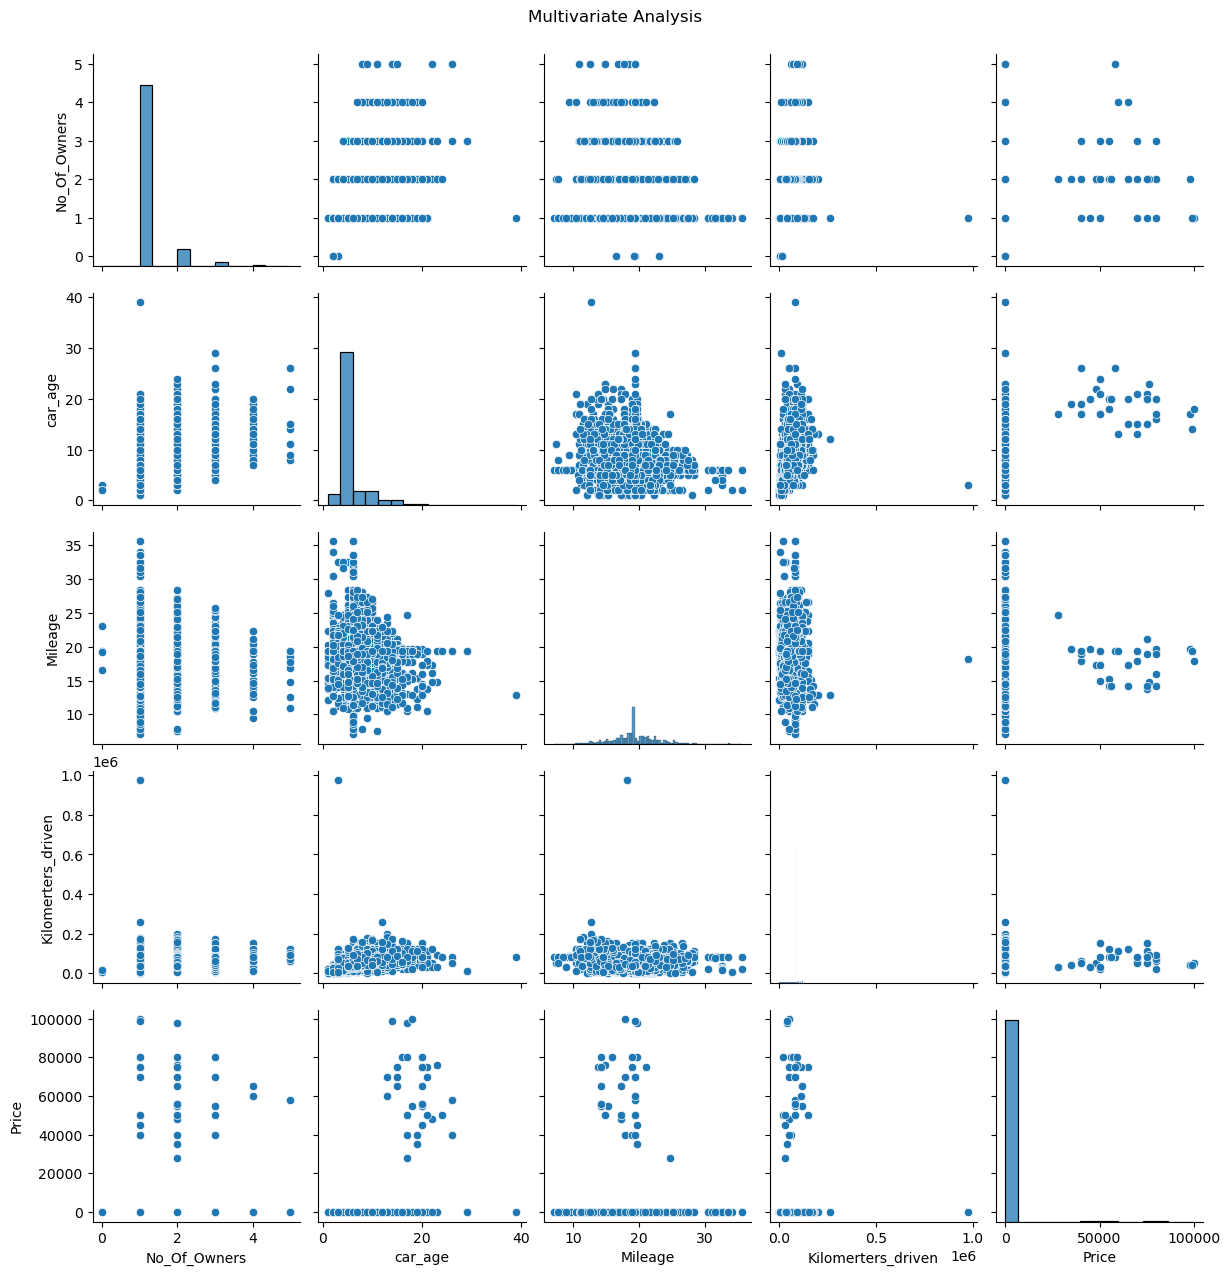

In [543]:
# Multivariate Analysis
sns.pairplot(new_df[['No_Of_Owners', 'car_age', 'Mileage', 'Kilomerters_driven', 'Price']])
plt.suptitle('Multivariate Analysis', y=1.02)
plt.show()

In [544]:
new_df

Model  No_Of_Owners  car_age    Mileage  Fuel_Type  \
0          Toyota Camry             3       10  19.160000          4   
1         Datsun RediGO             1        7  22.700000          4   
2         Renault Kiger             1        3  19.030000          4   
3           Hyundai i20             2       13  19.345797          4   
4               Audi Q3             2       10  15.730000          1   
...                 ...           ...      ...        ...        ...   
8364    Toyota Fortuner             2       12  12.550000          1   
8365         Maruti SX4             2       16  19.345797          4   
8366         Honda Brio             2       10  19.400000          4   
8367        Hyundai i20             1        6  22.540000          1   
8368  Hyundai Grand i10             2        7  18.900000          4   

      Kilomerters_driven                                           Features  \
0                70000.0  Power Steering, Power Windows Front, Air Condi...   
1                23981.0  Power Steering, Power Windows Front, Air Condi...   
2                 7100.0  Power Steering, Power Windows Front, Air Condi...   
3                71574.0  Power Steering, Power Windows Front, Air Condi...   
4                50000.0  Power Steering, Power Windows Front, Air Condi...   
...                  ...                                                ...   
8364            156039.0  Power Steering, Power Windows Front, Air Condi...   
8365             56000.0  Power Steering, Power Windows Front, Air Condi...   
8366             42000.0  Power Steering, Power Windows Front, Air Condi...   
8367             93003.0  Power Steering, Power Windows Front, Air Condi...   
8368             36000.0  Power Steering, Power Windows Front, Air Condi...   

                           location  Price  Mileage_Per_Year  
0             West Bengal - Kolkata   9.75          1.916000  
1             West Bengal - Asansol   2.66          3.242857  
2              West Bengal - Howrah   5.95          6.343333  
3              West Bengal - Howrah   2.23          1.488138  
4             West Bengal - Kolkata  12.00          1.573000  
...                             ...    ...               ...  
8364  Karnataka - Bangalore Central  16.49          1.045833  
8365                        Unknown   3.30          1.209112  
8366  Karnataka - Bangalore Central   4.25          1.940000  
8367  Karnataka - Bangalore Central   7.50          3.756667  
8368     Karnataka - Bangalore West   6.75          2.700000  

[8369 rows x 10 columns]

In [545]:
new_df = new_df.drop(columns=['Mileage_Per_Year'])

In [546]:
new_df

Model  No_Of_Owners  car_age    Mileage  Fuel_Type  \
0          Toyota Camry             3       10  19.160000          4   
1         Datsun RediGO             1        7  22.700000          4   
2         Renault Kiger             1        3  19.030000          4   
3           Hyundai i20             2       13  19.345797          4   
4               Audi Q3             2       10  15.730000          1   
...                 ...           ...      ...        ...        ...   
8364    Toyota Fortuner             2       12  12.550000          1   
8365         Maruti SX4             2       16  19.345797          4   
8366         Honda Brio             2       10  19.400000          4   
8367        Hyundai i20             1        6  22.540000          1   
8368  Hyundai Grand i10             2        7  18.900000          4   

      Kilomerters_driven                                           Features  \
0                70000.0  Power Steering, Power Windows Front, Air Condi...   
1                23981.0  Power Steering, Power Windows Front, Air Condi...   
2                 7100.0  Power Steering, Power Windows Front, Air Condi...   
3                71574.0  Power Steering, Power Windows Front, Air Condi...   
4                50000.0  Power Steering, Power Windows Front, Air Condi...   
...                  ...                                                ...   
8364            156039.0  Power Steering, Power Windows Front, Air Condi...   
8365             56000.0  Power Steering, Power Windows Front, Air Condi...   
8366             42000.0  Power Steering, Power Windows Front, Air Condi...   
8367             93003.0  Power Steering, Power Windows Front, Air Condi...   
8368             36000.0  Power Steering, Power Windows Front, Air Condi...   

                           location  Price  
0             West Bengal - Kolkata   9.75  
1             West Bengal - Asansol   2.66  
2              West Bengal - Howrah   5.95  
3              West Bengal - Howrah   2.23  
4             West Bengal - Kolkata  12.00  
...                             ...    ...  
8364  Karnataka - Bangalore Central  16.49  
8365                        Unknown   3.30  
8366  Karnataka - Bangalore Central   4.25  
8367  Karnataka - Bangalore Central   7.50  
8368     Karnataka - Bangalore West   6.75  

[8369 rows x 9 columns]

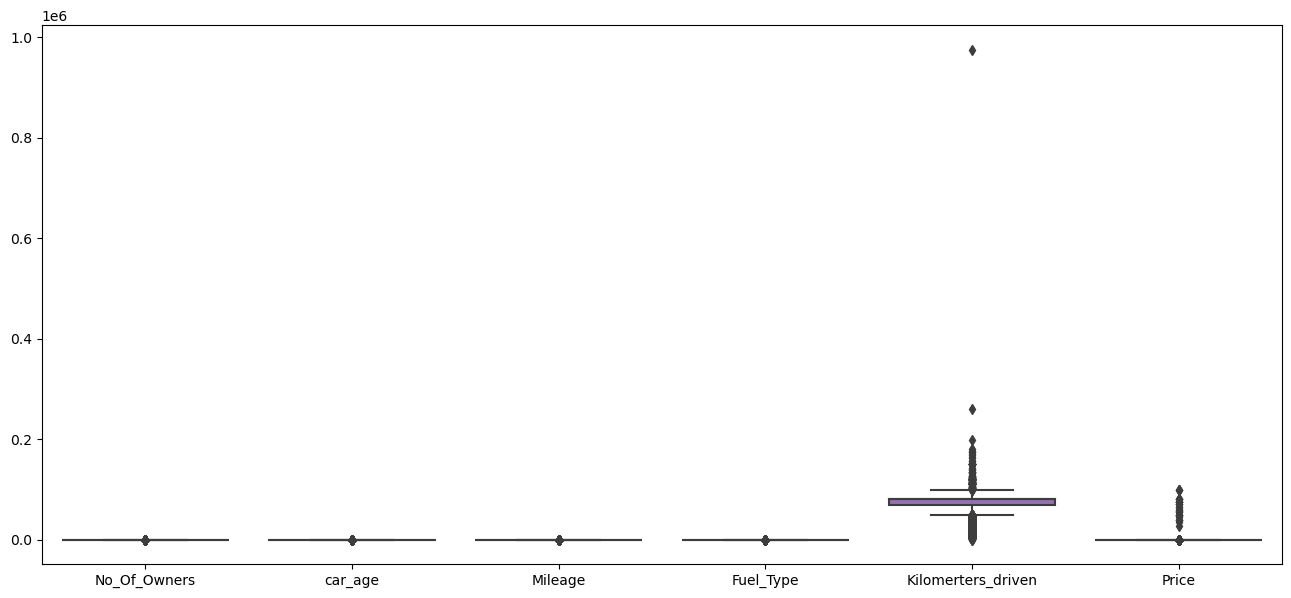

In [547]:
plt.figure(figsize=(16,7))
sns.boxplot(data=new_df)
plt.show()

In [548]:
new_df['Model'].unique()

array(['Toyota Camry', 'Datsun RediGO', 'Renault Kiger', 'Hyundai i20',
       'Audi Q3', 'Maruti Wagon R', 'Hyundai Santro', 'Renault KWID',
       'Maruti Swift Dzire', 'Maruti Swift', 'Hyundai i10',
       'Tata Harrier', 'Maruti Baleno', 'Toyota Fortuner', 'Jeep Compass',
       'Land Rover Range Rover Evoque', 'Maruti Alto K10', 'Tata Nexon',
       'Maruti Ciaz', 'Honda City', 'Hyundai Grand i10 Nios',
       'Hyundai Creta', 'Hyundai Verna', 'Maruti Celerio',
       'Hyundai Grand i10', 'Mercedes-Benz E-Class', 'Toyota Yaris',
       'Mahindra Marazzo', 'Honda Civic', 'Tata Tiago', 'Honda Amaze',
       'Skoda Rapid', 'Hyundai Santro Xing', 'BMW 3 Series', 'Fiat Linea',
       'BMW 5 Series', 'Jeep Wrangler', 'Honda BR-V', 'Ford Ecosport',
       'Honda Jazz', 'Honda WR-V', 'Honda Brio', 'Audi A6', 'Ambassador',
       'Hyundai Elantra', 'Mercedes-Benz C-Class', 'Maruti Ertiga',
       'Maruti Alto', 'Mahindra KUV 100 NXT', 'Tata Altroz',
       'Skoda Laura', 'Maruti Zen Estilo

In [549]:
new_df['location'].unique()

array(['West Bengal - Kolkata', 'West Bengal - Asansol',
       'West Bengal - Howrah', 'West Bengal - Baharampur',
       'West Bengal - Jalpaiguri', 'West Bengal - Siliguri',
       'West Bengal - Malda', 'Unknown', 'West Bengal - Kharagpur',
       'West Bengal - Burdwan', 'West Bengal - RTO Barrackpore',
       'West Bengal - Alipore', 'West Bengal - Haldia',
       'Tamil Nadu - Chennai Central', 'Uttar Pradesh - Ghaziabad',
       'Arunachal Pradesh - Itanagar', 'West Bengal - Krishnanagar',
       'West Bengal - Arambagh', 'West Bengal - Raiganj',
       'West Bengal - Balurghat', 'West Bengal - Cooch Behar',
       'West Bengal - Serampore', 'West Bengal - RTO Diamond Harbour',
       'Uttar Pradesh - Noida', 'Odisha - Cuttack',
       'West Bengal - Contai', 'West Bengal - Rampurhat',
       'Assam - Tezpur', 'West Bengal - Raipur (Bankura)',
       'Madhya Pradesh - Rewa', 'West Bengal - Medinipur',
       'West Bengal - Berhampore', 'West Bengal - Bankura',
       'West Beng

In [550]:
new_df['Features'].unique()

array(['Power Steering, Power Windows Front, Air Conditioner, Heater, Adjustable Head Lights, Fog Lights Front, Anti Lock Braking System, Brake Assist, Cd Player',
       'Power Steering, Power Windows Front, Air Conditioner, Heater, Adjustable Head Lights, Manually Adjustable Exterior Rear View Mirror, Anti Lock Braking System, Centeral Locking, Radio',
       'Power Steering, Power Windows Front, Air Conditioner, Heater, Adjustable Head Lights, Power Adjustable Exterior Rear View Mirror, Anti Lock Braking System, Centeral Locking, Radio',
       'Power Steering, Power Windows Front, Air Conditioner, Heater, Fog Lights Rear, Power Adjustable Exterior Rear View Mirror, Centeral Locking, Power Door Locks, Cd Player',
       'Power Steering, Power Windows Front, Air Conditioner, Heater, Adjustable Head Lights, Fog Lights Front, Anti Lock Braking System, Centeral Locking, Radio',
       'Power Steering, Power Windows Front, Air Conditioner, Heater, Fog Lights Front, Fog Lights Rear, Cente

In [552]:
 #Assuming 'Features', 'Model', and 'location' are the categorical columns
categorical_columns = ['Features', 'Model', 'location']

# Label Encoding
label_encoder_mapping = {}
for column in categorical_columns:
    label_encoder = LabelEncoder()
    new_df[column + '_encoded'] = label_encoder.fit_transform(new_df[column])
    label_encoder_mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# One-Hot Encoding
# If you want to keep the original columns, use the prefix parameter
new_df_encoded = pd.get_dummies(new_df, columns=categorical_columns, prefix=categorical_columns)

In [556]:
for column, mapping in label_encoder_mapping.items():
    pprint(f"{column} Mapping:")
    pprint(mapping)
    pprint()

'Features Mapping:'
{'': 0,
 'Accessory Power Outlet, Heater, Digital Odometer, Adjustable Head Lights, Manually Adjustable Exterior Rear View Mirror, Anti Lock Braking System, Child Safety Locks': 1,
 'Accessory Power Outlet, Rear Seat Headrest, Air Conditioner, Heater, Adjustable Head Lights, Manually Adjustable Exterior Rear View Mirror, Anti Lock Braking System, Child Safety Locks': 2,
 'Accessory Power Outlet, Rear Seat Headrest, Heater, Digital Odometer, Adjustable Head Lights, Manually Adjustable Exterior Rear View Mirror, Anti Lock Braking System, Child Safety Locks': 3,
 'Adjustable Head Lights, Fog Lights Front': 4,
 'Cruise Control, Drive Modes, Fog Lights Front, Fog Lights Rear, Anti Lock Braking System, Brake Assist': 5,
 'Cup Holders Front, Navigation System, Tachometer, Glove Compartment, Power Adjustable Exterior Rear View Mirror, Tinted Glass, Brake Assist, Child Safety Locks, Integrated2Din Audio': 6,
 'Cup Holders Front, Tachometer, Glove Compartment, Power Adjustabl

TypeError: pprint() missing 1 required positional argument: 'object'

In [557]:
new_df

Model  No_Of_Owners  car_age    Mileage  Fuel_Type  \
0          Toyota Camry             3       10  19.160000          4   
1         Datsun RediGO             1        7  22.700000          4   
2         Renault Kiger             1        3  19.030000          4   
3           Hyundai i20             2       13  19.345797          4   
4               Audi Q3             2       10  15.730000          1   
...                 ...           ...      ...        ...        ...   
8364    Toyota Fortuner             2       12  12.550000          1   
8365         Maruti SX4             2       16  19.345797          4   
8366         Honda Brio             2       10  19.400000          4   
8367        Hyundai i20             1        6  22.540000          1   
8368  Hyundai Grand i10             2        7  18.900000          4   

      Kilomerters_driven                                           Features  \
0                70000.0  Power Steering, Power Windows Front, Air Condi...   
1                23981.0  Power Steering, Power Windows Front, Air Condi...   
2                 7100.0  Power Steering, Power Windows Front, Air Condi...   
3                71574.0  Power Steering, Power Windows Front, Air Condi...   
4                50000.0  Power Steering, Power Windows Front, Air Condi...   
...                  ...                                                ...   
8364            156039.0  Power Steering, Power Windows Front, Air Condi...   
8365             56000.0  Power Steering, Power Windows Front, Air Condi...   
8366             42000.0  Power Steering, Power Windows Front, Air Condi...   
8367             93003.0  Power Steering, Power Windows Front, Air Condi...   
8368             36000.0  Power Steering, Power Windows Front, Air Condi...   

                           location  Price  Features_encoded  Model_encoded  \
0             West Bengal - Kolkata   9.75                72            222   
1             West Bengal - Asansol   2.66               125             32   
2              West Bengal - Howrah   5.95               155            187   
3              West Bengal - Howrah   2.23               191             77   
4             West Bengal - Kolkata  12.00                72              6   
...                             ...    ...               ...            ...   
8364  Karnataka - Bangalore Central  16.49                72            227   
8365                        Unknown   3.30               168            146   
8366  Karnataka - Bangalore Central   4.25               163             50   
8367  Karnataka - Bangalore Central   7.50                79             77   
8368     Karnataka - Bangalore West   6.75                79             65   

      location_encoded  
0                  224  
1                  210  
2                  220  
3                  220  
4                  224  
...                ...  
8364                48  
8365               192  
8366                48  
8367                48  
8368                51  

[8369 rows x 12 columns]

In [558]:
new_df.dtypes

Model                  object
No_Of_Owners            int64
car_age                 int64
Mileage               float64
Fuel_Type               int64
Kilomerters_driven    float64
Features               object
location               object
Price                 float64
Features_encoded        int64
Model_encoded           int64
location_encoded        int64
dtype: object

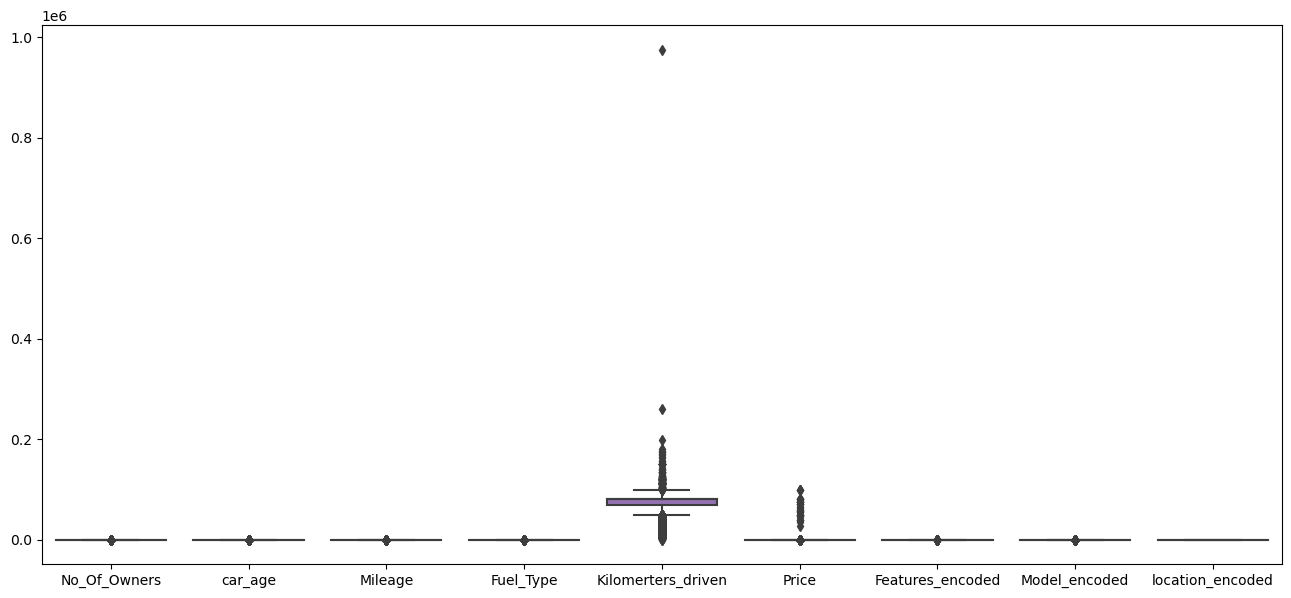

In [559]:
plt.figure(figsize=(16,7))
sns.boxplot(data=new_df)
plt.show()

In [560]:
new_df['Kilomerters_driven'] = np.log1p(new_df['Kilomerters_driven'])

# Display the DataFrame
new_df

Model  No_Of_Owners  car_age    Mileage  Fuel_Type  \
0          Toyota Camry             3       10  19.160000          4   
1         Datsun RediGO             1        7  22.700000          4   
2         Renault Kiger             1        3  19.030000          4   
3           Hyundai i20             2       13  19.345797          4   
4               Audi Q3             2       10  15.730000          1   
...                 ...           ...      ...        ...        ...   
8364    Toyota Fortuner             2       12  12.550000          1   
8365         Maruti SX4             2       16  19.345797          4   
8366         Honda Brio             2       10  19.400000          4   
8367        Hyundai i20             1        6  22.540000          1   
8368  Hyundai Grand i10             2        7  18.900000          4   

      Kilomerters_driven                                           Features  \
0              11.156265  Power Steering, Power Windows Front, Air Condi...   
1              10.085059  Power Steering, Power Windows Front, Air Condi...   
2               8.867991  Power Steering, Power Windows Front, Air Condi...   
3              11.178501  Power Steering, Power Windows Front, Air Condi...   
4              10.819798  Power Steering, Power Windows Front, Air Condi...   
...                  ...                                                ...   
8364           11.957868  Power Steering, Power Windows Front, Air Condi...   
8365           10.933125  Power Steering, Power Windows Front, Air Condi...   
8366           10.645449  Power Steering, Power Windows Front, Air Condi...   
8367           11.440398  Power Steering, Power Windows Front, Air Condi...   
8368           10.491302  Power Steering, Power Windows Front, Air Condi...   

                           location  Price  Features_encoded  Model_encoded  \
0             West Bengal - Kolkata   9.75                72            222   
1             West Bengal - Asansol   2.66               125             32   
2              West Bengal - Howrah   5.95               155            187   
3              West Bengal - Howrah   2.23               191             77   
4             West Bengal - Kolkata  12.00                72              6   
...                             ...    ...               ...            ...   
8364  Karnataka - Bangalore Central  16.49                72            227   
8365                        Unknown   3.30               168            146   
8366  Karnataka - Bangalore Central   4.25               163             50   
8367  Karnataka - Bangalore Central   7.50                79             77   
8368     Karnataka - Bangalore West   6.75                79             65   

      location_encoded  
0                  224  
1                  210  
2                  220  
3                  220  
4                  224  
...                ...  
8364                48  
8365               192  
8366                48  
8367                48  
8368                51  

[8369 rows x 12 columns]

# Feature Selection

In [561]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc , accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pickle

In [562]:
new_df = new_df.drop(columns=['Model', 'location', 'Features'])

In [563]:
x = new_df.drop('Price',axis=1)
y = new_df['Price']

In [564]:
x

No_Of_Owners  car_age    Mileage  Fuel_Type  Kilomerters_driven  \
0                3       10  19.160000          4           11.156265   
1                1        7  22.700000          4           10.085059   
2                1        3  19.030000          4            8.867991   
3                2       13  19.345797          4           11.178501   
4                2       10  15.730000          1           10.819798   
...            ...      ...        ...        ...                 ...   
8364             2       12  12.550000          1           11.957868   
8365             2       16  19.345797          4           10.933125   
8366             2       10  19.400000          4           10.645449   
8367             1        6  22.540000          1           11.440398   
8368             2        7  18.900000          4           10.491302   

      Features_encoded  Model_encoded  location_encoded  
0                   72            222               224  
1                  125             32               210  
2                  155            187               220  
3                  191             77               220  
4                   72              6               224  
...                ...            ...               ...  
8364                72            227                48  
8365               168            146               192  
8366               163             50                48  
8367                79             77                48  
8368                79             65                51  

[8369 rows x 8 columns]

In [565]:
y

0        9.75
1        2.66
2        5.95
3        2.23
4       12.00
        ...  
8364    16.49
8365     3.30
8366     4.25
8367     7.50
8368     6.75
Name: Price, Length: 8369, dtype: float64

In [489]:
def model_regression(x,y,algorithm):
    for i in algorithm:
        xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)
        model = i().fit(xtrain,ytrain)
        # predict for train and test accuracy # Predicts the target variable for both the training and testing sets using the trained model
        y_train_pred = model.predict(xtrain)
        y_test_pred  = model.predict(xtest)

       # Accuracy score
        training = r2_score(ytrain,y_train_pred)
        testing = r2_score(ytest,y_test_pred)
        data = {'Algorithm':i.__name__, 'Training R2 Score':training,'Testing R2 Score':testing}
        print(data)

In [490]:
model_regression(x,y,[DecisionTreeRegressor,ExtraTreesRegressor,RandomForestRegressor,XGBRegressor,KNeighborsRegressor,GradientBoostingRegressor,SVR,GaussianProcessRegressor])

{'Algorithm': 'DecisionTreeRegressor', 'Training R2 Score': 0.9999937689906662, 'Testing R2 Score': -0.43505707326529386}
{'Algorithm': 'ExtraTreesRegressor', 'Training R2 Score': 0.9999937689906662, 'Testing R2 Score': 0.23260364740441308}
{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 0.898949709728722, 'Testing R2 Score': 0.1263428898001253}
{'Algorithm': 'XGBRegressor', 'Training R2 Score': 0.9999936561825878, 'Testing R2 Score': -0.04705056114548389}
{'Algorithm': 'KNeighborsRegressor', 'Training R2 Score': 0.4232358133100662, 'Testing R2 Score': -0.02360992428101616}
{'Algorithm': 'GradientBoostingRegressor', 'Training R2 Score': 0.9328277042750583, 'Testing R2 Score': -0.058092043985825015}
{'Algorithm': 'SVR', 'Training R2 Score': -0.003628492444455844, 'Testing R2 Score': -0.0046237609296557736}
{'Algorithm': 'GaussianProcessRegressor', 'Training R2 Score': 0.9999937689906662, 'Testing R2 Score': -0.0052051507746098125}


In [491]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [492]:

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [453]:
# Create RandomForestRegressor
rf_model = RandomForestRegressor()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [493]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to train the model
best_model = grid_search.best_estimator_

# Evaluate on the test set
test_r2_score = best_model.score(x_test, y_test)

print("Best Hyperparameters:", best_params)
print("Test R2 Score:", test_r2_score)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Test R2 Score: 0.17088852878968508


# ExtraTreeRegressor

In [497]:
# Set a random seed for reproducibility
random_seed = 42

xtrain, xtest, ytrain, ytest = train_test_split(x.values,y,test_size=0.2, random_state=random_seed)

model = ExtraTreesRegressor(random_state=random_seed).fit(xtrain, ytrain)

y_pred_train = model.predict(xtrain) #  to predict the target variable (y) for the training set (xtrain)

y_pred_test = model.predict(xtest) # to predict the target variable for the test set (xtest)

# The r2_score function is used to calculate the R-squared (coefficient of determination) score for the training and test sets
# R-squared is a measure of how well the predicted values match the actual values

r2_train = r2_score(ytrain, y_pred_train)

r2_test = r2_score(ytest, y_pred_test)

r2_train, r2_test

# with normal df

(0.9999937689906662, 0.23307902437357952)

In [498]:
x.values

array([[  3.  ,  10.  ,  19.16, ...,  72.  , 222.  , 224.  ],
       [  1.  ,   7.  ,  22.7 , ..., 125.  ,  32.  , 210.  ],
       [  1.  ,   3.  ,  19.03, ..., 155.  , 187.  , 220.  ],
       ...,
       [  2.  ,  10.  ,  19.4 , ..., 163.  ,  50.  ,  48.  ],
       [  1.  ,   6.  ,  22.54, ...,  79.  ,  77.  ,  48.  ],
       [  2.  ,   7.  ,  18.9 , ...,  79.  ,  65.  ,  51.  ]])

In [499]:
model

ExtraTreesRegressor(random_state=42)

In [500]:
new_df.loc[1000]

No_Of_Owners            1.000000
car_age                 7.000000
Mileage                23.100000
Fuel_Type               4.000000
Kilomerters_driven     10.239996
Price                   3.250000
Features_encoded      129.000000
Model_encoded         133.000000
location_encoded      224.000000
Name: 1000, dtype: float64

In [507]:
x = new_df.loc[1000]
x.values.tolist()

[1.0, 7.0, 23.1, 4.0, 10.239995502805316, 3.25, 129.0, 133.0, 224.0]

# Save Model

In [501]:
with open('car_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [502]:
with open('car_regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [503]:
model

ExtraTreesRegressor(random_state=42)

In [510]:
sp = [1.0, 7.0, 23.1, 4.0, np.log(10.239995502805316), 129.0, 133.0, 224.0]

In [511]:
sell = model.predict([sp])

In [512]:
np.exp(sell)

array([94494.79191949])